# Capstone Project - Customer Churn - PROJECT NOTES 1 & 2 CODES

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# loding data
churn  = pd.read_excel('Customer Churn Data.xlsx', sheet_name='Data for DSBA')

In [3]:
# checking of the data if loaded correctly
print("top 5 observations in data")
churn.head()

top 5 observations in data


AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [4]:
# checking info of data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
# checking shape of dataset
print("The shape of dataset is :{}".format(churn.shape))

The shape of dataset is :(11260, 19)


In [6]:
# describing data
churn.describe().T

count          mean          std      min       25%  \
AccountID        11260.0  25629.500000  3250.626350  20000.0  22814.75   
Churn            11260.0      0.168384     0.374223      0.0      0.00   
City_Tier        11148.0      1.653929     0.915015      1.0      1.00   
CC_Contacted_LY  11158.0     17.867091     8.853269      4.0     11.00   
Service_Score    11162.0      2.902526     0.725584      0.0      2.00   
CC_Agent_Score   11144.0      3.066493     1.379772      1.0      2.00   
Complain_ly      10903.0      0.285334     0.451594      0.0      0.00   

                     50%       75%      max  
AccountID        25629.5  28444.25  31259.0  
Churn                0.0      0.00      1.0  
City_Tier            1.0      3.00      3.0  
CC_Contacted_LY     16.0     23.00    132.0  
Service_Score        3.0      3.00      5.0  
CC_Agent_Score       3.0      4.00      5.0  
Complain_ly          0.0      1.00      1.0

In [7]:
# describing data including object variable as well
churn.describe(include='all').T

count  unique         top    freq       mean  \
AccountID                11260.0     NaN         NaN     NaN    25629.5   
Churn                    11260.0     NaN         NaN     NaN   0.168384   
Tenure                   11158.0    38.0         1.0  1351.0        NaN   
City_Tier                11148.0     NaN         NaN     NaN   1.653929   
CC_Contacted_LY          11158.0     NaN         NaN     NaN  17.867091   
Payment                    11151       5  Debit Card    4587        NaN   
Gender                     11152       4        Male    6328        NaN   
Service_Score            11162.0     NaN         NaN     NaN   2.902526   
Account_user_count       11148.0     7.0         4.0  4569.0        NaN   
account_segment            11163       7       Super    4062        NaN   
CC_Agent_Score           11144.0     NaN         NaN     NaN   3.066493   
Marital_Status             11048       3     Married    5860        NaN   
rev_per_month            11158.0    59.0         3.0  1746.0        NaN   
Complain_ly              10903.0     NaN         NaN     NaN   0.285334   
rev_growth_yoy           11260.0    20.0        14.0  1524.0        NaN   
coupon_used_for_payment  11260.0    20.0         1.0  4373.0        NaN   
Day_Since_CC_connect     10903.0    24.0         3.0  1816.0        NaN   
cashback                 10789.0  5693.0      155.62    10.0        NaN   
Login_device               11039       3      Mobile    7482        NaN   

                                std      min       25%      50%       75%  \
AccountID                3250.62635  20000.0  22814.75  25629.5  28444.25   
Churn                      0.374223      0.0       0.0      0.0       0.0   
Tenure                          NaN      NaN       NaN      NaN       NaN   
City_Tier                  0.915015      1.0       1.0      1.0       3.0   
CC_Contacted_LY            8.853269      4.0      11.0     16.0      23.0   
Payment                         NaN      NaN       NaN      NaN       NaN   
Gender                          NaN      NaN       NaN      NaN       NaN   
Service_Score              0.725584      0.0       2.0      3.0       3.0   
Account_user_count              NaN      NaN       NaN      NaN       NaN   
account_segment                 NaN      NaN       NaN      NaN       NaN   
CC_Agent_Score             1.379772      1.0       2.0      3.0       4.0   
Marital_Status                  NaN      NaN       NaN      NaN       NaN   
rev_per_month                   NaN      NaN       NaN      NaN       NaN   
Complain_ly                0.451594      0.0       0.0      0.0       1.0   
rev_growth_yoy                  NaN      NaN       NaN      NaN       NaN   
coupon_used_for_payment         NaN      NaN       NaN      NaN       NaN   
Day_Since_CC_connect            NaN      NaN       NaN      NaN       NaN   
cashback                        NaN      NaN       NaN      NaN       NaN   
Login_device                    NaN      NaN       NaN      NaN       NaN   

                             max  
AccountID                31259.0  
Churn                        1.0  
Tenure                       NaN  
City_Tier                    3.0  
CC_Contacted_LY            132.0  
Payment                      NaN  
Gender                       NaN  
Service_Score                5.0  
Account_user_count           NaN  
account_segment              NaN  
CC_Agent_Score               5.0  
Marital_Status               NaN  
rev_per_month                NaN  
Complain_ly                  1.0  
rev_growth_yoy               NaN  
coupon_used_for_payment      NaN  
Day_Since_CC_connect         NaN  
cashback                     NaN  
Login_device                 NaN

In [8]:
# checking for null values
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [9]:
# checking for duplicate values
print("Number of duplicate rows:",churn.duplicated().sum())

Number of duplicate rows: 0


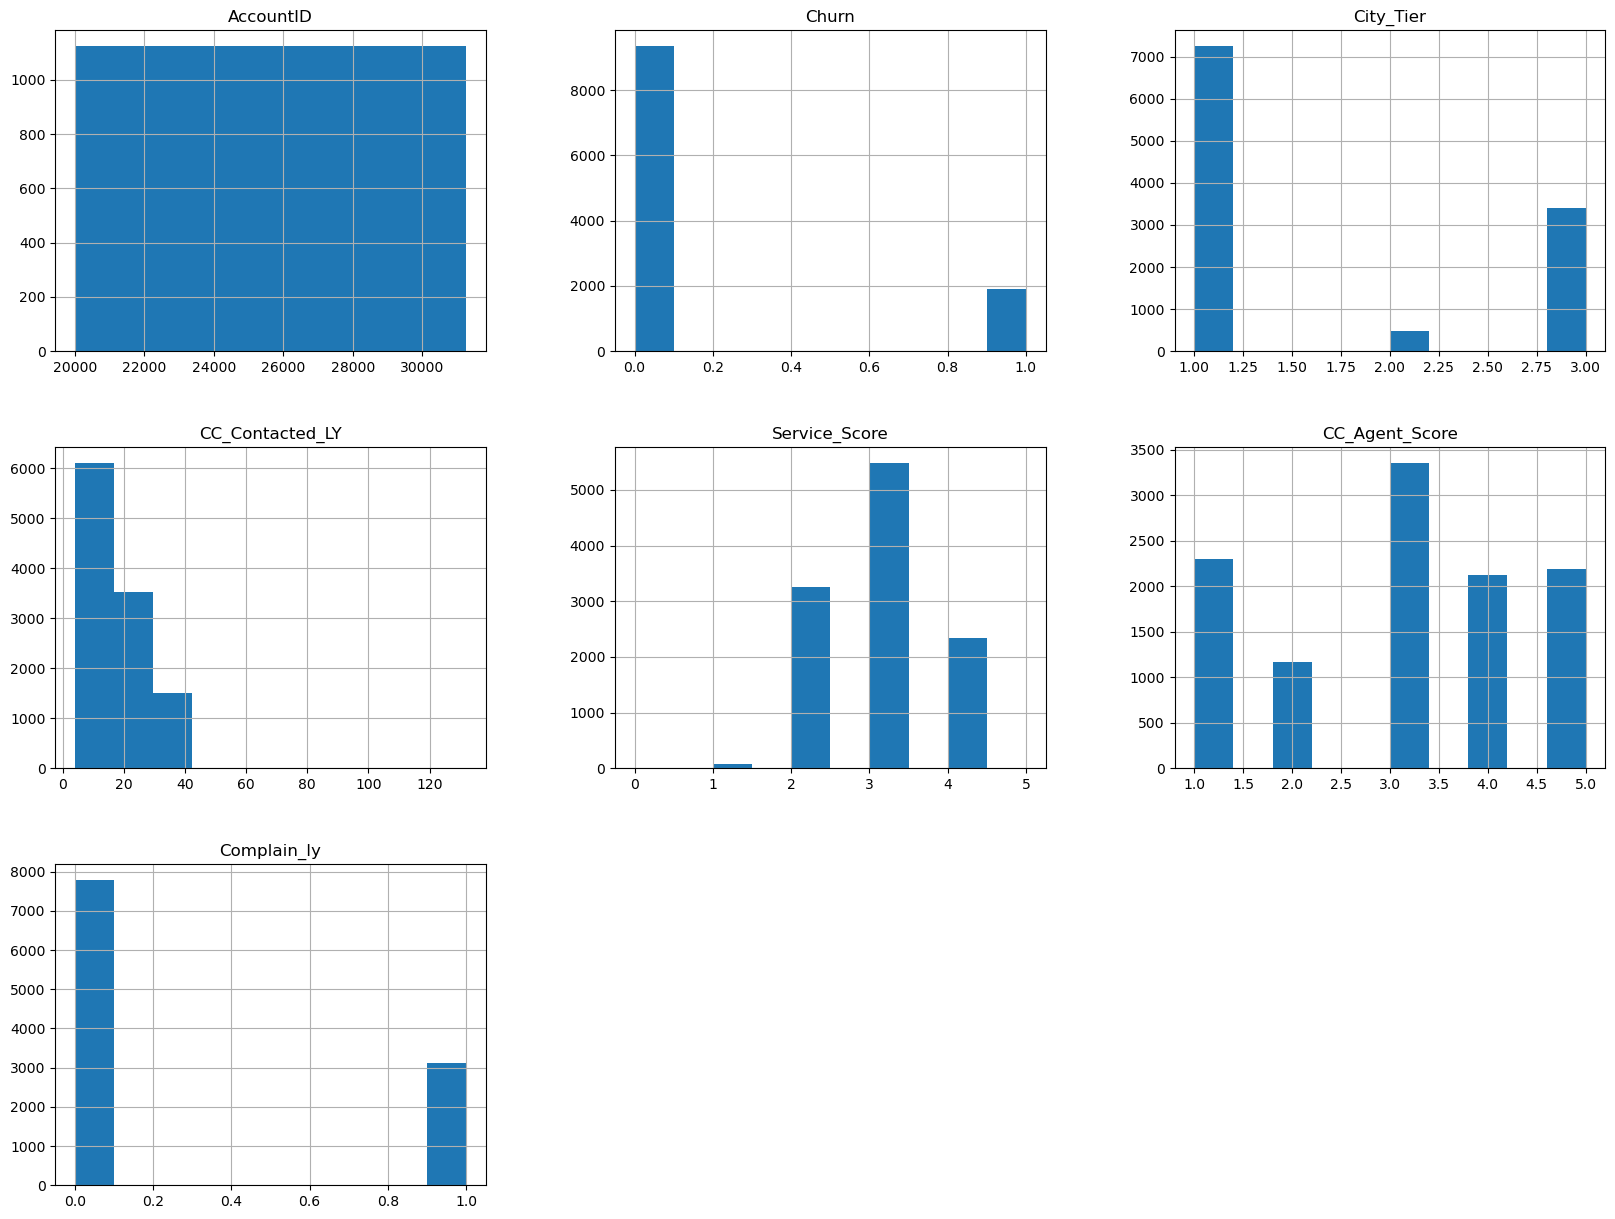

In [10]:
#checking for skewness
churn.hist(figsize=(20,15));

In [11]:
# kest check kurtosis and skewness of data
print("kurtosis and skewness of dataste is as below")
pd.DataFrame(data = [churn.kurtosis(), churn.skew()], index=['Kurtosis','Skewness']).T.round(2)

kurtosis and skewness of dataste is as below


C:\Users\Deepak\AppData\Local\Temp\ipykernel_11924\287289040.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(data = [churn.kurtosis(), churn.skew()], index=['Kurtosis','Skewness']).T.round(2)


Kurtosis  Skewness
AccountID           -1.20      0.00
Churn                1.14      1.77
City_Tier           -1.40      0.74
CC_Contacted_LY      8.23      1.42
Service_Score       -0.67      0.00
CC_Agent_Score      -1.12     -0.14
Complain_ly         -1.10      0.95

In [12]:
#checking standard deviations of each variable
print("standard deviation of variables")
print(churn.std())

standard deviation of variables
AccountID          3250.626350
Churn                 0.374223
City_Tier             0.915015
CC_Contacted_LY       8.853269
Service_Score         0.725584
CC_Agent_Score        1.379772
Complain_ly           0.451594
dtype: float64


C:\Users\Deepak\AppData\Local\Temp\ipykernel_11924\3208885302.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(churn.std())


<AxesSubplot:>

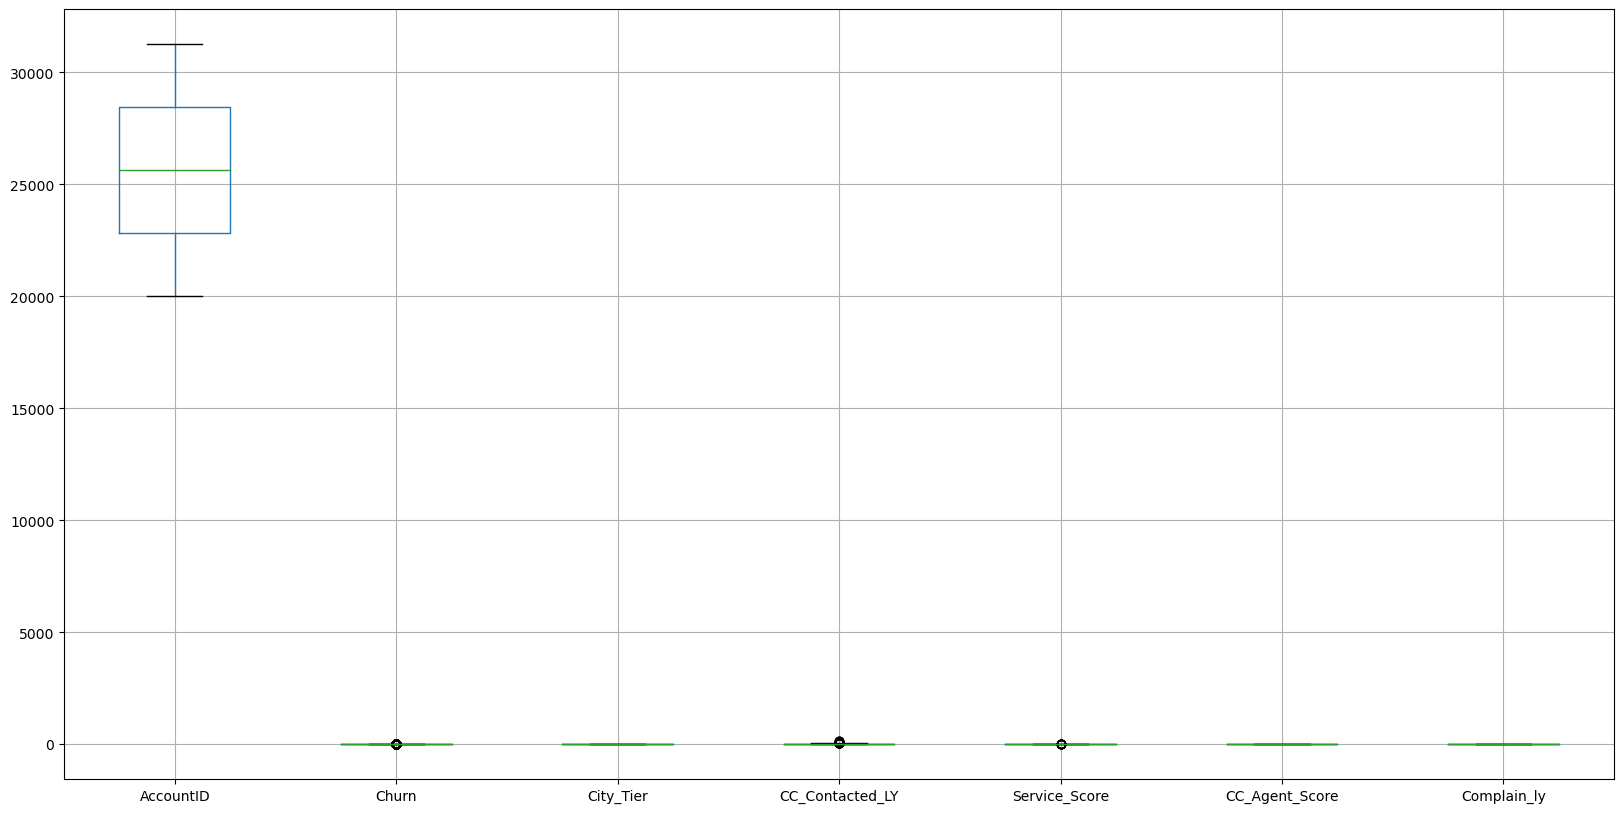

In [13]:
# to perform uni-variate analysis on continous variable, lets plot the box plots and distribution plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#checking for outliers using box plot
churn.boxplot(figsize=(20,10))

In [14]:
# lets check the percentage of outlier in each column
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).sum()/churn.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

C:\Users\Deepak\AppData\Local\Temp\ipykernel_11924\310507209.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  pd.DataFrame((((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).sum()/churn.shape[0]*100),


outlier %
AccountID                     0.00
Account_user_count            0.00
CC_Agent_Score                0.00
CC_Contacted_LY               0.37
Churn                        16.84
City_Tier                     0.00
Complain_ly                   0.00
Day_Since_CC_connect          0.00
Gender                        0.00
Login_device                  0.00
Marital_Status                0.00
Payment                       0.00
Service_Score                 0.12
Tenure                        0.00
account_segment               0.00
cashback                      0.00
coupon_used_for_payment       0.00
rev_growth_yoy                0.00
rev_per_month                 0.00

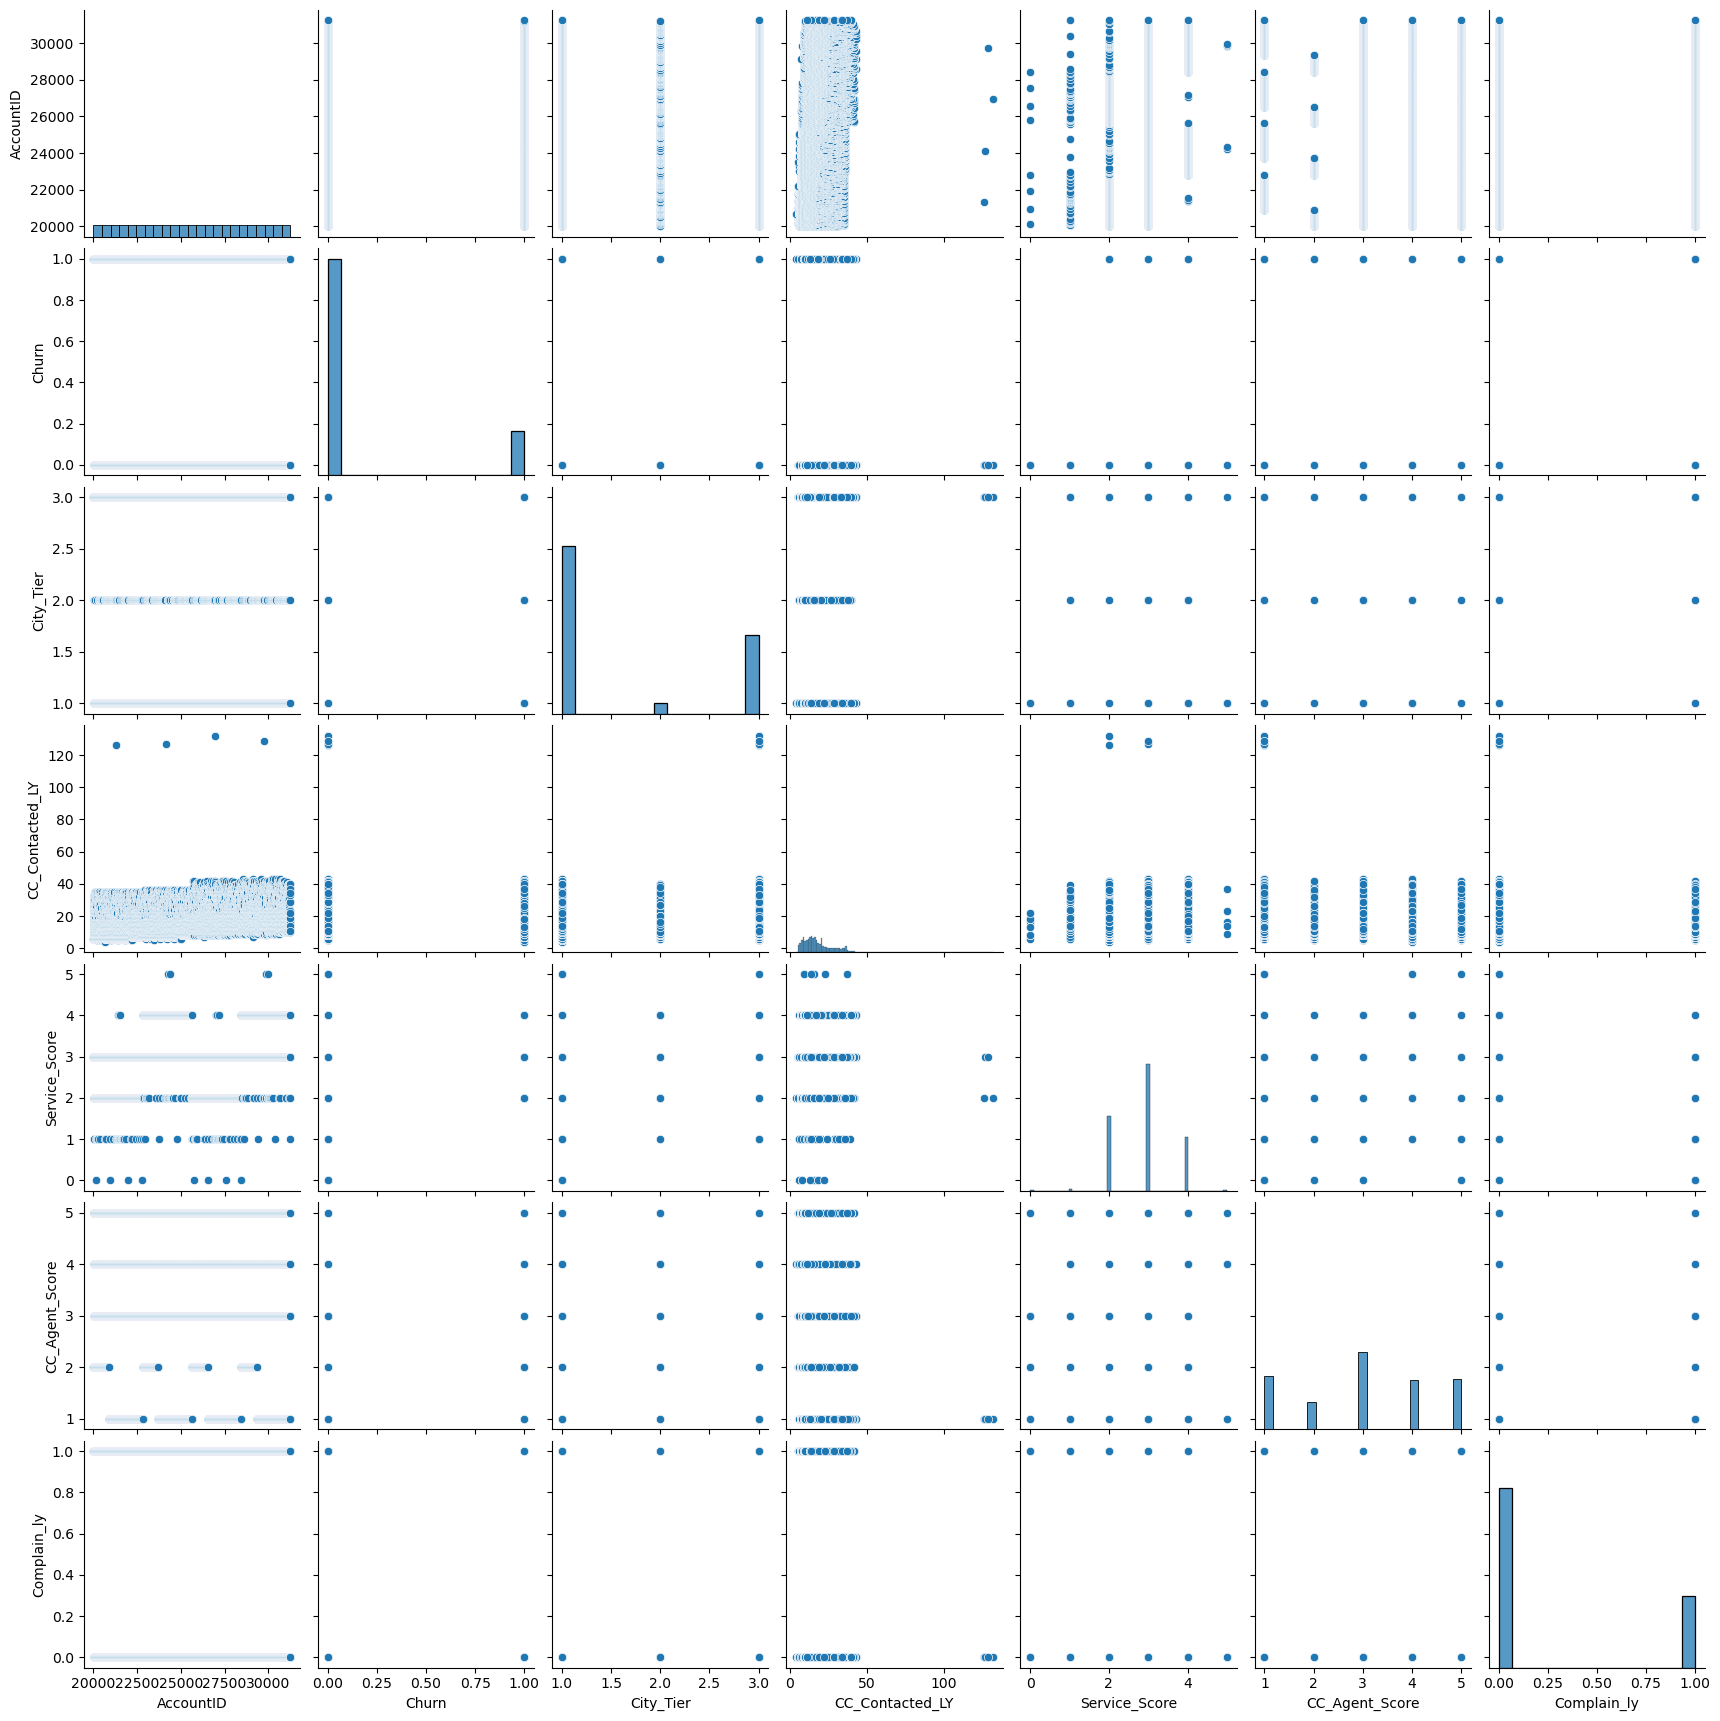

In [15]:
#the pair plot:-
sns.pairplot(data = churn)
plt.show()

In [16]:
#checking covariance
churn.cov()

AccountID      Churn  City_Tier  CC_Contacted_LY  \
AccountID        1.056657e+07 -11.606715   5.901660      7266.261698   
Churn           -1.160671e+01   0.140043   0.028821         0.238738   
City_Tier        5.901660e+00   0.028821   0.837253         0.095796   
CC_Contacted_LY  7.266262e+03   0.238738   0.095796        78.380380   
Service_Score    7.120564e+02   0.002442  -0.004278         0.385968   
CC_Agent_Score  -7.947894e+01   0.054599  -0.014494        -0.002556   
Complain_ly     -7.587819e+00   0.042520   0.001025         0.108939   

                 Service_Score  CC_Agent_Score  Complain_ly  
AccountID           712.056363      -79.478941    -7.587819  
Churn                 0.002442        0.054599     0.042520  
City_Tier            -0.004278       -0.014494     0.001025  
CC_Contacted_LY       0.385968       -0.002556     0.108939  
Service_Score         0.526472        0.032191     0.000866  
CC_Agent_Score        0.032191        1.903772    -0.019649  
Complain_ly           0.000866       -0.019649     0.203937

In [17]:
#checking correlation
churn.corr()

AccountID     Churn  City_Tier  CC_Contacted_LY  \
AccountID         1.000000 -0.009541   0.001983         0.252562   
Churn            -0.009541  1.000000   0.084135         0.072071   
City_Tier         0.001983  0.084135   1.000000         0.011835   
CC_Contacted_LY   0.252562  0.072071   0.011835         1.000000   
Service_Score     0.301782  0.008991  -0.006443         0.060052   
CC_Agent_Score   -0.017715  0.105796  -0.011479        -0.000209   
Complain_ly      -0.005168  0.251488   0.002478         0.027244   

                 Service_Score  CC_Agent_Score  Complain_ly  
AccountID             0.301782       -0.017715    -0.005168  
Churn                 0.008991        0.105796     0.251488  
City_Tier            -0.006443       -0.011479     0.002478  
CC_Contacted_LY       0.060052       -0.000209     0.027244  
Service_Score         1.000000        0.032135     0.002643  
CC_Agent_Score        0.032135        1.000000    -0.031459  
Complain_ly           0.002643       -0.031459     1.000000

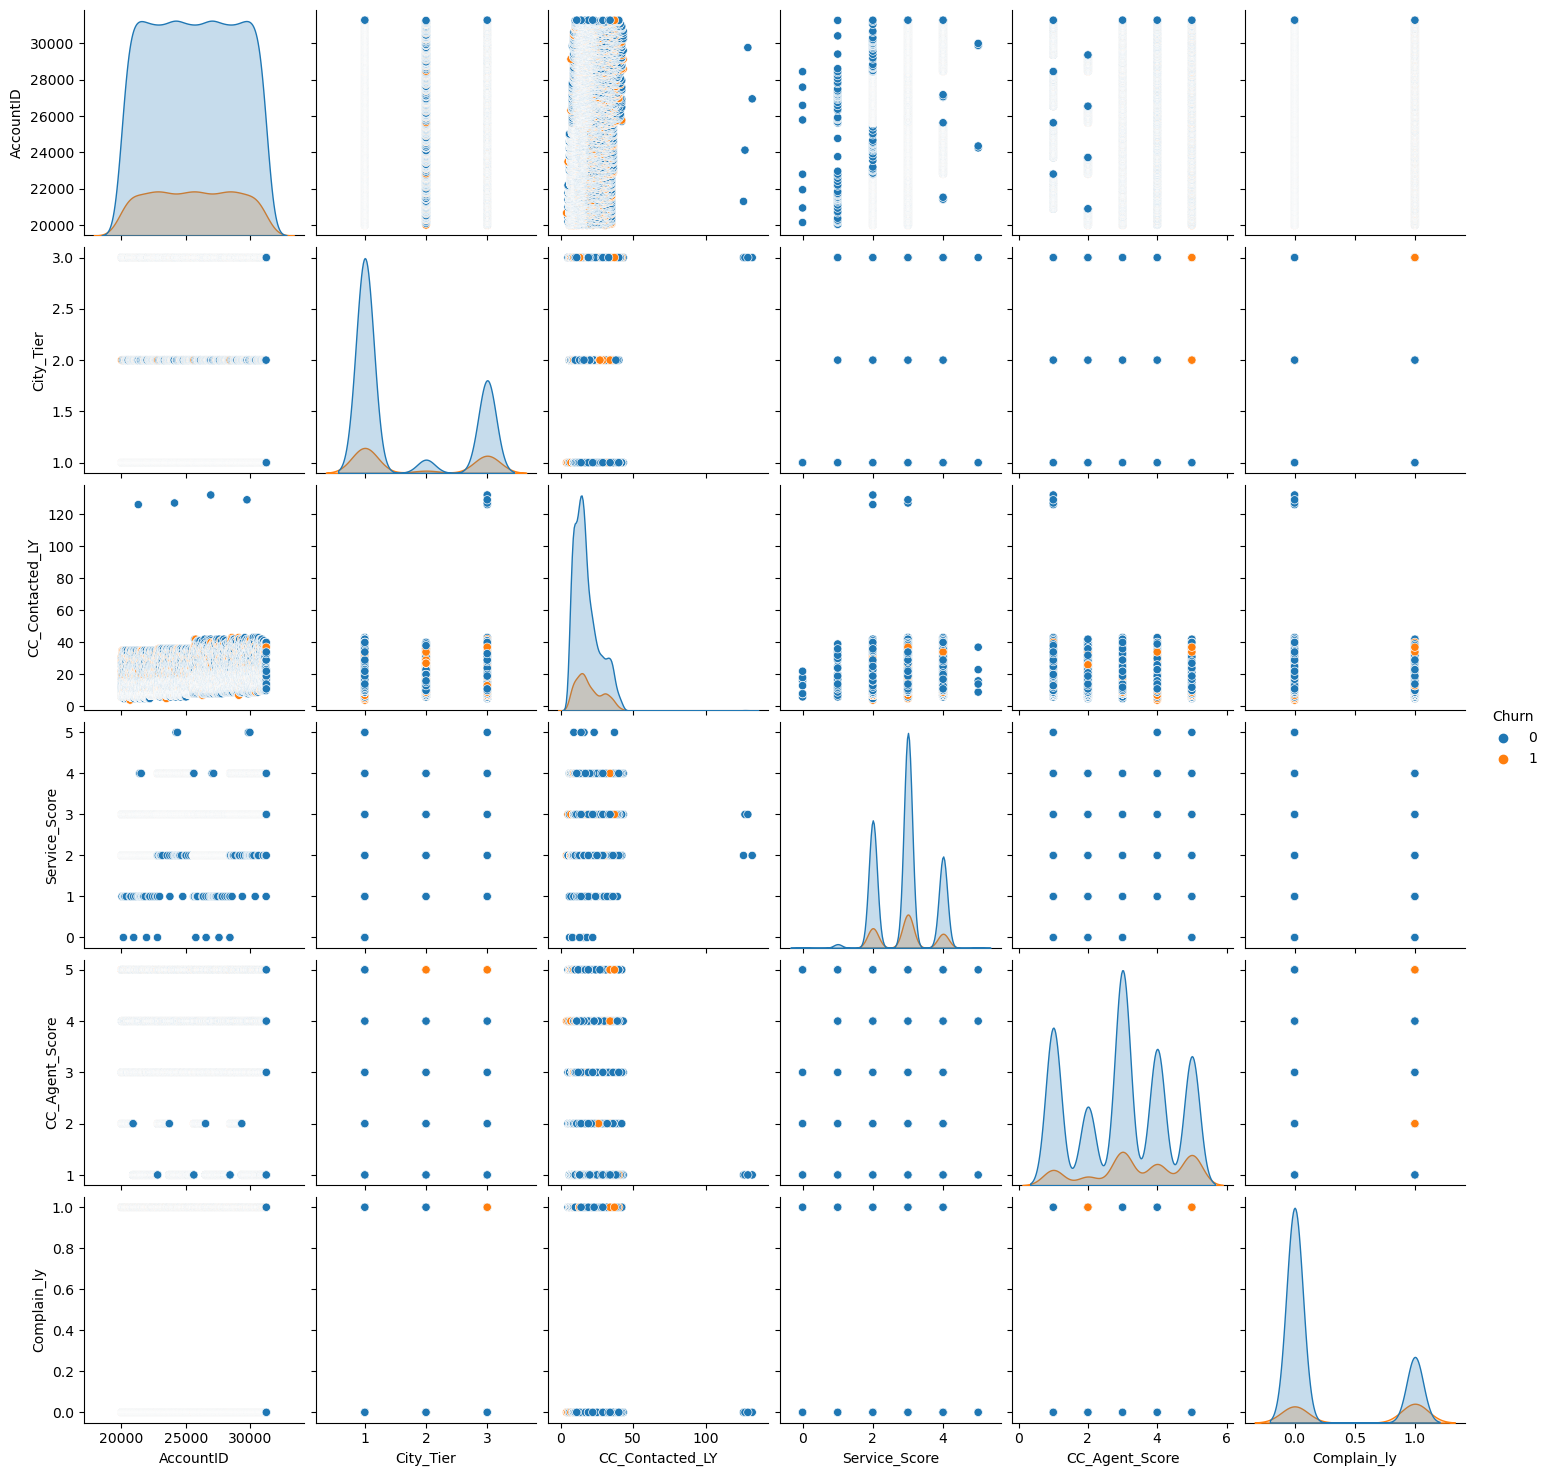

In [18]:
# plotting sns plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# pair plot to check on data distribution and co-linearity
sns.pairplot(churn, hue = 'Churn', diag_kind='kde')  
plt.show()

In [19]:
#checking if the data is balanced or not
churn.groupby(["Churn"]).count()

AccountID  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
Churn                                                                   
0           9364    9285       9269             9280     9277    9278   
1           1896    1873       1879             1878     1874    1874   

       Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
Churn                                                                       
0               9282                9271             9285            9270   
1               1880                1877             1878            1874   

       Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
Churn                                                               
0                9184           9278         9065            9364   
1                1864           1880         1838            1896   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  
Churn                                                                         
0                         9364                  9071      8978          9185  
1                         1896                  1832      1811          1854

# Uni-Variate Analysis

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


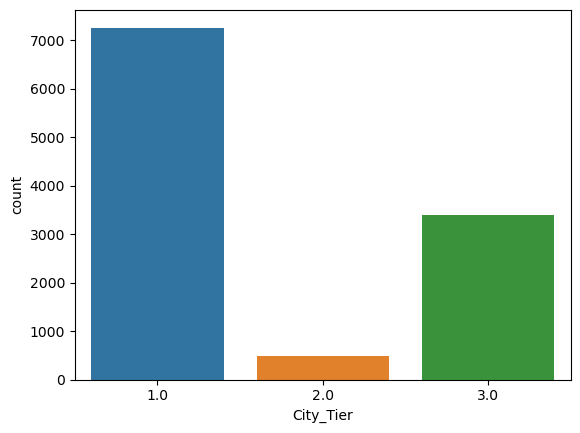

In [20]:
sns.countplot(churn["City_Tier"]);

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


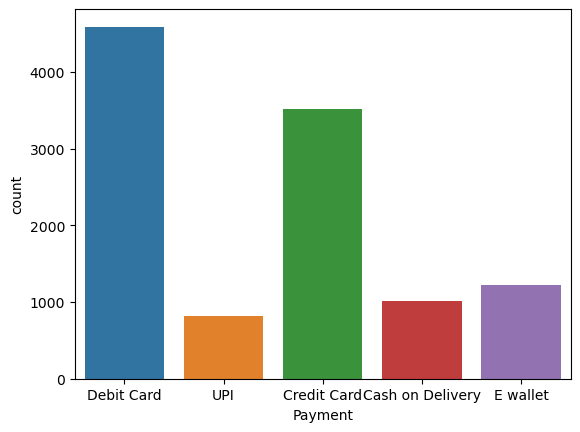

In [21]:
sns.countplot(churn["Payment"]);

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


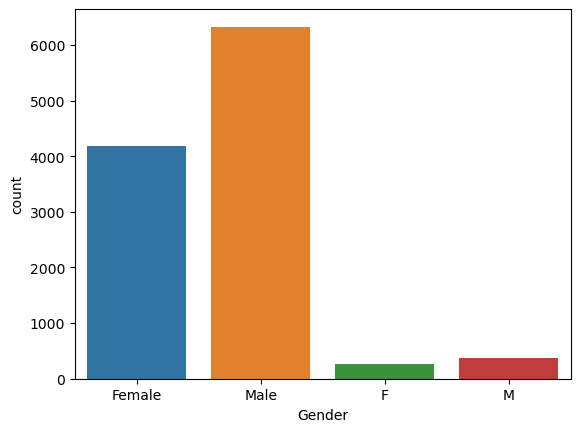

In [22]:
sns.countplot(churn["Gender"]);

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


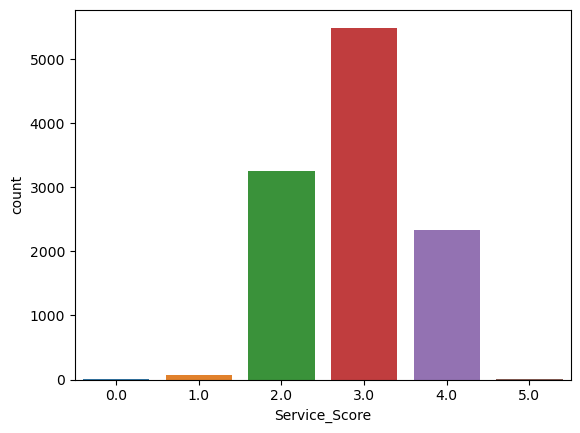

In [23]:
sns.countplot(churn["Service_Score"]);

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


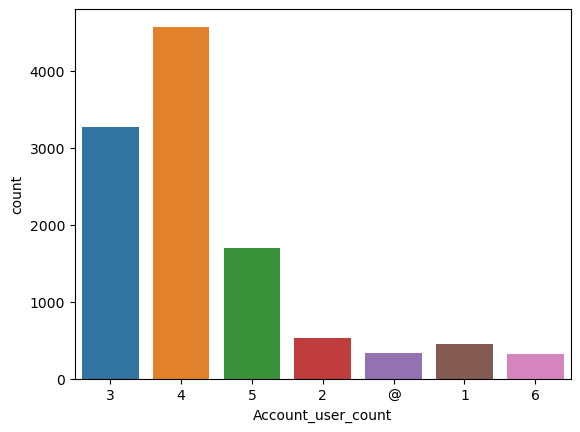

In [24]:
sns.countplot(churn["Account_user_count"]);

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


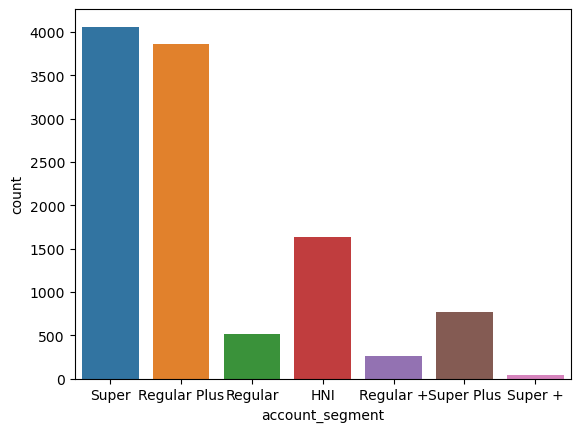

In [25]:
sns.countplot(churn["account_segment"]);

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


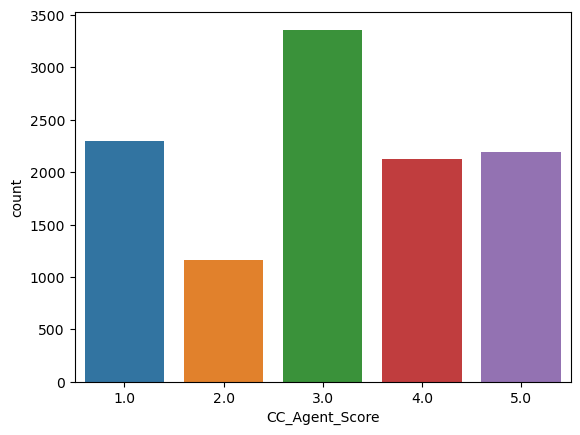

In [26]:
sns.countplot(churn["CC_Agent_Score"]);

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


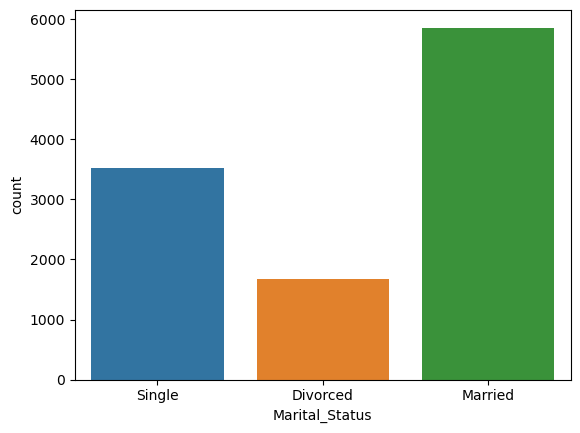

In [27]:
sns.countplot(churn["Marital_Status"]);

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


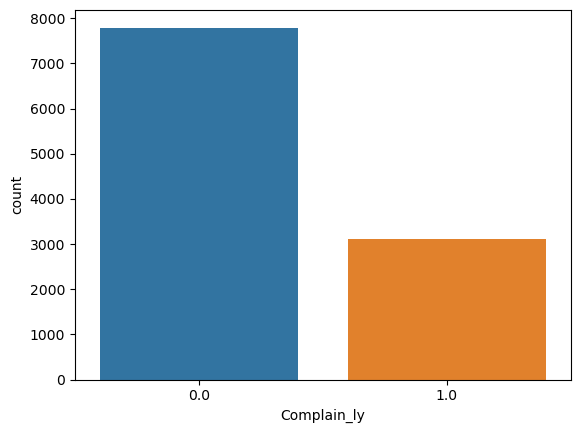

In [28]:
sns.countplot(churn["Complain_ly"]);

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


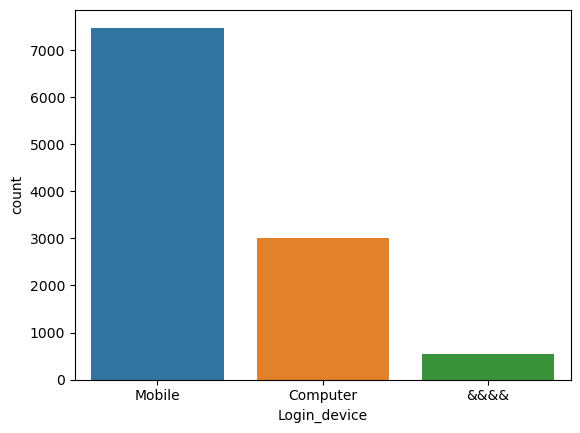

In [29]:
sns.countplot(churn["Login_device"]);

# Bi-Variate and multi variate analysis

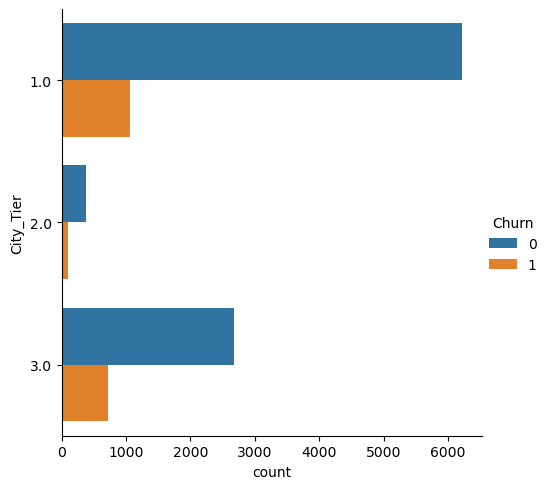

In [30]:
sns.catplot(y="City_Tier", hue="Churn", kind="count", data=churn)

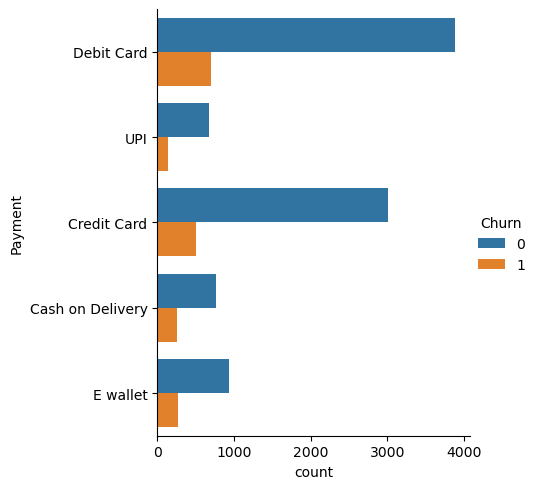

In [31]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=churn)

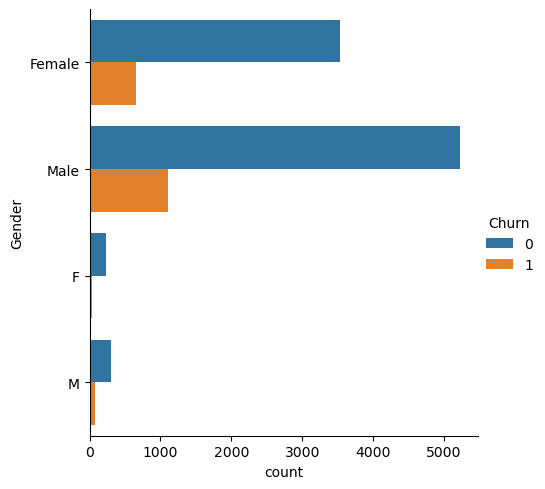

In [32]:
sns.catplot(y="Gender", hue="Churn", kind="count", data=churn)

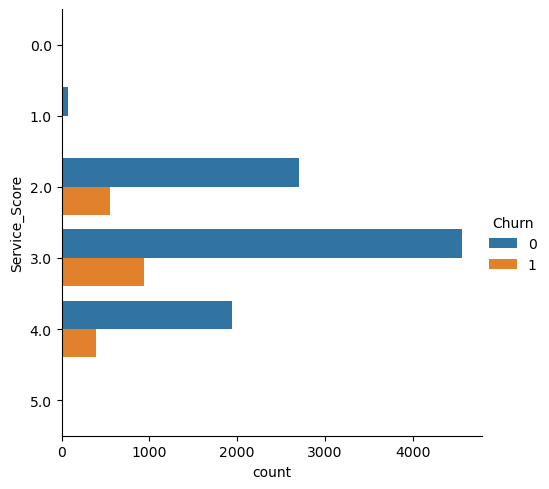

In [33]:
sns.catplot(y="Service_Score", hue="Churn", kind="count", data=churn)

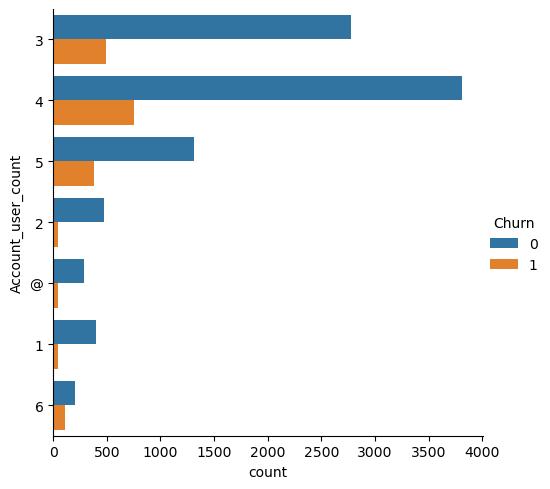

In [34]:
sns.catplot(y="Account_user_count", hue="Churn", kind="count", data=churn)

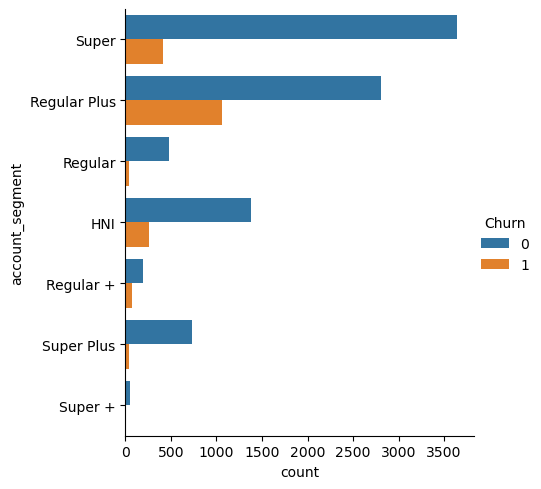

In [35]:
sns.catplot(y="account_segment", hue="Churn", kind="count", data=churn)

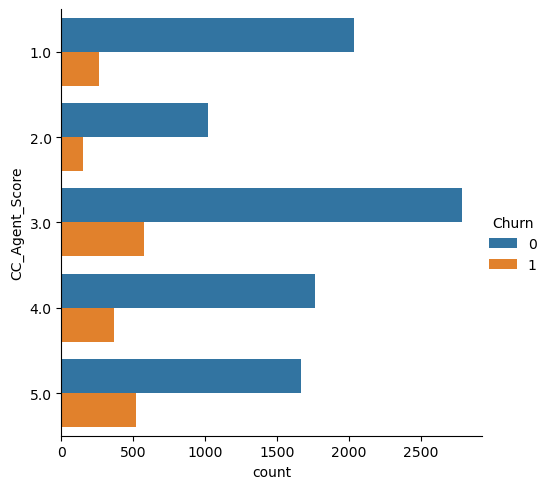

In [36]:
sns.catplot(y="CC_Agent_Score", hue="Churn", kind="count", data=churn)

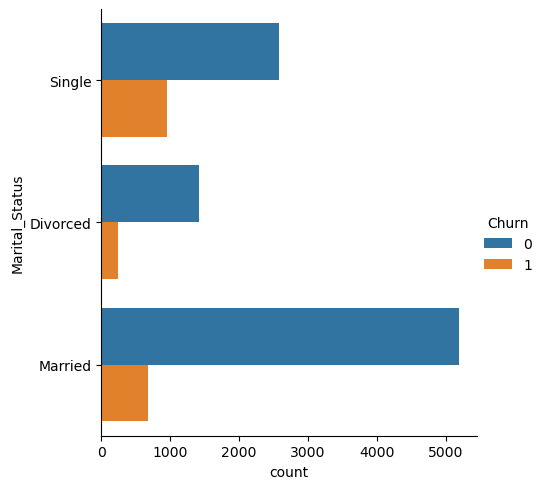

In [37]:
sns.catplot(y="Marital_Status", hue="Churn", kind="count", data=churn)

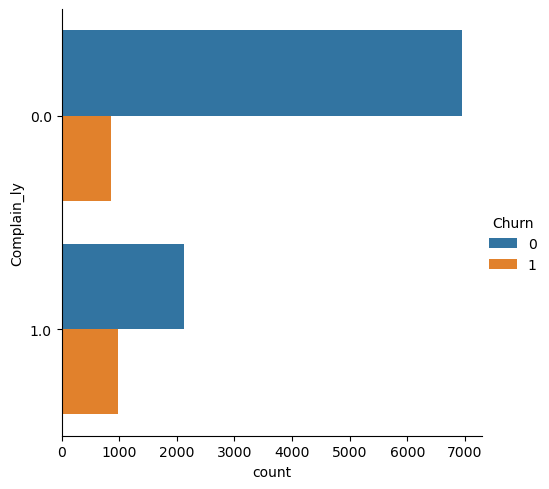

In [38]:
sns.catplot(y="Complain_ly", hue="Churn", kind="count", data=churn)

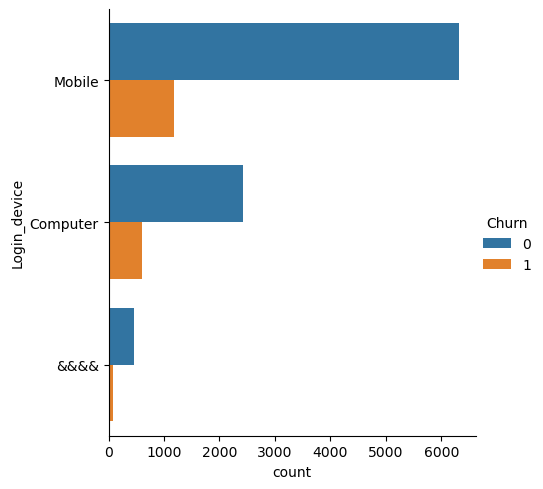

In [39]:
sns.catplot(y="Login_device", hue="Churn", kind="count", data=churn)

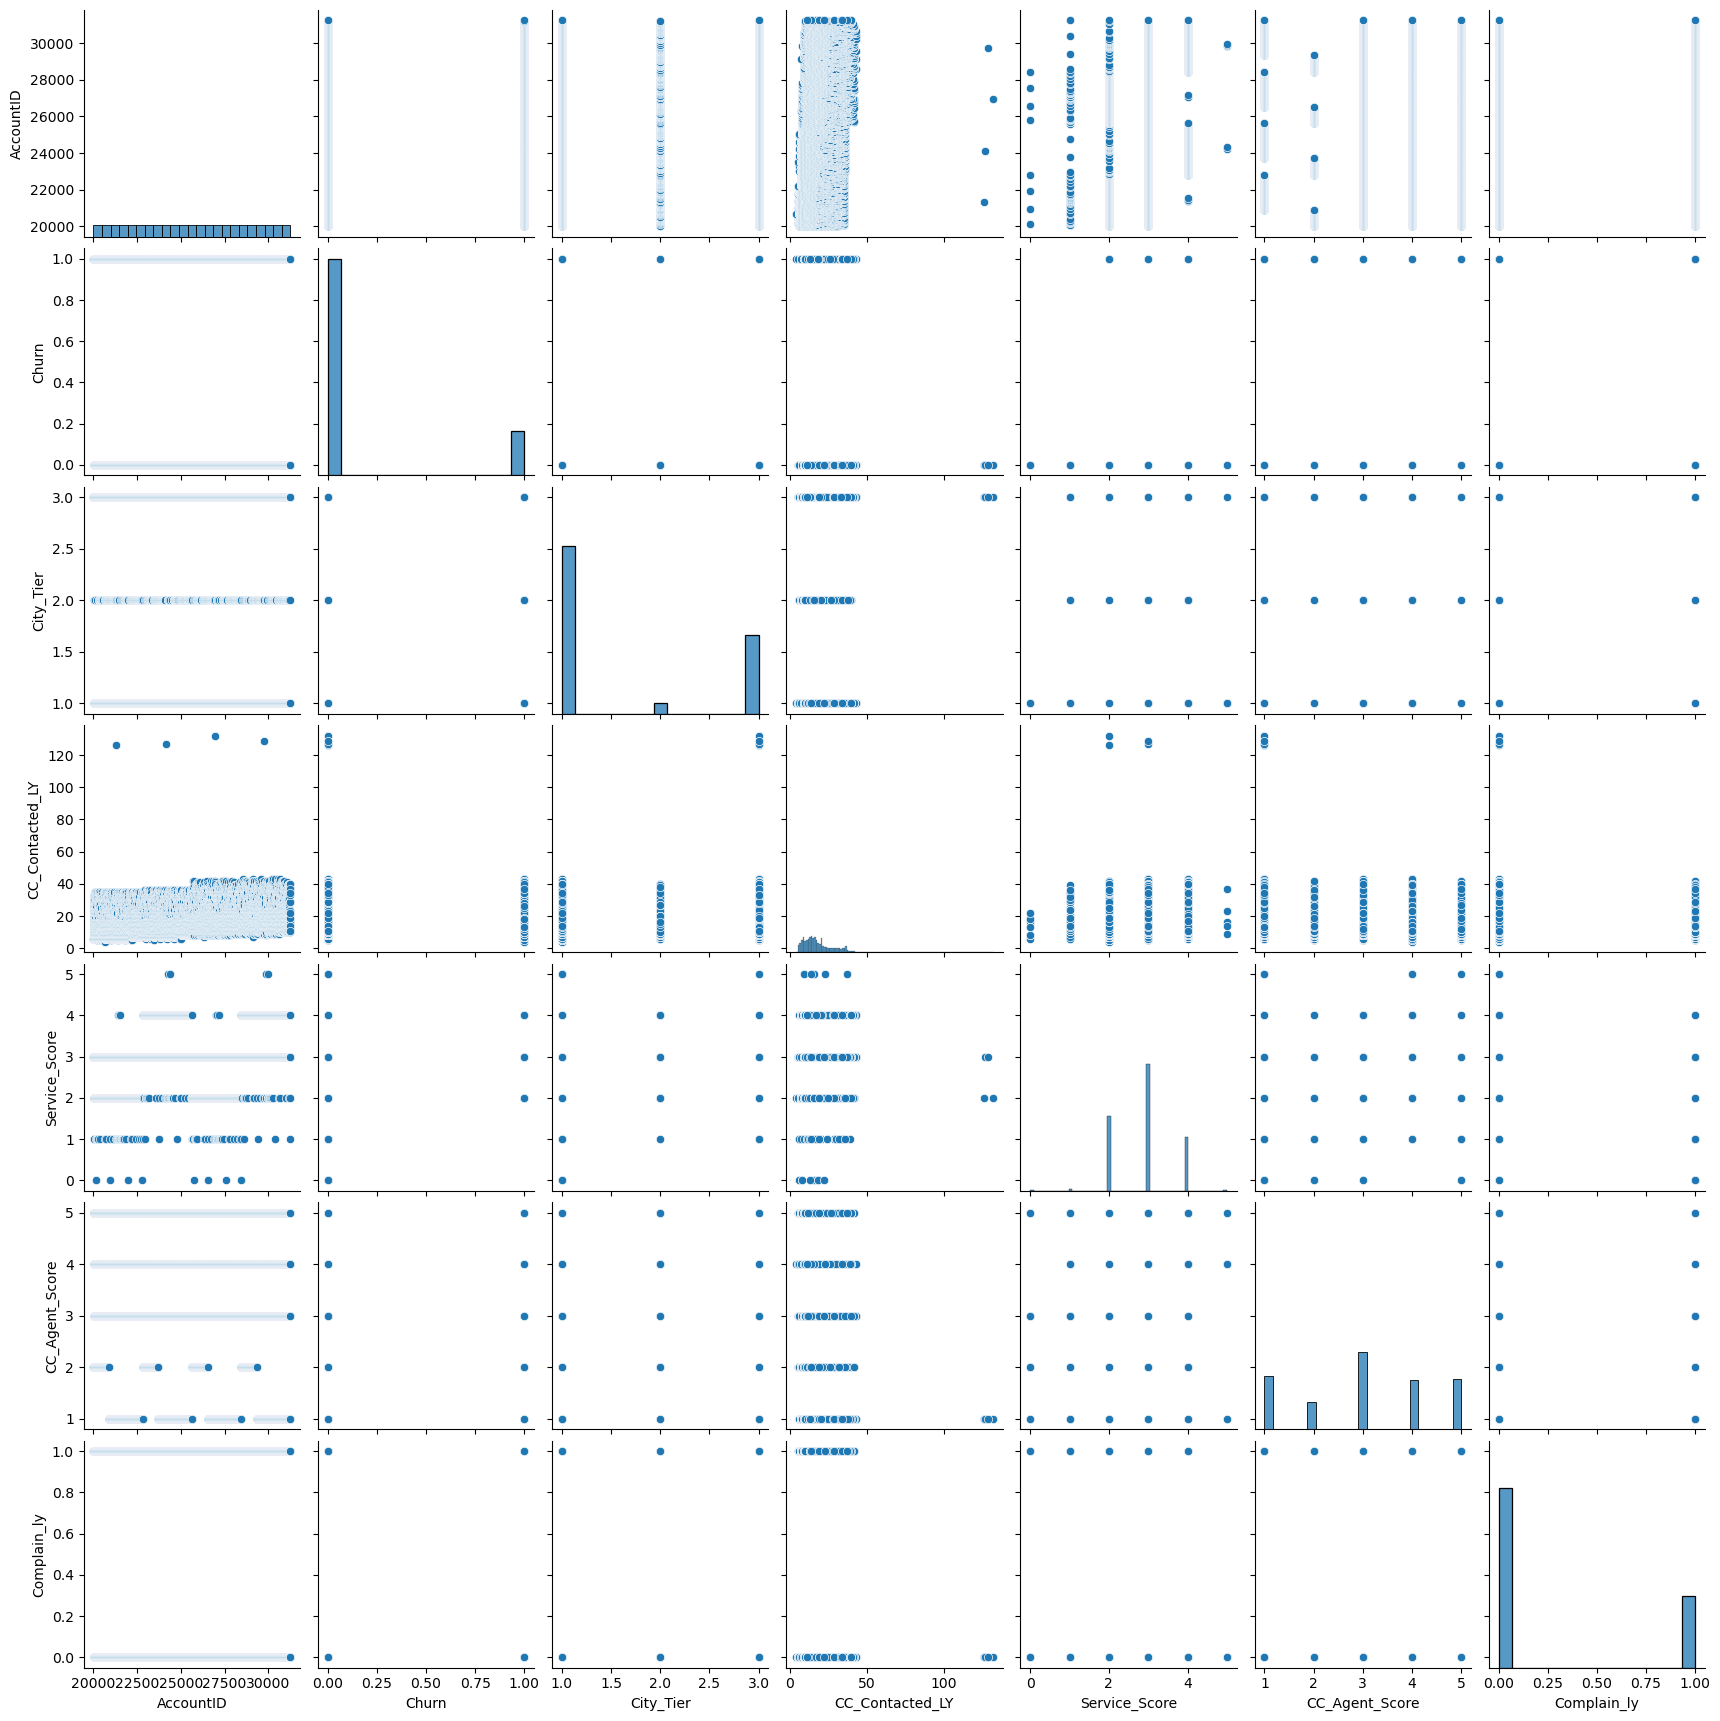

In [40]:
#the pair plot:-
sns.pairplot(data = churn)
plt.show()

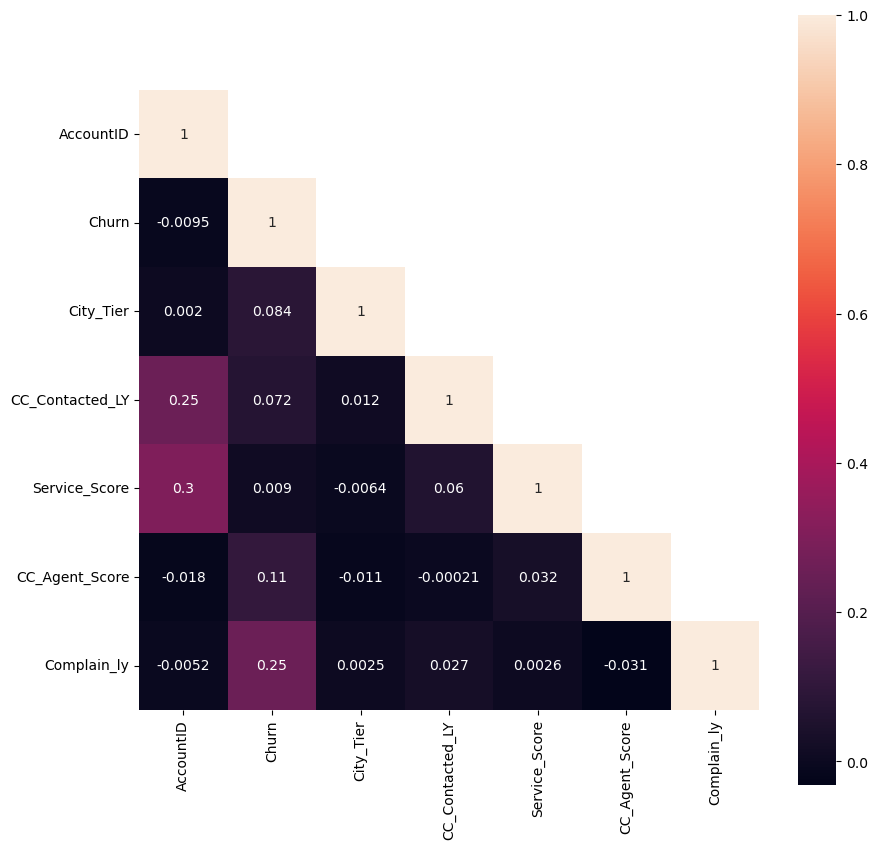

In [41]:
# plotting heatmap of correlation
cor = churn.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=1, square=True, annot=True)
plt.show()

In [42]:
# checking data distribution of categorical object data types
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

In [43]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [44]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# Treating Bad data

# Treating the veriable "tenure" 

In [45]:
churn["Tenure"].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [46]:
churn['Tenure'] = churn['Tenure'].replace('#',np.NaN)

In [47]:
churn['Tenure'] = churn['Tenure'].astype('Int64')

In [48]:
churn["Tenure"].unique()

<IntegerArray>
[   4,    0,    2,   13,   11, <NA>,    9,   99,   19,   20,   14,    8,   26,
   18,    5,   30,    7,    1,   23,    3,   29,    6,   28,   24,   25,   16,
   10,   15,   22,   27,   12,   21,   17,   50,   60,   31,   51,   61]
Length: 38, dtype: Int64

In [49]:
churn['Tenure'] = churn['Tenure'].fillna(churn['Tenure'].median())

In [50]:
churn["Tenure"].unique()

<IntegerArray>
[ 4,  0,  2, 13, 11,  9, 99, 19, 20, 14,  8, 26, 18,  5, 30,  7,  1, 23,  3,
 29,  6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60, 31, 51, 61]
Length: 37, dtype: Int64

In [51]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

# Treating the variable "City_Tier"

In [52]:
churn["City_Tier"].unique()

array([ 3.,  1., nan,  2.])

In [53]:
churn['City_Tier'] = churn['City_Tier'].fillna(churn['City_Tier'].mode()[0])

In [54]:
churn["City_Tier"].unique()

array([3., 1., 2.])

In [55]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [56]:
churn['City_Tier'] = churn['City_Tier'].astype('Int64')

In [57]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# Treating the variable "CC_Contacted_LY"

In [58]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [59]:
churn['CC_Contacted_LY'] = churn['CC_Contacted_LY'].fillna(churn['CC_Contacted_LY'].median())

In [60]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  34.,   5.,   4., 126.,   7.,
        36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43., 129.])

In [61]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [62]:
churn['CC_Contacted_LY'] = churn['CC_Contacted_LY'].astype('Int64')

In [63]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# Treating the variable "Payment"

In [64]:
churn["Payment"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [65]:
churn['Payment'] = churn['Payment'].fillna(churn['Payment'].mode()[0])

In [66]:
churn['Payment'] = churn['Payment'].replace('Debit Card','1')
churn['Payment'] = churn['Payment'].replace('UPI','2')
churn['Payment'] = churn['Payment'].replace('Credit Card','3')
churn['Payment'] = churn['Payment'].replace('Cash on Delivery','4')
churn['Payment'] = churn['Payment'].replace('E wallet','5')

In [67]:
churn["Payment"].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [68]:
churn['Payment'] = churn['Payment'].astype('float64')

In [69]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [70]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

# Treating the variable "Gender"

In [71]:
churn["Gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [72]:
churn['Gender'] = churn['Gender'].replace('Female','1')
churn['Gender'] = churn['Gender'].replace('F','1')
churn['Gender'] = churn['Gender'].replace('Male','2')
churn['Gender'] = churn['Gender'].replace('M','2')

In [73]:
churn["Gender"].unique()

array(['1', '2', nan], dtype=object)

In [74]:
churn['Gender'] = churn['Gender'].fillna(churn['Gender'].mode()[0])

In [75]:
churn["Gender"].unique()

array(['1', '2'], dtype=object)

In [76]:
churn['Gender'] = churn['Gender'].astype('float64')

In [77]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

# Treating the variable "Service_Score"

In [78]:
churn["Service_Score"].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [79]:
churn['Service_Score'] = churn['Service_Score'].fillna(churn['Service_Score'].mode()[0])

In [80]:
churn["Service_Score"].unique()

array([3., 2., 1., 0., 4., 5.])

In [81]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [82]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# Treating the variable "Account_user_count"

In [83]:
churn["Account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [84]:
churn['Account_user_count'] = churn['Account_user_count'].replace('@',np.NaN)

In [85]:
churn["Account_user_count"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [86]:
churn['Account_user_count'] = churn['Account_user_count'].fillna(churn['Account_user_count'].median())

In [87]:
churn["Account_user_count"].unique()

array([3., 4., 5., 2., 1., 6.])

In [88]:
churn['Account_user_count'] = churn['Account_user_count'].astype('float64')

In [89]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [90]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# Tretaing the variable "account_segment"

In [91]:
churn["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [92]:
churn['account_segment'] = churn['account_segment'].replace('Super','1')
churn['account_segment'] = churn['account_segment'].replace('Regular Plus','2')
churn['account_segment'] = churn['account_segment'].replace('Regular +','2')
churn['account_segment'] = churn['account_segment'].replace('Regular','3')
churn['account_segment'] = churn['account_segment'].replace('HNI','4')
churn['account_segment'] = churn['account_segment'].replace('Super Plus','5')
churn['account_segment'] = churn['account_segment'].replace('Super +','5')

In [93]:
churn["account_segment"].unique()

array(['1', '2', '3', '4', nan, '5'], dtype=object)

In [94]:
churn['account_segment'] = churn['account_segment'].fillna(churn['account_segment'].mode()[0])

In [95]:
churn["account_segment"].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [96]:
churn['account_segment'] = churn['account_segment'].astype('float64')

In [97]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [98]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# Treating the variable "CC_Agent_Score"

In [99]:
churn["CC_Agent_Score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [100]:
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].fillna(churn['CC_Agent_Score'].mode()[0])

In [101]:
churn["CC_Agent_Score"].unique()

array([2., 3., 5., 4., 1.])

In [102]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [103]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# Treating the variable "Marital_Status"

In [104]:
churn["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [105]:
churn['Marital_Status'] = churn['Marital_Status'].fillna(churn['Marital_Status'].mode()[0])

In [106]:
churn["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [107]:
churn['Marital_Status'] = churn['Marital_Status'].replace('Single','1')
churn['Marital_Status'] = churn['Marital_Status'].replace('Divorced','2')
churn['Marital_Status'] = churn['Marital_Status'].replace('Married','3')

In [108]:
churn['Marital_Status'] = churn['Marital_Status'].astype('float64')

In [109]:
churn["Marital_Status"].unique()

array([1., 2., 3.])

In [110]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [111]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# Tretaing the variable "rev_per_month"

In [112]:
churn["rev_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [113]:
churn['rev_per_month'] = churn['rev_per_month'].replace('+',np.NaN)

In [114]:
churn["rev_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [115]:
churn['rev_per_month'] = churn['rev_per_month'].fillna(churn['rev_per_month'].median())

In [116]:
churn['rev_per_month'] = churn['rev_per_month'].astype('float64')

In [117]:
churn["rev_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5., 130.,
        19., 139., 102., 120., 138., 127., 123., 124., 116.,  21., 126.,
       134., 113., 114., 108., 140., 133., 129., 107., 118.,  11., 105.,
        20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,  13.,
        12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135., 111.,
       109., 100., 103.])

In [118]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [119]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# Treating the variable "Complain_ly"

In [120]:
churn["Complain_ly"].unique()

array([ 1.,  0., nan])

In [121]:
churn['Complain_ly'] = churn['Complain_ly'].fillna(churn['Complain_ly'].mode()[0])

In [122]:
churn["Complain_ly"].unique()

array([1., 0.])

In [123]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [124]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# treating the variable 'rev_growth_yoy'

In [125]:
churn["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [126]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].replace('$',np.NaN)

In [127]:
churn["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [128]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].fillna(churn['rev_growth_yoy'].median())

In [129]:
churn["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26.,  4., 27., 28.])

In [130]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].astype('float64')

In [131]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [132]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# Treating the variable "coupon_used_for_payment"

In [133]:
churn["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [134]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('#',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('$',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('*',np.NaN)

In [135]:
churn["coupon_used_for_payment"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [136]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].fillna(churn['coupon_used_for_payment'].median())

In [137]:
churn["coupon_used_for_payment"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., 14., 16.])

In [138]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].astype('float64')

In [139]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [140]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

# tretaing the variable "Day_Since_CC_connect"

In [141]:
churn["Day_Since_CC_connect"].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [142]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].replace('$',np.NaN)

In [143]:
churn["Day_Since_CC_connect"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [144]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].fillna(churn['Day_Since_CC_connect'].median())

In [145]:
churn["Day_Since_CC_connect"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., 11., 10.,  9.,
       13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [146]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].astype('float64')

In [147]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                   471
Login_device               221
dtype: int64

In [148]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                    object
Login_device                object
dtype: object

# Treating the variable "cashback"

In [149]:
churn["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [150]:
churn['cashback'] = churn['cashback'].replace('$',np.NaN)

In [151]:
churn['cashback'] = churn['cashback'].fillna(churn['cashback'].median())

In [152]:
churn["cashback"].unique()

array([159.93, 120.9 , 165.25, ..., 227.36, 226.91, 191.42])

In [153]:
churn['cashback'] = churn['cashback'].astype('float64')

In [154]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               221
dtype: int64

In [155]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

# Treating the variable "Login_device"

In [156]:
churn["Login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [157]:
churn['Login_device'] = churn['Login_device'].replace('&&&&',np.NaN)

In [158]:
churn["Login_device"].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [159]:
churn['Login_device'] = churn['Login_device'].fillna(churn['Login_device'].mode()[0])

In [160]:
churn["Login_device"].unique()

array(['Mobile', 'Computer'], dtype=object)

In [161]:
churn['Login_device'] = churn['Login_device'].replace('Mobile','1')
churn['Login_device'] = churn['Login_device'].replace('Computer','2')

In [162]:
churn["Login_device"].unique()

array(['1', '2'], dtype=object)

In [163]:
churn['Login_device'] = churn['Login_device'].astype('float64')

In [164]:
churn.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [165]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device               float64
dtype: object

<AxesSubplot:xlabel='Churn', ylabel='Density'>

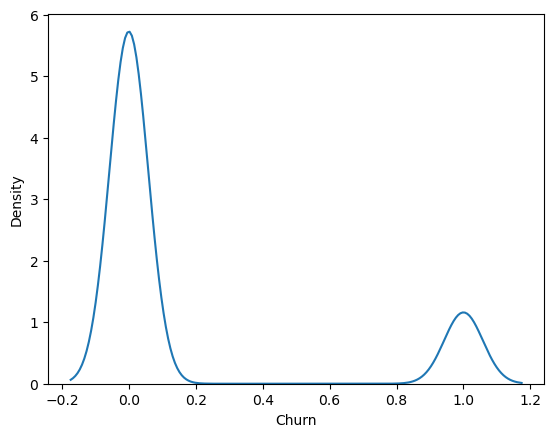

In [166]:
# checking if data is balanced
sns.kdeplot(data=churn, x="Churn")

In [167]:
# lets check the percentage of outlier in each column
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).sum()/churn.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

outlier %
AccountID                     0.00
Churn                        16.84
Tenure                        1.23
City_Tier                     0.00
CC_Contacted_LY               0.37
Payment                       0.00
Gender                        0.00
Service_Score                 0.12
Account_user_count            6.76
account_segment               0.00
CC_Agent_Score                0.00
Marital_Status                0.00
rev_per_month                 1.64
Complain_ly                   0.00
rev_growth_yoy                0.00
coupon_used_for_payment      12.26
Day_Since_CC_connect          1.15
cashback                      8.76
Login_device                  0.00

# EDA after data cleaning

In [168]:
# checking info of data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  Int64  
 3   City_Tier                11260 non-null  Int64  
 4   CC_Contacted_LY          11260 non-null  Int64  
 5   Payment                  11260 non-null  float64
 6   Gender                   11260 non-null  float64
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  float64
 9   account_segment          11260 non-null  float64
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  float64
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [169]:
# describing data
churn.describe().T

count          mean          std      min  \
AccountID                11260.0  25629.500000  3250.626350  20000.0   
Churn                    11260.0      0.168384     0.374223      0.0   
Tenure                   11260.0     10.985879    12.757534      0.0   
City_Tier                11260.0      1.647425     0.912763      1.0   
CC_Contacted_LY          11260.0     17.850178     8.814851      4.0   
Payment                  11260.0      2.399112     1.379380      1.0   
Gender                   11260.0      1.604973     0.488878      1.0   
Service_Score            11260.0      2.903375     0.722476      0.0   
Account_user_count       11260.0      3.704973     1.004383      1.0   
account_segment          11260.0      2.194494     1.267004      1.0   
CC_Agent_Score           11260.0      3.065808     1.372663      1.0   
Marital_Status           11260.0      2.226643     0.894745      1.0   
rev_per_month            11260.0      6.266874    11.488990      1.0   
Complain_ly              11260.0      0.276288     0.447181      0.0   
rev_growth_yoy           11260.0     16.193073     3.757271      4.0   
coupon_used_for_payment  11260.0      1.790409     1.969331      0.0   
Day_Since_CC_connect     11260.0      4.581261     3.649643      0.0   
cashback                 11260.0    194.934722   174.977865      0.0   
Login_device             11260.0      1.268028     0.442952      1.0   

                              25%       50%       75%      max  
AccountID                22814.75  25629.50  28444.25  31259.0  
Churn                        0.00      0.00      0.00      1.0  
Tenure                       2.00      9.00     16.00     99.0  
City_Tier                    1.00      1.00      3.00      3.0  
CC_Contacted_LY             11.00     16.00     23.00    132.0  
Payment                      1.00      3.00      3.00      5.0  
Gender                       1.00      2.00      2.00      2.0  
Service_Score                2.00      3.00      3.00      5.0  
Account_user_count           3.00      4.00      4.00      6.0  
account_segment              1.00      2.00      3.00      5.0  
CC_Agent_Score               2.00      3.00      4.00      5.0  
Marital_Status               1.00      3.00      3.00      3.0  
rev_per_month                3.00      5.00      7.00    140.0  
Complain_ly                  0.00      0.00      1.00      1.0  
rev_growth_yoy              13.00     15.00     19.00     28.0  
coupon_used_for_payment      1.00      1.00      2.00     16.0  
Day_Since_CC_connect         2.00      3.00      7.00     47.0  
cashback                   147.89    165.25    197.31   1997.0  
Login_device                 1.00      1.00      2.00      2.0

In [170]:
# describing data including object variable as well
churn.describe(include='all').T

count          mean          std      min  \
AccountID                11260.0  25629.500000  3250.626350  20000.0   
Churn                    11260.0      0.168384     0.374223      0.0   
Tenure                   11260.0     10.985879    12.757534      0.0   
City_Tier                11260.0      1.647425     0.912763      1.0   
CC_Contacted_LY          11260.0     17.850178     8.814851      4.0   
Payment                  11260.0      2.399112     1.379380      1.0   
Gender                   11260.0      1.604973     0.488878      1.0   
Service_Score            11260.0      2.903375     0.722476      0.0   
Account_user_count       11260.0      3.704973     1.004383      1.0   
account_segment          11260.0      2.194494     1.267004      1.0   
CC_Agent_Score           11260.0      3.065808     1.372663      1.0   
Marital_Status           11260.0      2.226643     0.894745      1.0   
rev_per_month            11260.0      6.266874    11.488990      1.0   
Complain_ly              11260.0      0.276288     0.447181      0.0   
rev_growth_yoy           11260.0     16.193073     3.757271      4.0   
coupon_used_for_payment  11260.0      1.790409     1.969331      0.0   
Day_Since_CC_connect     11260.0      4.581261     3.649643      0.0   
cashback                 11260.0    194.934722   174.977865      0.0   
Login_device             11260.0      1.268028     0.442952      1.0   

                              25%       50%       75%      max  
AccountID                22814.75  25629.50  28444.25  31259.0  
Churn                        0.00      0.00      0.00      1.0  
Tenure                       2.00      9.00     16.00     99.0  
City_Tier                    1.00      1.00      3.00      3.0  
CC_Contacted_LY             11.00     16.00     23.00    132.0  
Payment                      1.00      3.00      3.00      5.0  
Gender                       1.00      2.00      2.00      2.0  
Service_Score                2.00      3.00      3.00      5.0  
Account_user_count           3.00      4.00      4.00      6.0  
account_segment              1.00      2.00      3.00      5.0  
CC_Agent_Score               2.00      3.00      4.00      5.0  
Marital_Status               1.00      3.00      3.00      3.0  
rev_per_month                3.00      5.00      7.00    140.0  
Complain_ly                  0.00      0.00      1.00      1.0  
rev_growth_yoy              13.00     15.00     19.00     28.0  
coupon_used_for_payment      1.00      1.00      2.00     16.0  
Day_Since_CC_connect         2.00      3.00      7.00     47.0  
cashback                   147.89    165.25    197.31   1997.0  
Login_device                 1.00      1.00      2.00      2.0

In [171]:
# checking for null values
churn.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [172]:
# kest check kurtosis and skewness of data
print("kurtosis and skewness of dataste is as below")
pd.DataFrame(data = [churn.kurtosis(), churn.skew()], index=['Kurtosis','Skewness']).T.round(2)

kurtosis and skewness of dataste is as below


Kurtosis  Skewness
AccountID                   -1.20      0.00
Churn                        1.14      1.77
Tenure                      23.92      3.94
City_Tier                   -1.37      0.75
CC_Contacted_LY              8.33      1.43
Payment                     -1.02      0.45
Gender                      -1.82     -0.43
Service_Score               -0.65      0.00
Account_user_count           0.73     -0.43
account_segment             -0.36      0.92
CC_Agent_Score              -1.11     -0.14
Marital_Status              -1.59     -0.46
rev_per_month               93.89      9.44
Complain_ly                 -1.00      1.00
rev_growth_yoy              -0.22      0.75
coupon_used_for_payment      9.10      2.58
Day_Since_CC_connect         5.57      1.32
cashback                    84.85      8.97
Login_device                -0.90      1.05

In [173]:
# lets check the percentage of outlier in each column
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).sum()/churn.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

outlier %
AccountID                     0.00
Churn                        16.84
Tenure                        1.23
City_Tier                     0.00
CC_Contacted_LY               0.37
Payment                       0.00
Gender                        0.00
Service_Score                 0.12
Account_user_count            6.76
account_segment               0.00
CC_Agent_Score                0.00
Marital_Status                0.00
rev_per_month                 1.64
Complain_ly                   0.00
rev_growth_yoy                0.00
coupon_used_for_payment      12.26
Day_Since_CC_connect          1.15
cashback                      8.76
Login_device                  0.00

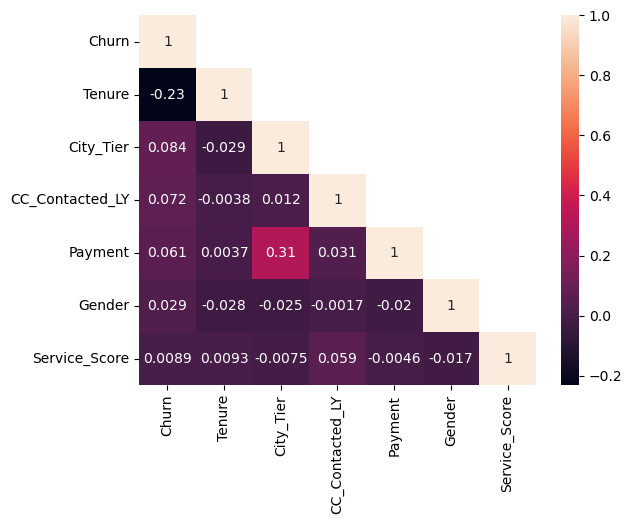

In [174]:
sns.heatmap(churn[['Churn','Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score']].corr(),
            annot=True,mask=np.triu(churn[['Churn','Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score']].corr(),+1));

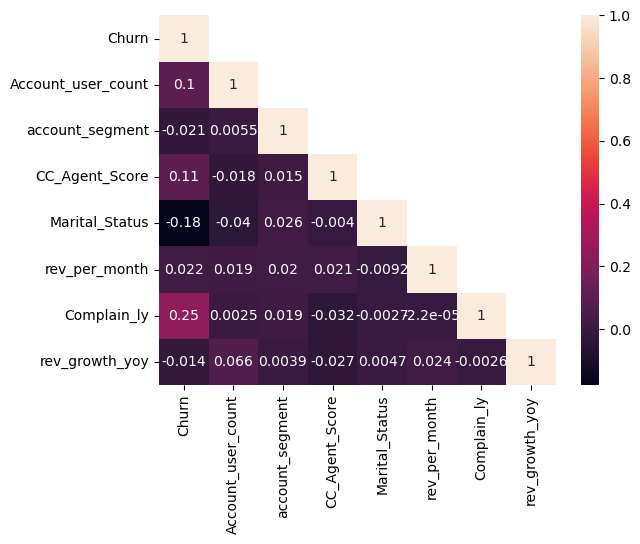

In [175]:
sns.heatmap(churn[['Churn','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy']].corr(),
            annot=True,mask=np.triu(churn[['Churn','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy']].corr(),+1));

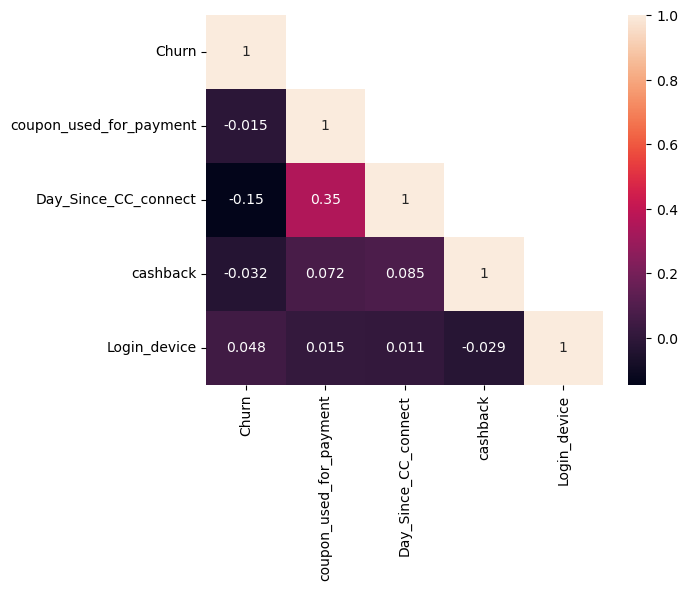

In [176]:
sns.heatmap(churn[['Churn','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']].corr(),
            annot=True,mask=np.triu(churn[['Churn','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']].corr(),+1));

# scaling data and outlier treatment

In [177]:
churn['Payment'] = churn['Payment'].astype('int64')
churn['Gender'] = churn['Gender'].astype('int64')
churn['Service_Score'] = churn['Service_Score'].astype('int64')
churn['Account_user_count'] = churn['Account_user_count'].astype('int64')
churn['account_segment'] = churn['account_segment'].astype('int64')
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].astype('int64')
churn['rev_per_month'] = churn['rev_per_month'].astype('int64')
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].astype('int64')
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].astype('int64')
churn['cashback'] = churn['cashback'].astype('int64')
churn['Marital_Status'] = churn['Marital_Status'].astype('int64')
churn['Complain_ly'] = churn['Complain_ly'].astype('int64')
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].astype('int64')
churn['Login_device'] = churn['Login_device'].astype('int64')

In [178]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   AccountID                11260 non-null  int64
 1   Churn                    11260 non-null  int64
 2   Tenure                   11260 non-null  Int64
 3   City_Tier                11260 non-null  Int64
 4   CC_Contacted_LY          11260 non-null  Int64
 5   Payment                  11260 non-null  int64
 6   Gender                   11260 non-null  int64
 7   Service_Score            11260 non-null  int64
 8   Account_user_count       11260 non-null  int64
 9   account_segment          11260 non-null  int64
 10  CC_Agent_Score           11260 non-null  int64
 11  Marital_Status           11260 non-null  int64
 12  rev_per_month            11260 non-null  int64
 13  Complain_ly              11260 non-null  int64
 14  rev_growth_yoy           11260 non-null  int64
 15  co

# Visualization before outlier treatment

<AxesSubplot:xlabel='Tenure'>

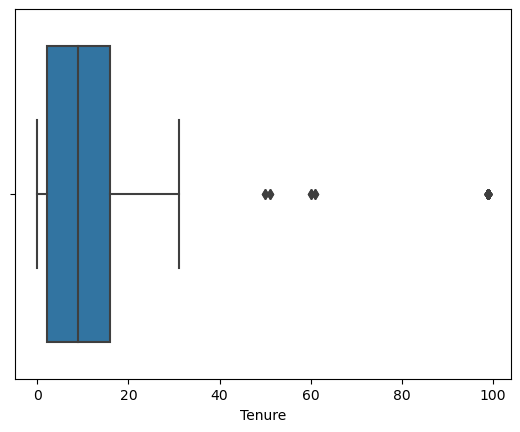

In [179]:
sns.boxplot(x="Tenure", data = churn)

<AxesSubplot:xlabel='CC_Contacted_LY'>

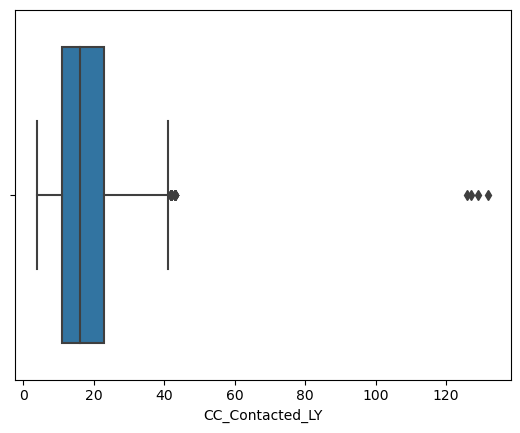

In [180]:
sns.boxplot(x="CC_Contacted_LY", data = churn)

<AxesSubplot:xlabel='Account_user_count'>

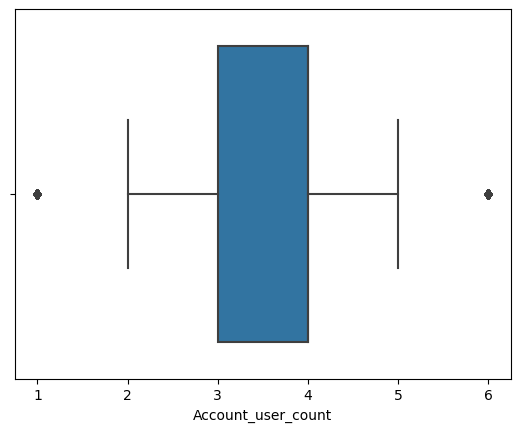

In [181]:
sns.boxplot(x="Account_user_count", data = churn)

<AxesSubplot:xlabel='rev_per_month'>

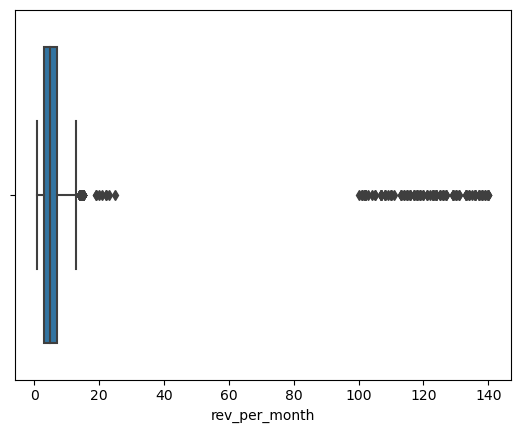

In [182]:
sns.boxplot(x="rev_per_month", data = churn)

<AxesSubplot:xlabel='rev_growth_yoy'>

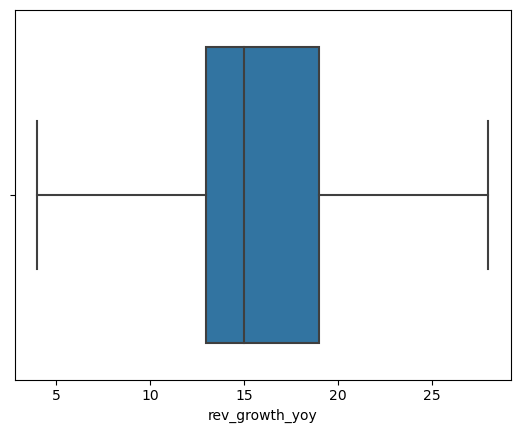

In [183]:
sns.boxplot(x="rev_growth_yoy", data = churn)

<AxesSubplot:xlabel='coupon_used_for_payment'>

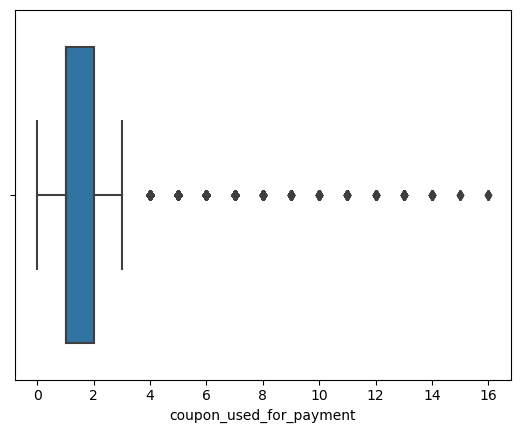

In [184]:
sns.boxplot(x="coupon_used_for_payment", data = churn)

<AxesSubplot:xlabel='Day_Since_CC_connect'>

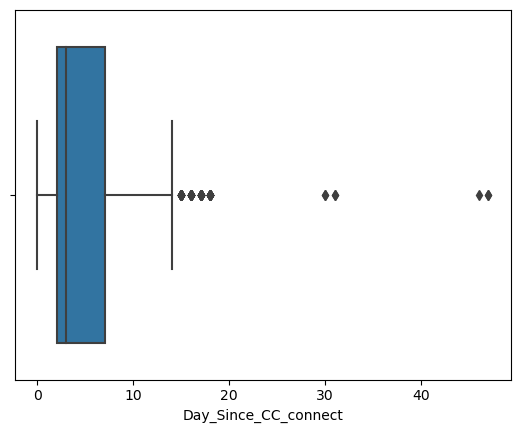

In [185]:
sns.boxplot(x="Day_Since_CC_connect", data = churn)

<AxesSubplot:xlabel='cashback'>

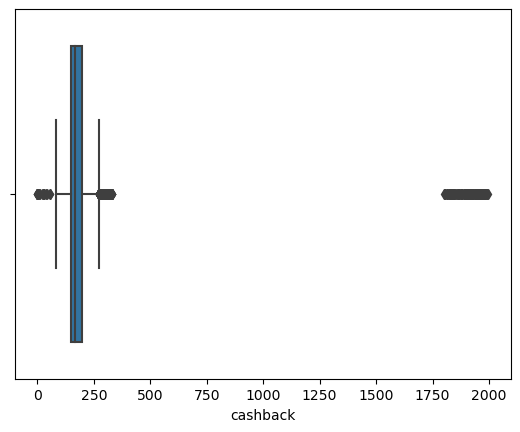

In [186]:
sns.boxplot(x="cashback", data = churn)

In [187]:
#treating outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [188]:
lw,up=remove_outlier(churn['Tenure'])
churn['Tenure']=np.where(churn['Tenure']>up,up,churn['Tenure'])
churn['Tenure']=np.where(churn['Tenure']<lw,lw,churn['Tenure'])

lw,up=remove_outlier(churn['CC_Contacted_LY'])
churn['CC_Contacted_LY']=np.where(churn['CC_Contacted_LY']>up,up,churn['CC_Contacted_LY'])
churn['CC_Contacted_LY']=np.where(churn['CC_Contacted_LY']<lw,lw,churn['CC_Contacted_LY'])

lw,up=remove_outlier(churn['Account_user_count'])
churn['Account_user_count']=np.where(churn['Account_user_count']>up,up,churn['Account_user_count'])
churn['Account_user_count']=np.where(churn['Account_user_count']<lw,lw,churn['Account_user_count'])

lw,up=remove_outlier(churn['cashback'])
churn['cashback']=np.where(churn['cashback']>up,up,churn['cashback'])
churn['cashback']=np.where(churn['cashback']<lw,lw,churn['cashback'])

lw,up=remove_outlier(churn['rev_per_month'])
churn['rev_per_month']=np.where(churn['rev_per_month']>up,up,churn['rev_per_month'])
churn['rev_per_month']=np.where(churn['rev_per_month']<lw,lw,churn['rev_per_month'])

lw,up=remove_outlier(churn['Day_Since_CC_connect'])
churn['Day_Since_CC_connect']=np.where(churn['Day_Since_CC_connect']>up,up,churn['Day_Since_CC_connect'])
churn['Day_Since_CC_connect']=np.where(churn['Day_Since_CC_connect']<lw,lw,churn['Day_Since_CC_connect'])

lw,up=remove_outlier(churn['coupon_used_for_payment'])
churn['coupon_used_for_payment']=np.where(churn['coupon_used_for_payment']>up,up,churn['coupon_used_for_payment'])
churn['coupon_used_for_payment']=np.where(churn['coupon_used_for_payment']<lw,lw,churn['coupon_used_for_payment'])

lw,up=remove_outlier(churn['rev_growth_yoy'])
churn['rev_growth_yoy']=np.where(churn['rev_growth_yoy']>up,up,churn['rev_growth_yoy'])
churn['rev_growth_yoy']=np.where(churn['rev_growth_yoy']<lw,lw,churn['rev_growth_yoy'])


# Visualization after treating outliers

<AxesSubplot:xlabel='Tenure'>

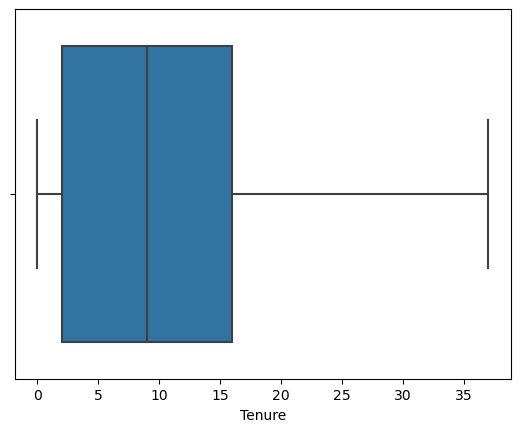

In [189]:
sns.boxplot(x="Tenure", data = churn)

<AxesSubplot:xlabel='CC_Contacted_LY'>

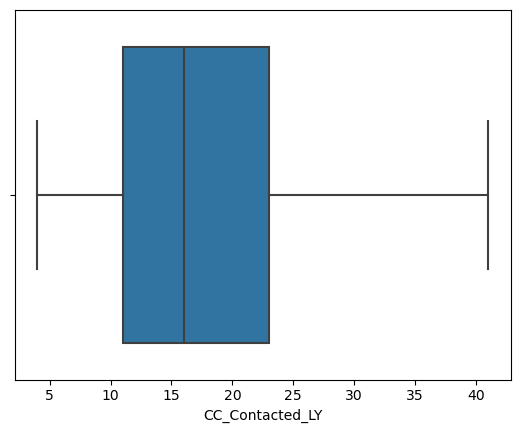

In [190]:
sns.boxplot(x="CC_Contacted_LY", data = churn)

<AxesSubplot:xlabel='Account_user_count'>

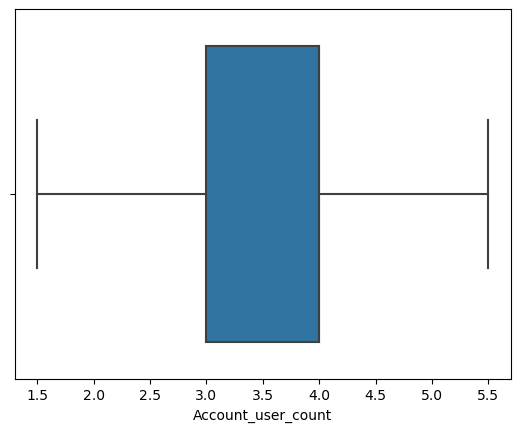

In [191]:
sns.boxplot(x="Account_user_count", data = churn)

<AxesSubplot:xlabel='rev_per_month'>

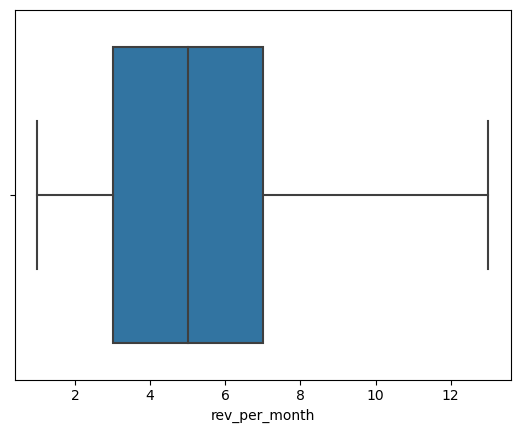

In [192]:
sns.boxplot(x="rev_per_month", data = churn)

<AxesSubplot:xlabel='rev_growth_yoy'>

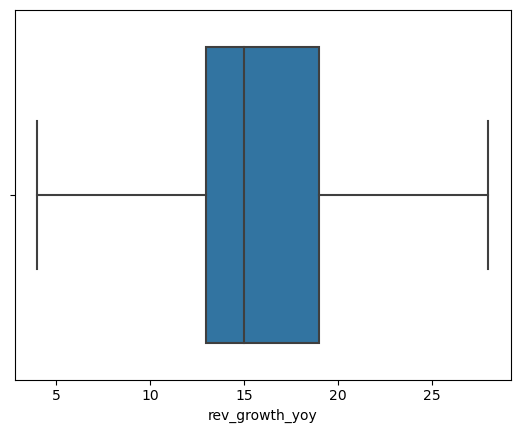

In [193]:
sns.boxplot(x="rev_growth_yoy", data = churn)

<AxesSubplot:xlabel='coupon_used_for_payment'>

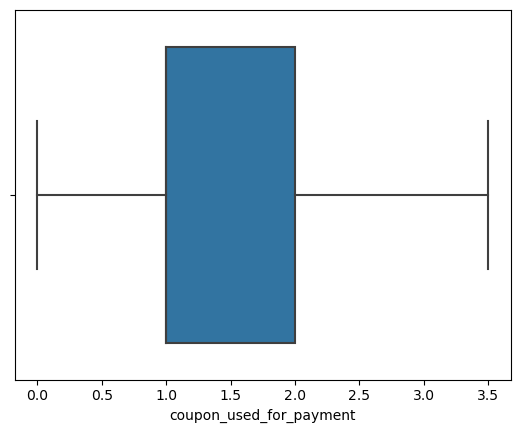

In [194]:
sns.boxplot(x="coupon_used_for_payment", data = churn)

<AxesSubplot:xlabel='Day_Since_CC_connect'>

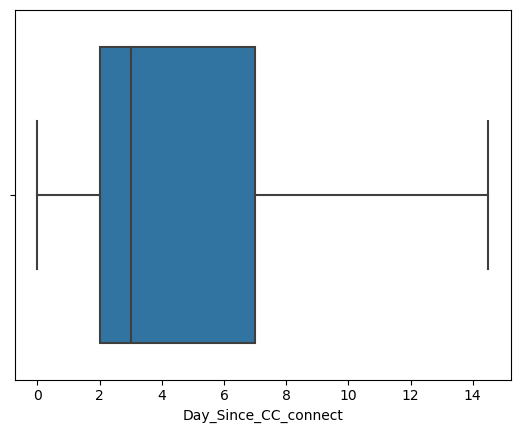

In [195]:
sns.boxplot(x="Day_Since_CC_connect", data = churn)

<AxesSubplot:xlabel='cashback'>

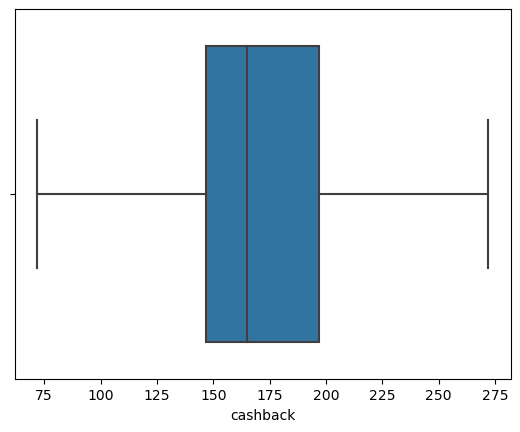

In [196]:
sns.boxplot(x="cashback", data = churn)

# Scaling data

In [197]:
from sklearn.preprocessing import MinMaxScaler

churn['Scaled_Churn'] = MinMaxScaler().fit_transform(churn[['Churn']])
churn['Scaled_Tenure'] = MinMaxScaler().fit_transform(churn[['Tenure']])
churn['Scaled_City_Tier'] = MinMaxScaler().fit_transform(churn[['City_Tier']])
churn['Scaled_CC_Contacted_LY'] = MinMaxScaler().fit_transform(churn[['CC_Contacted_LY']])
churn['Scaled_Payment'] = MinMaxScaler().fit_transform(churn[['Payment']])
churn['Scaled_Gender'] = MinMaxScaler().fit_transform(churn[['Gender']])
churn['Scaled_Service_Score'] = MinMaxScaler().fit_transform(churn[['Service_Score']])
churn['Scaled_Account_user_count'] = MinMaxScaler().fit_transform(churn[['Account_user_count']])
churn['Scaled_account_segment'] = MinMaxScaler().fit_transform(churn[['account_segment']])
churn['Scaled_CC_Agent_Score'] = MinMaxScaler().fit_transform(churn[['CC_Agent_Score']])
churn['Scaled_Marital_Status'] = MinMaxScaler().fit_transform(churn[['Marital_Status']])
churn['Scaled_rev_per_month'] = MinMaxScaler().fit_transform(churn[['rev_per_month']])
churn['Scaled_Complain_ly'] = MinMaxScaler().fit_transform(churn[['Complain_ly']])
churn['Scaled_rev_growth_yoy'] = MinMaxScaler().fit_transform(churn[['rev_growth_yoy']])
churn['Scaled_coupon_used_for_payment'] = MinMaxScaler().fit_transform(churn[['coupon_used_for_payment']])
churn['Scaled_Day_Since_CC_connect'] = MinMaxScaler().fit_transform(churn[['Day_Since_CC_connect']])
churn['Scaled_cashback'] = MinMaxScaler().fit_transform(churn[['cashback']])
churn['Scaled_Login_device'] = MinMaxScaler().fit_transform(churn[['Login_device']])

In [198]:
churn_scaled = pd.DataFrame({
'Churn': churn['Scaled_Churn'] ,    
'Tenure': churn['Scaled_Tenure'] ,    
'City_Tier': churn['Scaled_City_Tier'] ,    
'CC_Contacted_LY': churn['Scaled_CC_Contacted_LY'] ,    
'Payment': churn['Scaled_Payment'] ,    
'Gender': churn['Scaled_Gender'] ,    
'Service_Score': churn['Scaled_Service_Score'] ,    
'Account_user_count': churn['Scaled_Account_user_count'] ,    
'account_segment': churn['Scaled_account_segment'] ,    
'CC_Agent_Score': churn['Scaled_CC_Agent_Score'] ,    
'Marital_Status': churn['Scaled_Marital_Status'] ,    
'rev_per_month': churn['Scaled_rev_per_month'] ,    
'Complain_ly': churn['Scaled_Complain_ly'] ,    
'rev_growth_yoy': churn['Scaled_rev_growth_yoy'] ,    
'coupon_used_for_payment': churn['Scaled_coupon_used_for_payment'] ,    
'Day_Since_CC_connect': churn['Scaled_Day_Since_CC_connect'] ,
'cashback': churn['Scaled_cashback'] ,    
'Login_device': churn['Scaled_Login_device'] })
churn_scaled

Churn    Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
0        1.0  0.108108        1.0         0.054054     0.00     0.0   
1        1.0  0.000000        0.0         0.108108     0.25     1.0   
2        1.0  0.000000        0.0         0.702703     0.00     1.0   
3        1.0  0.000000        1.0         0.297297     0.00     1.0   
4        1.0  0.000000        0.0         0.216216     0.50     1.0   
...      ...       ...        ...              ...      ...     ...   
11255    0.0  0.270270        0.0         0.810811     0.50     1.0   
11256    0.0  0.351351        0.0         0.405405     0.50     1.0   
11257    0.0  0.027027        0.0         0.270270     0.00     1.0   
11258    0.0  0.621622        1.0         0.189189     0.50     1.0   
11259    0.0  0.216216        0.0         0.486486     0.50     1.0   

       Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
0                0.6               0.375             0.00            0.25   
1                0.6               0.625             0.25            0.50   
2                0.4               0.625             0.25            0.50   
3                0.4               0.625             0.00            1.00   
4                0.4               0.375             0.25            1.00   
...              ...                 ...              ...             ...   
11255            0.6               0.125             0.00            0.00   
11256            0.6               0.875             0.75            1.00   
11257            0.6               0.125             0.00            0.75   
11258            0.8               0.875             0.00            0.75   
11259            0.6               0.125             0.00            0.50   

       Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0                 0.0       0.666667          1.0        0.291667   
1                 0.0       0.500000          1.0        0.458333   
2                 0.0       0.416667          1.0        0.416667   
3                 0.0       0.583333          0.0        0.791667   
4                 0.0       0.166667          0.0        0.291667   
...               ...            ...          ...             ...   
11255             1.0       0.666667          0.0        0.625000   
11256             1.0       0.500000          0.0        0.500000   
11257             1.0       0.500000          1.0        0.750000   
11258             1.0       0.500000          0.0        0.500000   
11259             1.0       0.333333          0.0        0.375000   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  
0                     0.285714              0.344828     0.435           0.0  
1                     0.000000              0.000000     0.240           0.0  
2                     0.000000              0.206897     0.465           0.0  
3                     0.000000              0.206897     0.310           0.0  
4                     0.285714              0.206897     0.285           0.0  
...                        ...                   ...       ...           ...  
11255                 0.285714              0.275862     0.405           1.0  
11256                 0.285714              0.551724     0.770           0.0  
11257                 0.285714              0.275862     0.595           0.0  
11258                 0.571429              0.620690     0.535           1.0  
11259                 0.571429              0.206897     0.515           0.0  

[11260 rows x 18 columns]

In [199]:
print(churn_scaled.std())

Churn                      0.374223
Tenure                     0.240241
City_Tier                  0.456381
CC_Contacted_LY            0.231463
Payment                    0.344845
Gender                     0.488878
Service_Score              0.144495
Account_user_count         0.231069
account_segment            0.316751
CC_Agent_Score             0.343166
Marital_Status             0.447373
rev_per_month              0.239968
Complain_ly                0.447181
rev_growth_yoy             0.156553
coupon_used_for_payment    0.314928
Day_Since_CC_connect       0.240931
cashback                   0.218847
Login_device               0.442952
dtype: float64


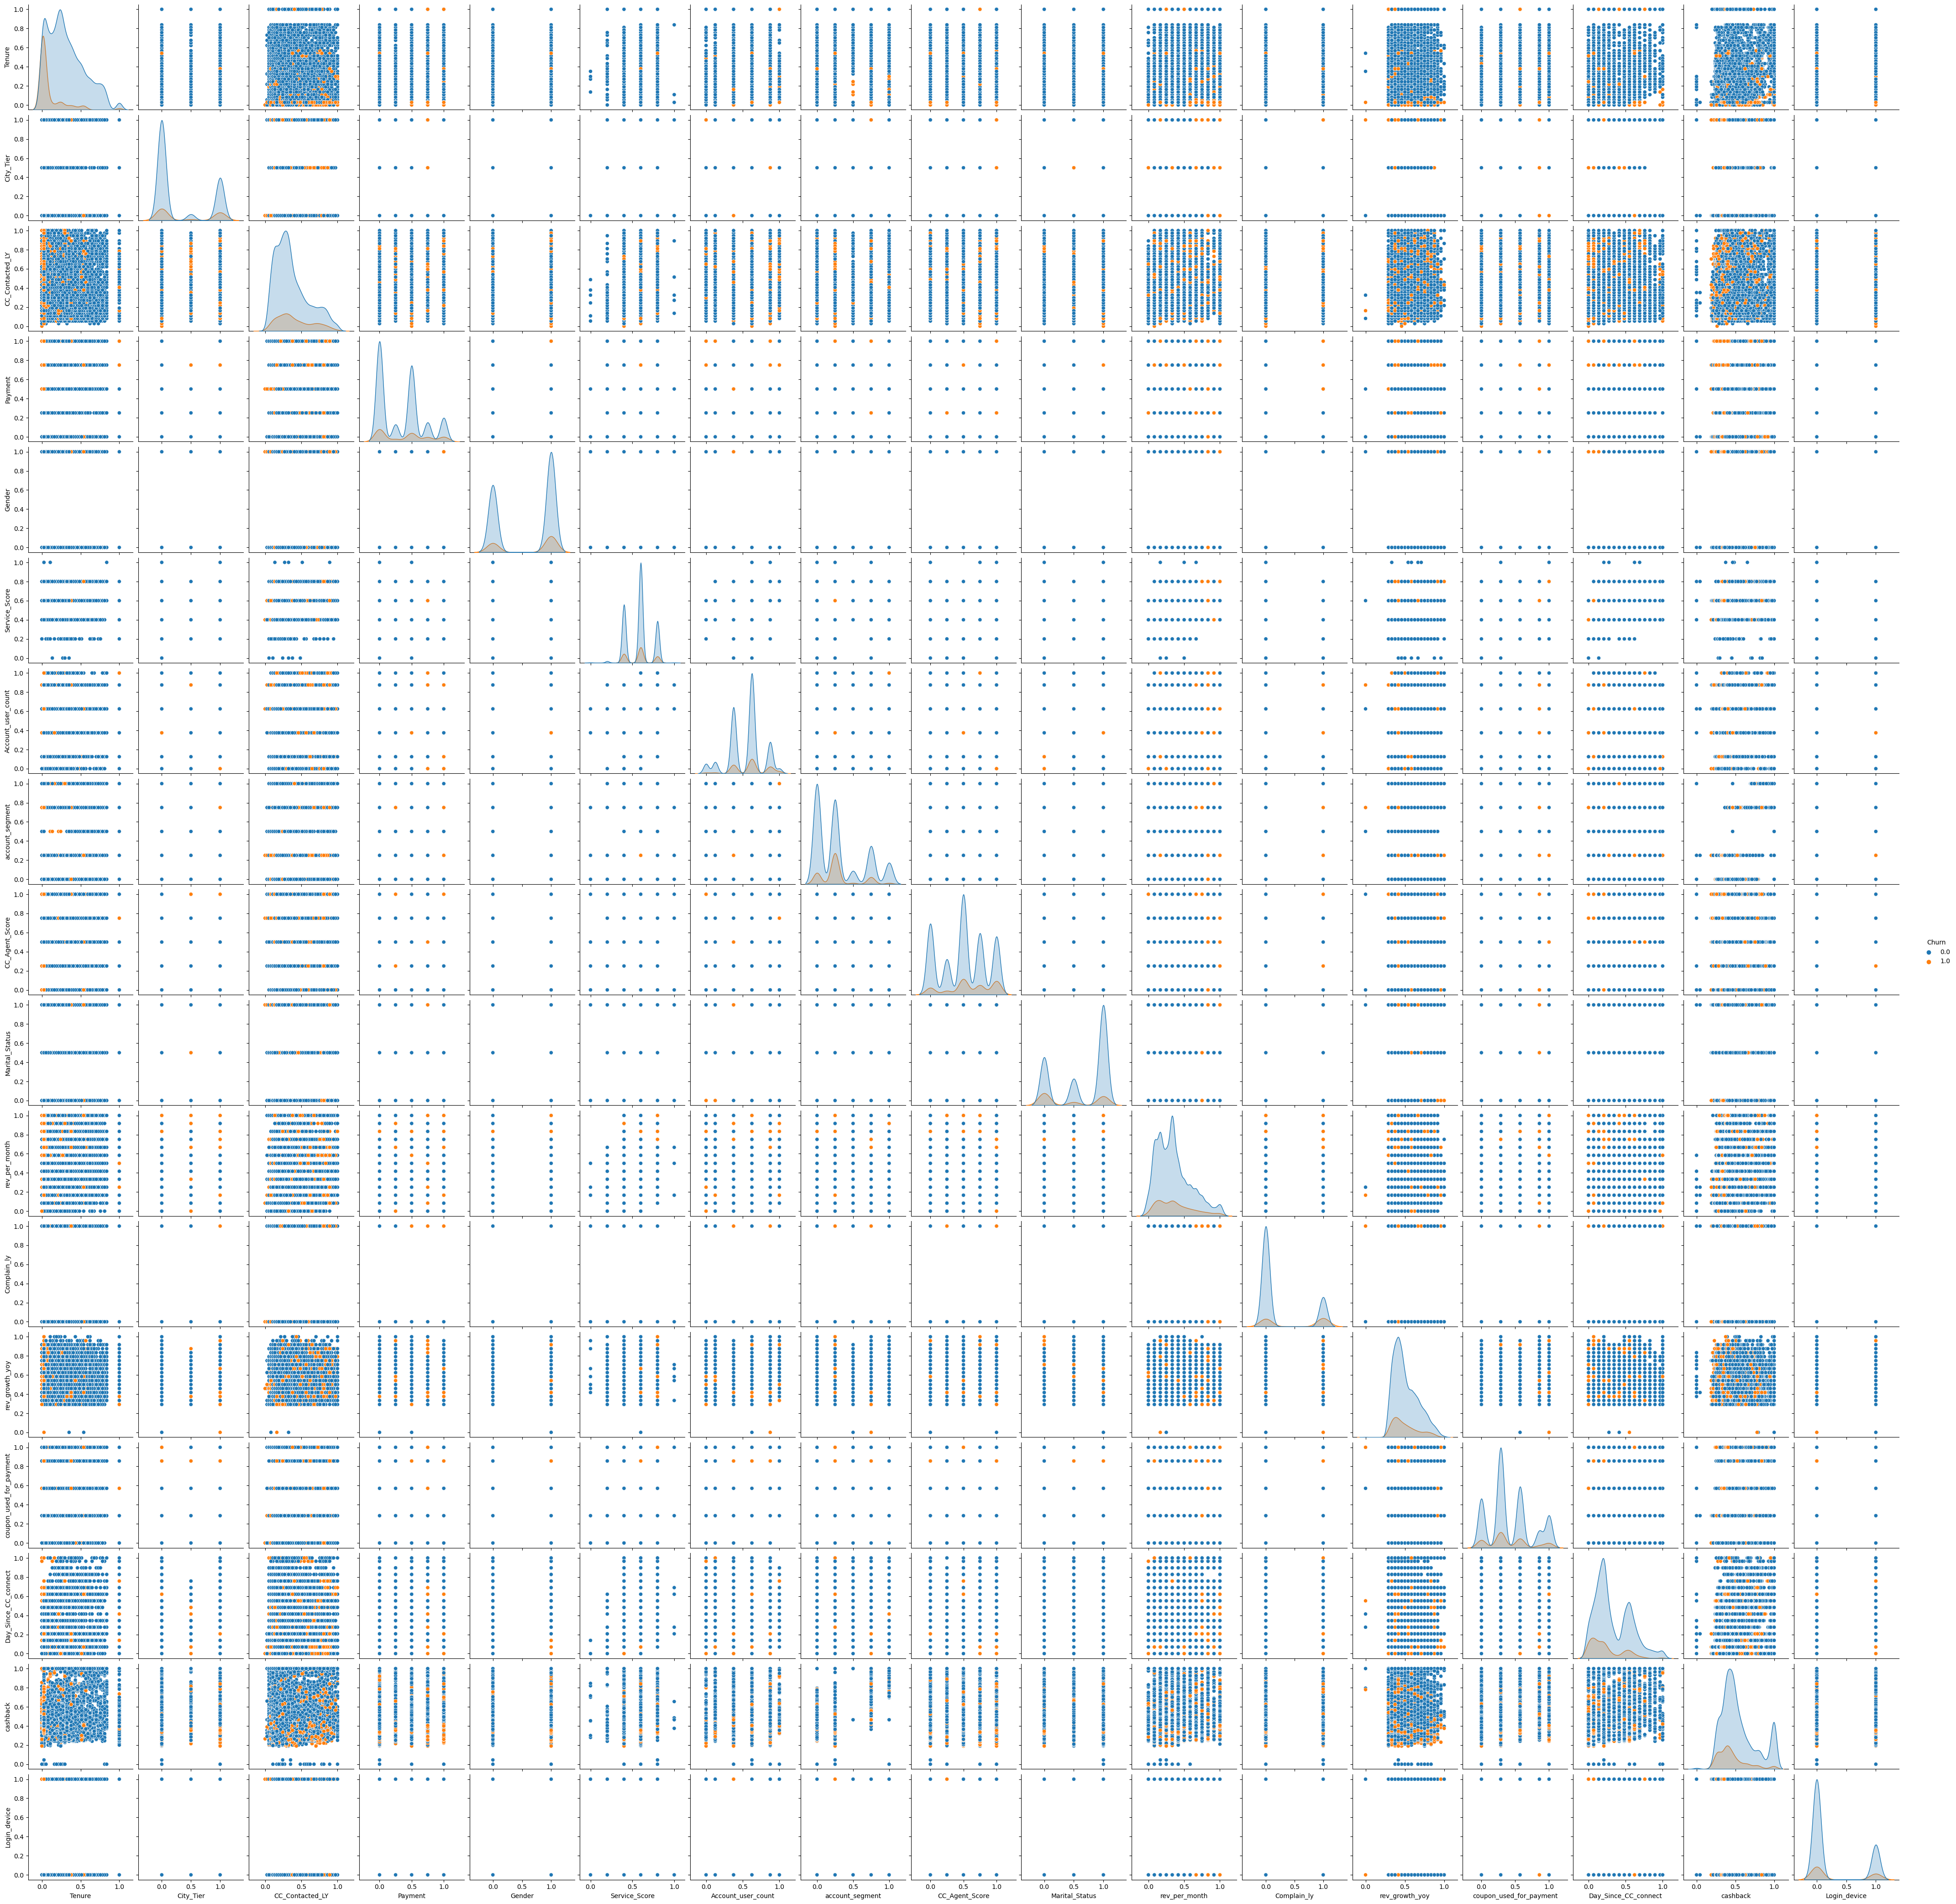

In [200]:
# plotting sns plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# pair plot to check on data distribution and co-linearity
sns.pairplot(churn_scaled, hue = 'Churn', diag_kind='kde')  
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


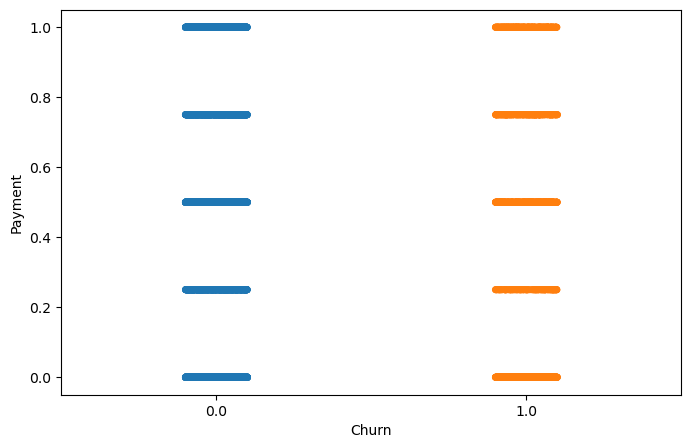

In [201]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['Payment'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


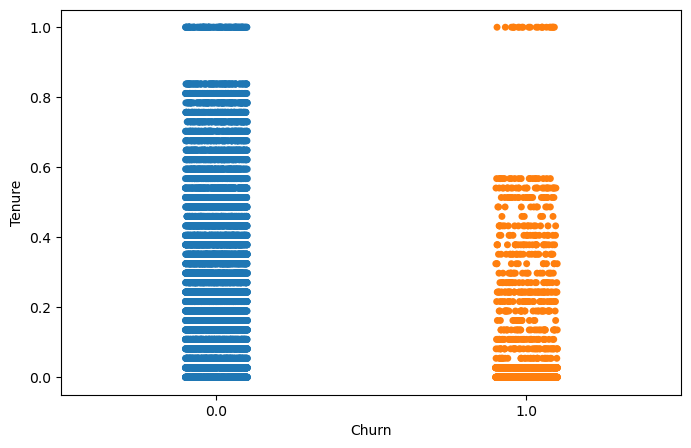

In [202]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['Tenure'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


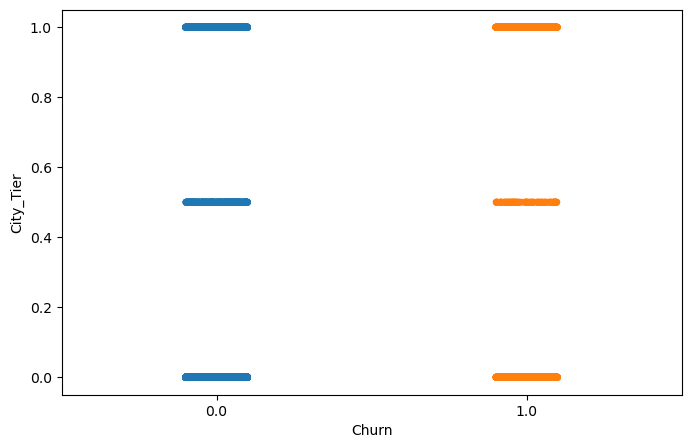

In [203]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['City_Tier'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


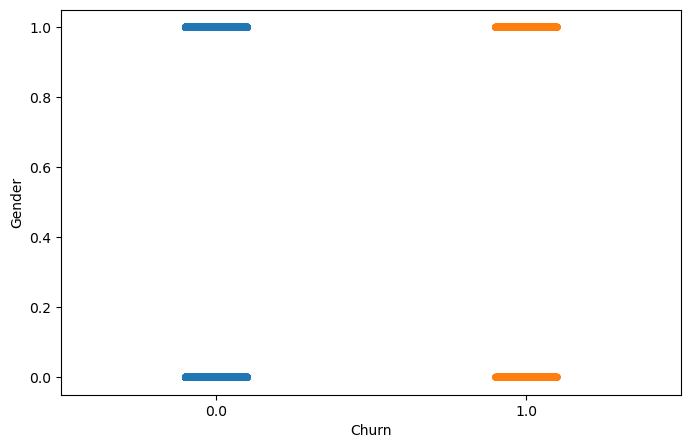

In [204]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['Gender'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


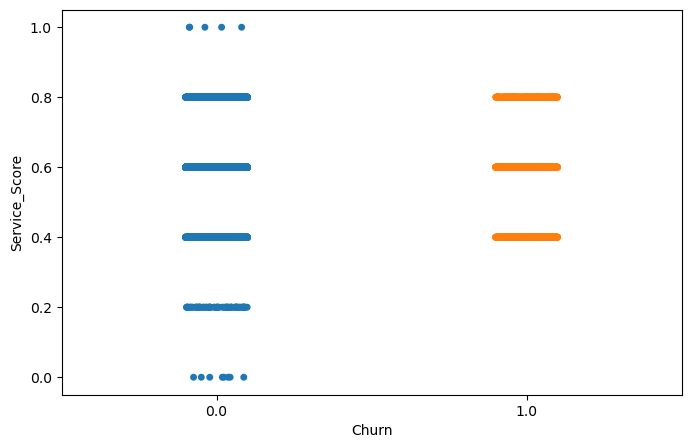

In [205]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['Service_Score'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


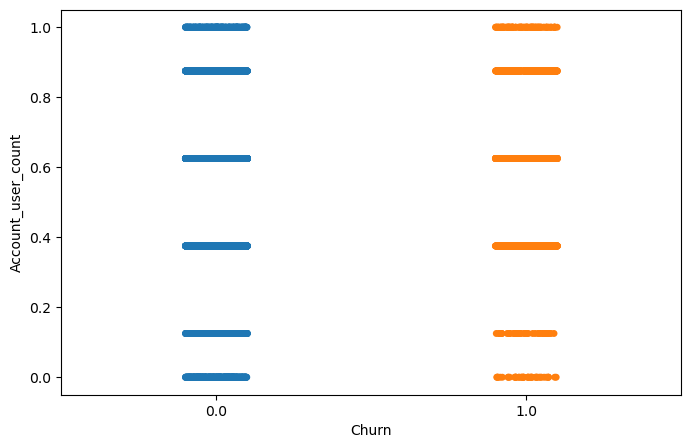

In [206]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['Account_user_count'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


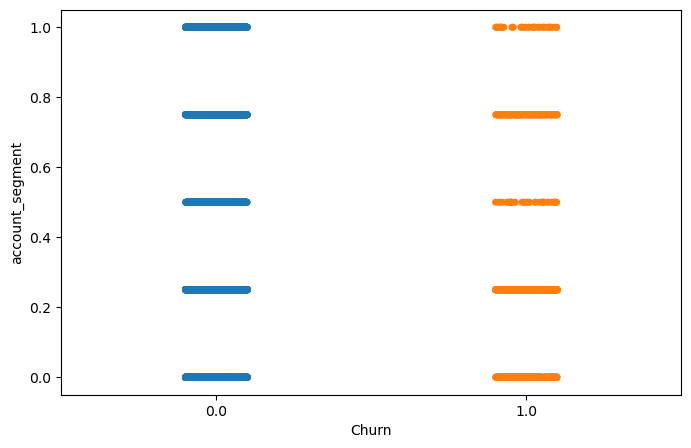

In [207]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['account_segment'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


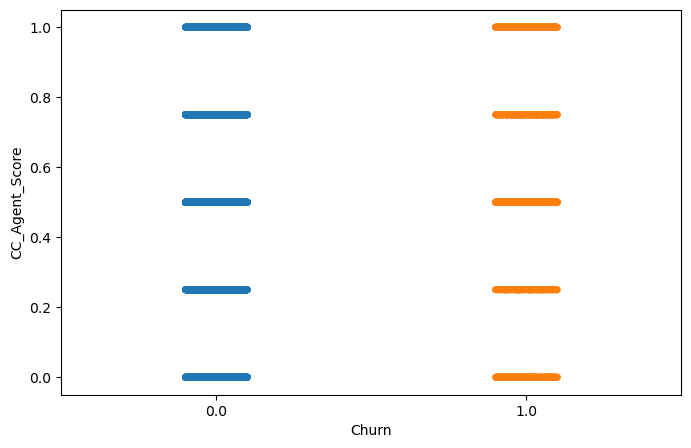

In [208]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['CC_Agent_Score'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


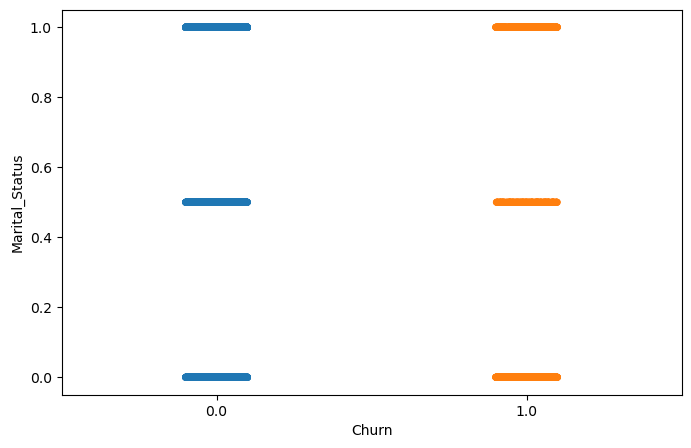

In [209]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['Marital_Status'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


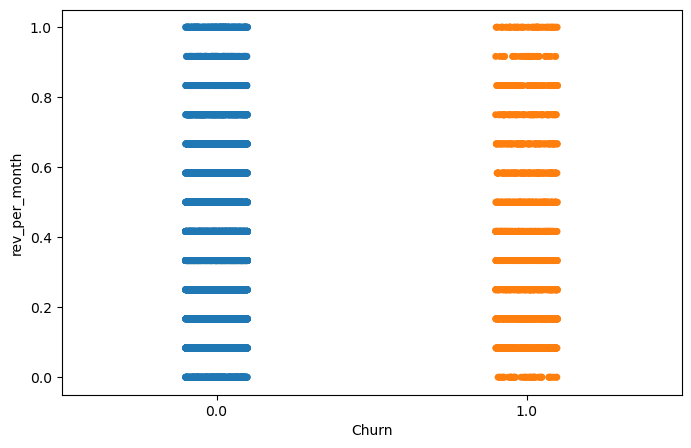

In [210]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['rev_per_month'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


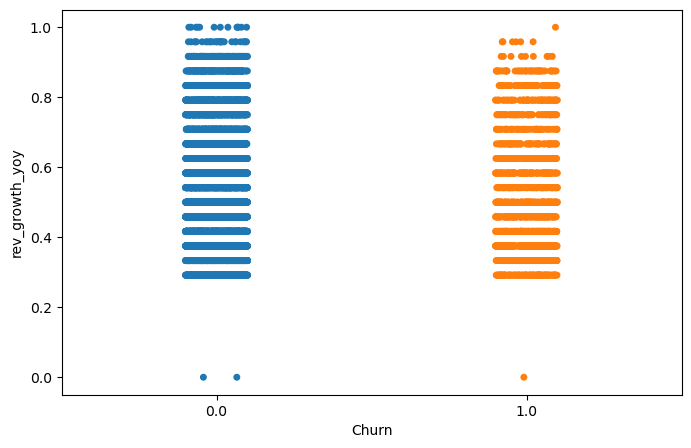

In [211]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['rev_growth_yoy'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


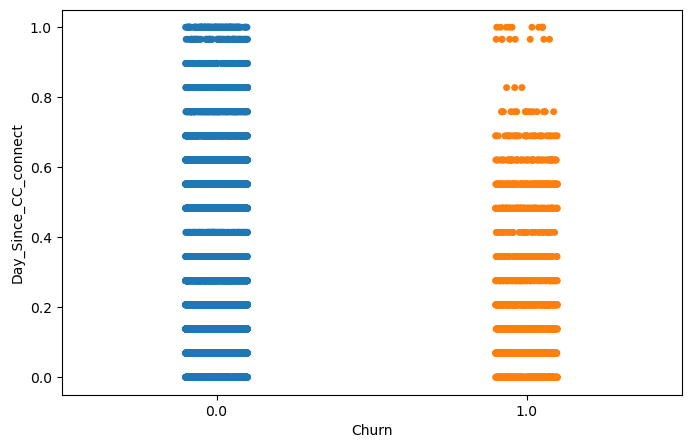

In [212]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['Day_Since_CC_connect'], jitter=True) 
plt.show()

C:\Users\Deepak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


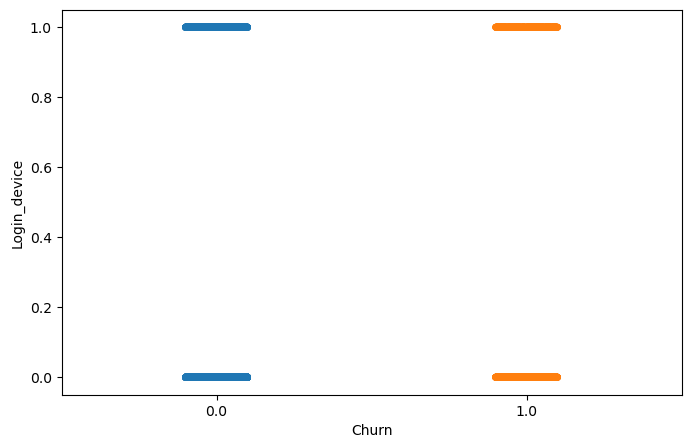

In [213]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_scaled["Churn"], churn_scaled['Login_device'], jitter=True) 
plt.show()

In [214]:
churn_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  float64
 5   Gender                   11260 non-null  float64
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  float64
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  float64
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [215]:
churn_scaled['Payment'] = churn_scaled['Payment'].astype('int64')
churn_scaled['Gender'] = churn_scaled['Gender'].astype('int64')
churn_scaled['Service_Score'] = churn_scaled['Service_Score'].astype('int64')
churn_scaled['Account_user_count'] = churn_scaled['Account_user_count'].astype('int64')
churn_scaled['account_segment'] = churn_scaled['account_segment'].astype('int64')
churn_scaled['CC_Agent_Score'] = churn_scaled['CC_Agent_Score'].astype('int64')
churn_scaled['rev_per_month'] = churn_scaled['rev_per_month'].astype('int64')
churn_scaled['coupon_used_for_payment'] = churn_scaled['coupon_used_for_payment'].astype('int64')
churn_scaled['Day_Since_CC_connect'] = churn_scaled['Day_Since_CC_connect'].astype('int64')
churn_scaled['cashback'] = churn_scaled['cashback'].astype('int64')
churn_scaled['Marital_Status'] = churn_scaled['Marital_Status'].astype('int64')
churn_scaled['Complain_ly'] = churn_scaled['Complain_ly'].astype('int64')
churn_scaled['rev_growth_yoy'] = churn_scaled['rev_growth_yoy'].astype('int64')
churn_scaled['Login_device'] = churn_scaled['Login_device'].astype('int64')
#churn_scaled['Churn'] = churn_scaled['Churn'].astype('int64')
churn_scaled['Tenure'] = churn_scaled['Tenure'].astype('int64')
churn_scaled['City_Tier'] = churn_scaled['City_Tier'].astype('int64')
churn_scaled['CC_Contacted_LY'] = churn_scaled['CC_Contacted_LY'].astype('int64')

In [216]:
churn_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  int64  
 2   City_Tier                11260 non-null  int64  
 3   CC_Contacted_LY          11260 non-null  int64  
 4   Payment                  11260 non-null  int64  
 5   Gender                   11260 non-null  int64  
 6   Service_Score            11260 non-null  int64  
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  int64  
 9   CC_Agent_Score           11260 non-null  int64  
 10  Marital_Status           11260 non-null  int64  
 11  rev_per_month            11260 non-null  int64  
 12  Complain_ly              11260 non-null  int64  
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

# Splitting data into train and test data set

In [217]:
# splitting data into independent and dependent variables
X = churn_scaled.drop('Churn' , axis=1)

y = churn_scaled.pop("Churn")

In [218]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [219]:
#checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7882, 17)
X_test (3378, 17)
y_train (7882,)
y_test (3378,)


In [220]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [221]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=1)
counter=Counter(y)
counter

Counter({0: 975, 1: 25})

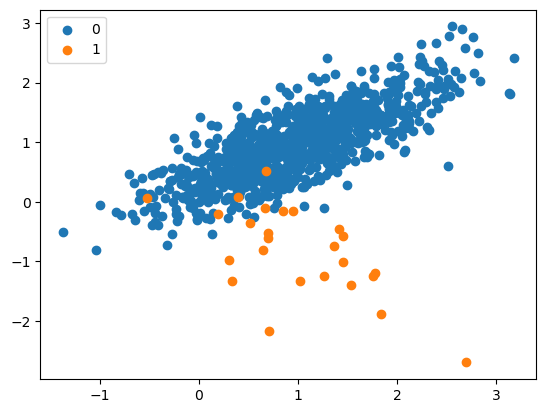

In [222]:
from collections import Counter
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# Performing SMOTE to balance data

In [223]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [224]:
# applying smote to train dataset and resampling
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [225]:
#checking the dimentsions of training and test data
print('X_train_res',X_train_res.shape)
#print('X_test',X_test.shape)
print('y_train_res',y_train_res.shape)
#print('y_test',y_test.shape)

X_train_res (13112, 17)
y_train_res (13112,)


In [226]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [227]:
counter=Counter(y)
counter

Counter({0: 975, 1: 975})

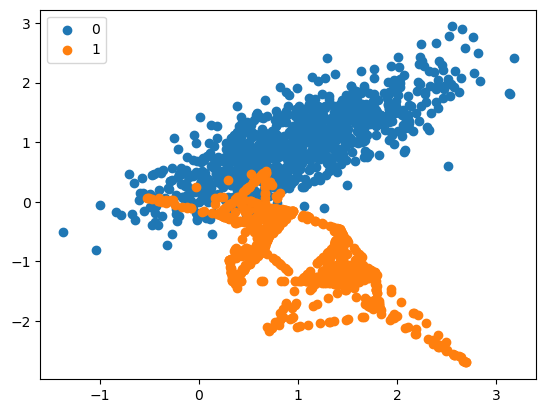

In [228]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(churn_scaled)
    wss.append(KM.inertia_)

In [231]:
wss

[18663.90825932505,
 15981.519809020085,
 14244.76715984956,
 13197.272757979452,
 12320.613520380844,
 11253.507110418526,
 10975.074529479587,
 10417.20712153426,
 10166.111554126008,
 9738.60181068757]

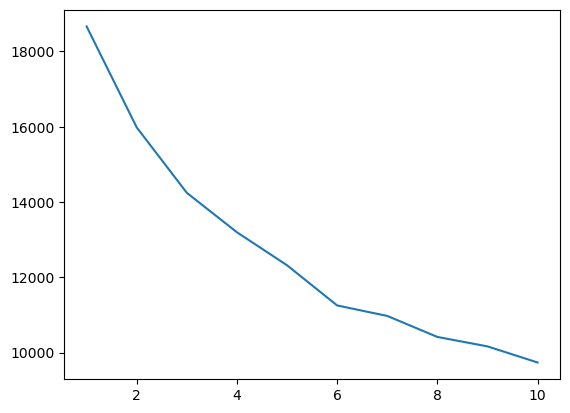

In [232]:
plt.plot(range(1,11), wss)

In [233]:
k_means = KMeans(n_clusters = 3)
k_means.fit(churn_scaled)
labels = k_means.labels_

In [234]:
churn_scaled["Clus_kmeans"] = labels
churn_scaled.head(5)

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0       0          1                0        0       0              0   
1       0          0                0        0       1              0   
2       0          0                0        0       1              0   
3       0          1                0        0       1              0   
4       0          0                0        0       1              0   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0                   0                0               0               0   
1                   0                0               0               0   
2                   0                0               0               0   
3                   0                0               1               0   
4                   0                0               1               0   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0              0            1               0                        0   
1              0            1               0                        0   
2              0            1               0                        0   
3              0            0               0                        0   
4              0            0               0                        0   

   Day_Since_CC_connect  cashback  Login_device  Clus_kmeans  
0                     0         0             0            1  
1                     0         0             0            2  
2                     0         0             0            2  
3                     0         0             0            2  
4                     0         0             0            2

In [235]:
churn_scaled.groupby(["Clus_kmeans"]).count()

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
Clus_kmeans                                                        
0              3781       3781             3781     3781    3781   
1              4448       4448             4448     4448    4448   
2              3031       3031             3031     3031    3031   

             Service_Score  Account_user_count  account_segment  \
Clus_kmeans                                                       
0                     3781                3781             3781   
1                     4448                4448             4448   
2                     3031                3031             3031   

             CC_Agent_Score  Marital_Status  rev_per_month  Complain_ly  \
Clus_kmeans                                                               
0                      3781            3781           3781         3781   
1                      4448            4448           4448         4448   
2                      3031            3031           3031         3031   

             rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
Clus_kmeans                                                                  
0                      3781                     3781                  3781   
1                      4448                     4448                  4448   
2                      3031                     3031                  3031   

             cashback  Login_device  
Clus_kmeans                          
0                3781          3781  
1                4448          4448  
2                3031          3031

In [236]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 7580 to 235
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   7882 non-null   int64
 1   City_Tier                7882 non-null   int64
 2   CC_Contacted_LY          7882 non-null   int64
 3   Payment                  7882 non-null   int64
 4   Gender                   7882 non-null   int64
 5   Service_Score            7882 non-null   int64
 6   Account_user_count       7882 non-null   int64
 7   account_segment          7882 non-null   int64
 8   CC_Agent_Score           7882 non-null   int64
 9   Marital_Status           7882 non-null   int64
 10  rev_per_month            7882 non-null   int64
 11  Complain_ly              7882 non-null   int64
 12  rev_growth_yoy           7882 non-null   int64
 13  coupon_used_for_payment  7882 non-null   int64
 14  Day_Since_CC_connect     7882 non-null   int64
 15  ca

In [237]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 784 to 9559
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   3378 non-null   int64
 1   City_Tier                3378 non-null   int64
 2   CC_Contacted_LY          3378 non-null   int64
 3   Payment                  3378 non-null   int64
 4   Gender                   3378 non-null   int64
 5   Service_Score            3378 non-null   int64
 6   Account_user_count       3378 non-null   int64
 7   account_segment          3378 non-null   int64
 8   CC_Agent_Score           3378 non-null   int64
 9   Marital_Status           3378 non-null   int64
 10  rev_per_month            3378 non-null   int64
 11  Complain_ly              3378 non-null   int64
 12  rev_growth_yoy           3378 non-null   int64
 13  coupon_used_for_payment  3378 non-null   int64
 14  Day_Since_CC_connect     3378 non-null   int64
 15  ca

In [238]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13112 entries, 0 to 13111
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   13112 non-null  int64
 1   City_Tier                13112 non-null  int64
 2   CC_Contacted_LY          13112 non-null  int64
 3   Payment                  13112 non-null  int64
 4   Gender                   13112 non-null  int64
 5   Service_Score            13112 non-null  int64
 6   Account_user_count       13112 non-null  int64
 7   account_segment          13112 non-null  int64
 8   CC_Agent_Score           13112 non-null  int64
 9   Marital_Status           13112 non-null  int64
 10  rev_per_month            13112 non-null  int64
 11  Complain_ly              13112 non-null  int64
 12  rev_growth_yoy           13112 non-null  int64
 13  coupon_used_for_payment  13112 non-null  int64
 14  Day_Since_CC_connect     13112 non-null  int64
 15  ca

# Building Logistic Regression Model

In [239]:
# building Logistic regression model
# Fit the model on original data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Fit the Logistic Regression model
lg = LogisticRegression(random_state=1)
lg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [240]:
# predict on train and test data set
ytrain_predict_lg = lg.predict(X_train) # can compare with y_train
ytest_predict_lg = lg.predict(X_test) # can compare with y_test

In [241]:
#Accuracy - Training Data
print("Accuracy of training dataset:",lg.score(X_train, y_train))

Accuracy of training dataset: 0.8391271250951535


In [242]:
# Accuracy - Test Data
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of testing dataset: 0.8398460627590291


In [243]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
# confusion matrix for train data set
print("Confusion Matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_lg)

Confusion Matrix for train dataset


array([[6466,   90],
       [1178,  148]], dtype=int64)

In [244]:
# confusion matrix for test data set
print("Confusion Matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lg)

Confusion Matrix for test dataset


array([[2764,   44],
       [ 497,   73]], dtype=int64)

In [245]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [246]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_lg))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      6556
         1.0       0.62      0.11      0.19      1326

    accuracy                           0.84      7882
   macro avg       0.73      0.55      0.55      7882
weighted avg       0.81      0.84      0.79      7882



In [247]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lg))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.62      0.13      0.21       570

    accuracy                           0.84      3378
   macro avg       0.74      0.56      0.56      3378
weighted avg       0.81      0.84      0.79      3378



AUC score and ROC curve for training dataset
AUC: 0.750


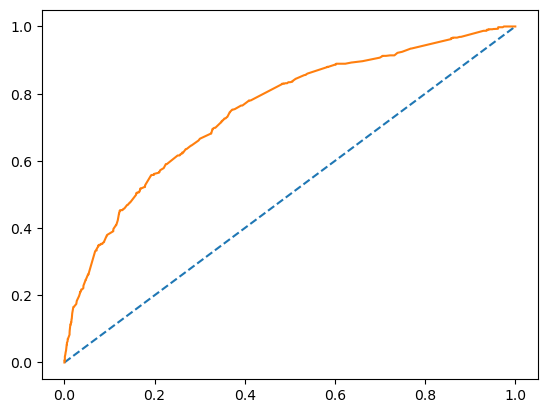

In [248]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.750


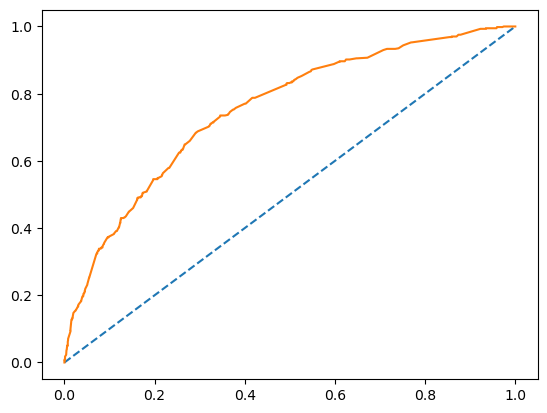

In [249]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [250]:
from sklearn.model_selection import cross_val_score
print("cross validation scroes for traning dataset")
scores_lg_train = cross_val_score(lg, X_train, y_train, cv=10)
scores_lg_train

cross validation scroes for traning dataset


array([0.8365019 , 0.84030418, 0.84517766, 0.84010152, 0.83883249,
       0.84390863, 0.83629442, 0.8286802 , 0.83502538, 0.84010152])

In [251]:
print("cross calidation scores for testing dataset")
scores_lg_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lg_test

cross calidation scores for testing dataset


array([0.82544379, 0.83727811, 0.83727811, 0.84615385, 0.84319527,
       0.82840237, 0.83727811, 0.83727811, 0.83679525, 0.83679525])

# HYPERPARAMETER TUNING

In [252]:
# loading GridSearchCV and creating dataframe for parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['lbfgs','newton-cg', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1','l2','none'],
    'tol':[0.0001,0.00001]
}

grid_search = GridSearchCV(estimator = lg, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [253]:
# fitting grid search into traing dataset
grid_search.fit(X_train, y_train)

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [254]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001}

In [255]:
# getting best estimators
best_grid = grid_search.best_estimator_

In [256]:
# predicting training and testing dataset
ytrain_predict_lgcv = best_grid.predict(X_train)
ytest_predict_lgcv = best_grid.predict(X_test)

In [257]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8392539964476021


In [258]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8398460627590291


In [259]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_lgcv))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      6556
         1.0       0.62      0.12      0.20      1326

    accuracy                           0.84      7882
   macro avg       0.73      0.55      0.55      7882
weighted avg       0.81      0.84      0.79      7882



In [260]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lgcv))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.62      0.13      0.21       570

    accuracy                           0.84      3378
   macro avg       0.74      0.56      0.56      3378
weighted avg       0.81      0.84      0.79      3378



In [261]:
# confusion matrix of train dataset
print("confusion matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_lgcv)

confusion matrix for train dataset


array([[6461,   95],
       [1172,  154]], dtype=int64)

In [262]:
# confusion matrix of train dataset
print("confusion matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lgcv)

confusion matrix for test dataset


array([[2764,   44],
       [ 497,   73]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.750


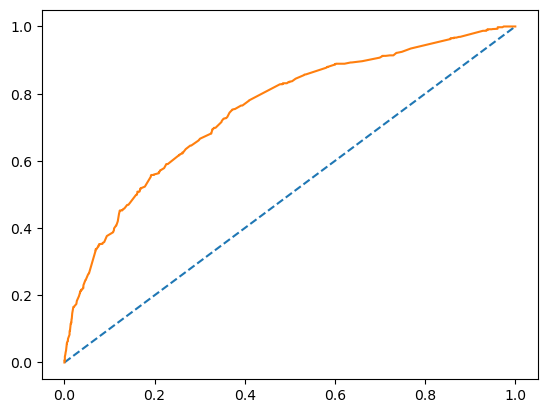

In [263]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.752


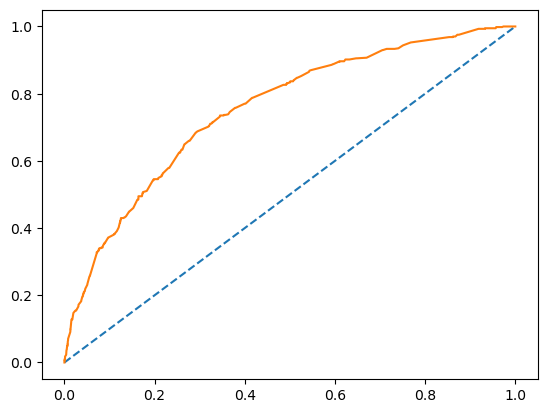

In [264]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [265]:
print("cross validation score for training dataset")
scores_lgcv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_lgcv_train

cross validation score for training dataset


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.8365019 , 0.84030418, 0.84517766, 0.84137056, 0.83883249,
       0.84390863, 0.83629442, 0.8286802 , 0.83375635, 0.84137056])

In [266]:
print("cross calidation score for testing dataset")
scores_lgcv_test = cross_val_score(best_grid, X_test, y_test, cv=10)
scores_lgcv_test

cross calidation score for testing dataset


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.82248521, 0.83727811, 0.83431953, 0.84319527, 0.84615385,
       0.82840237, 0.84023669, 0.83727811, 0.83679525, 0.83976261])

# Building Logistic regression model using SMOTE

In [267]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [268]:
#fitting model into training dataset
lg.fit(X_train_res, y_train_res)

LogisticRegression(random_state=1)

In [269]:
# predict on train and test data set with balanced dataset
ytrain_predict_lgsm = lg.predict(X_train_res) # can compare with y_train
ytest_predict_lgsm = lg.predict(X_test) # can compare with y_test

In [270]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",lg.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.6821995118974985


In [271]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of testing dataset: 0.6767317939609236


In [272]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_lgsm))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68      6556
         1.0       0.68      0.70      0.69      6556

    accuracy                           0.68     13112
   macro avg       0.68      0.68      0.68     13112
weighted avg       0.68      0.68      0.68     13112



In [273]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lgsm))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.92      0.67      0.77      2808
         1.0       0.30      0.71      0.43       570

    accuracy                           0.68      3378
   macro avg       0.61      0.69      0.60      3378
weighted avg       0.82      0.68      0.72      3378



In [274]:
# confusion matrix for train dataset
print("Confusion matrix for train dataset")
confusion_matrix(y_train_res, ytrain_predict_lgsm)

Confusion matrix for train dataset


array([[4369, 2187],
       [1980, 4576]], dtype=int64)

In [275]:
# confusion matrix for test dataset
print("Confusion matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lgsm)

Confusion matrix for test dataset


array([[1880,  928],
       [ 164,  406]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.751


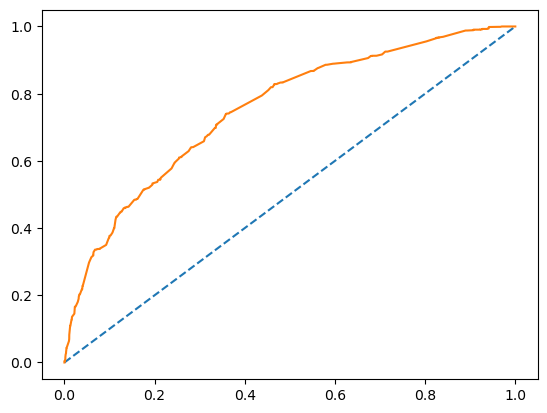

In [276]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.748


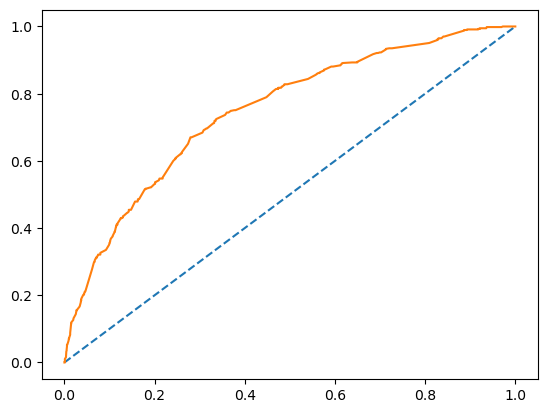

In [277]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [278]:
print("cross validation score for balanced training dataset")
scores_lgsm_train = cross_val_score(lg, X_train_res, y_train_res, cv=10)
scores_lgsm_train

cross validation score for balanced training dataset


array([0.67606707, 0.66920732, 0.68115942, 0.68115942, 0.668955  ,
       0.70633105, 0.6590389 , 0.68421053, 0.68954996, 0.70022883])

In [279]:
print("cross validation score for testing dataset")
scores_lgsm_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lgsm_test

cross validation score for testing dataset


array([0.82544379, 0.83727811, 0.83727811, 0.84615385, 0.84319527,
       0.82840237, 0.83727811, 0.83727811, 0.83679525, 0.83679525])

# Building Linear Discriminant Analysis Model (LDA)

In [280]:
#building Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [281]:
# fitting LDA model into training dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda

LinearDiscriminantAnalysis()

In [282]:
# Training Data Class Prediction
ytrain_predict_lda = lda.predict(X_train)

# Test Data Class Prediction
ytest_predict_lda = lda.predict(X_test)

In [283]:
#Accuracy - Training dataset
print("Accuracy score of training dataset:",lda.score(X_train, y_train))

Accuracy score of training dataset: 0.8421720375539203


In [284]:
# Accuracy - Test Data
print("Accuracy score of testing dataset:",lda.score(X_test, y_test))

Accuracy score of testing dataset: 0.8362936648904677


In [285]:
print("Confusion matrix of training dataset")
confusion_matrix(y_train, ytrain_predict_lda)

Confusion matrix of training dataset


array([[6413,  143],
       [1101,  225]], dtype=int64)

In [286]:
print("Confusion matrix of testing dataset")
confusion_matrix(y_test, ytest_predict_lda)

Confusion matrix of testing dataset


array([[2738,   70],
       [ 483,   87]], dtype=int64)

In [287]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [288]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      6556
         1.0       0.61      0.17      0.27      1326

    accuracy                           0.84      7882
   macro avg       0.73      0.57      0.59      7882
weighted avg       0.81      0.84      0.80      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.55      0.15      0.24       570

    accuracy                           0.84      3378
   macro avg       0.70      0.56      0.57      3378
weighted avg       0.80      0.84      0.80      3378
 



AUC score and ROC curve for training dataset
AUC: 0.748


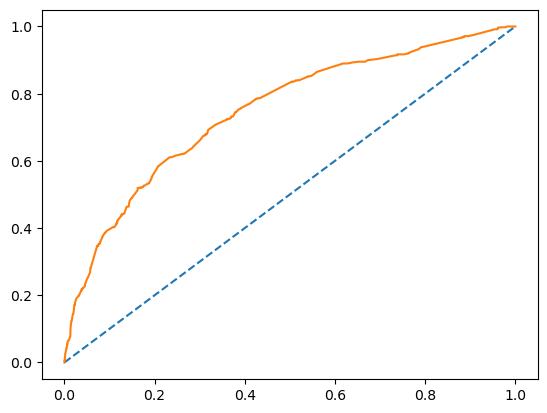

In [289]:
#creating ROC curve and getting AUC score for train data set
#predict probabilities
probs1 = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
train_auc1 = roc_auc_score(y_train, probs1)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr1, train_tpr1, train_thresholds1 = roc_curve(y_train, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr1, train_tpr1);

AUC score and ROC curve for testing dataset
AUC: 0.748


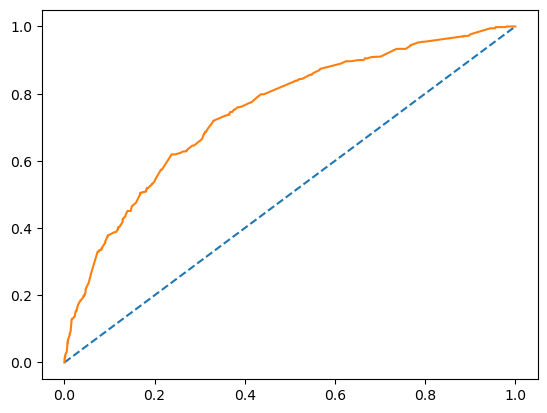

In [290]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs2 = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs2)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr2, test_tpr2, test_thresholds2 = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(test_fpr2, test_tpr2);

In [291]:
print("cross validation score for training dataset")
scores_lda_train = cross_val_score(lda, X_train, y_train, cv=10)
scores_lda_train

cross validation score for training dataset


array([0.83776933, 0.84157161, 0.84771574, 0.83375635, 0.83883249,
       0.84771574, 0.83629442, 0.82994924, 0.83629442, 0.85152284])

In [292]:
print("cross validation score for testing dataset")
scores_lda_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_lda_test

cross validation score for testing dataset


array([0.82840237, 0.83431953, 0.82840237, 0.84023669, 0.84615385,
       0.83136095, 0.84023669, 0.83431953, 0.83679525, 0.83086053])

# Building LDA model using GridSearchCV

In [293]:
# creating dataframe for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol' : [0.0001,0.0002,0.0003],
    'shrinkage' : ['auto', 'float', 'None'],
    
}

grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [294]:
# fitting model into training dataset
grid_search.fit(X_train, y_train)

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

--------------------------------------------------------------------------------
60 fits failed wit

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='f1')

In [295]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [296]:
# getting best estimators
best_grid = grid_search.best_estimator_

In [297]:
# predicting training and testing dataset
ytrain_predict_ldacv = best_grid.predict(X_train)
ytest_predict_ldacv = best_grid.predict(X_test)

In [298]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8416645521441258


In [299]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8354055654233274


In [300]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_ldacv))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      6556
         1.0       0.60      0.18      0.28      1326

    accuracy                           0.84      7882
   macro avg       0.73      0.58      0.59      7882
weighted avg       0.81      0.84      0.80      7882



In [301]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_ldacv))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      2808
         1.0       0.54      0.16      0.25       570

    accuracy                           0.84      3378
   macro avg       0.70      0.57      0.58      3378
weighted avg       0.80      0.84      0.80      3378



In [302]:
# confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, ytrain_predict_ldacv)

confusuon matrix for training dataset


array([[6394,  162],
       [1086,  240]], dtype=int64)

In [303]:
# confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_ldacv)

confusuon matrix for testing dataset


array([[2728,   80],
       [ 476,   94]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.748


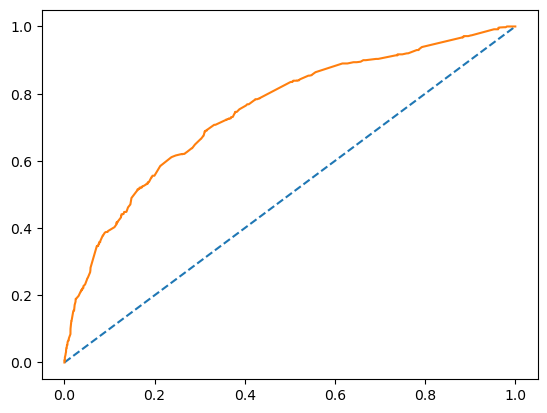

In [304]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.747


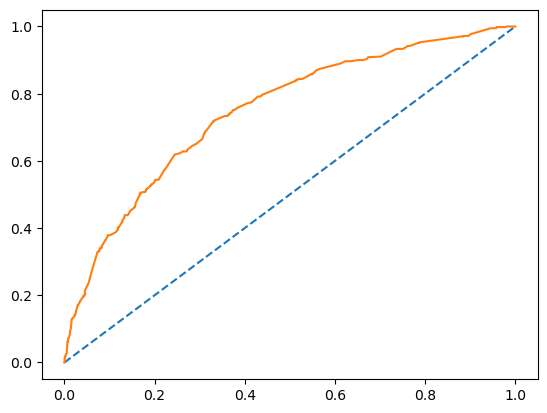

In [305]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [306]:
print("cross validation scores for training dataset")
scores_ldacv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_ldacv_train

cross validation scores for training dataset


array([0.83776933, 0.84157161, 0.84898477, 0.84010152, 0.83756345,
       0.85659898, 0.83883249, 0.8286802 , 0.83375635, 0.85152284])

In [307]:
print("cross validation scores from testing dataset")
scores_ldacv_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldacv_test

cross validation scores from testing dataset


array([0.82840237, 0.83431953, 0.82840237, 0.84023669, 0.84615385,
       0.83136095, 0.84023669, 0.83431953, 0.83679525, 0.83086053])

# Building LDA model using SMOTE

In [308]:
#fitting model into training dataset
lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [309]:
# predict on train and test data set with balanced dataset
ytrain_predict_ldasm = lda.predict(X_train_res) # can compare with y_train
ytest_predict_ldasm = lda.predict(X_test) # can compare with y_test

In [310]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",lda.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.6866229408175717


In [311]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",lda.score(X_test, y_test))

Accuracy of testing dataset: 0.6785079928952042


In [312]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_ldasm))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68      6556
         1.0       0.68      0.70      0.69      6556

    accuracy                           0.69     13112
   macro avg       0.69      0.69      0.69     13112
weighted avg       0.69      0.69      0.69     13112



In [313]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_ldasm))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.92      0.67      0.78      2808
         1.0       0.31      0.72      0.43       570

    accuracy                           0.68      3378
   macro avg       0.61      0.69      0.60      3378
weighted avg       0.82      0.68      0.72      3378



In [314]:
# confusion matrix for train dataset
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, ytrain_predict_ldasm)

confusion matrix for training dataset


array([[4397, 2159],
       [1950, 4606]], dtype=int64)

In [315]:
# confusion matrix for test dataset
print("confusion matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_ldasm)

confusion matrix for testing dataset


array([[1884,  924],
       [ 162,  408]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.752


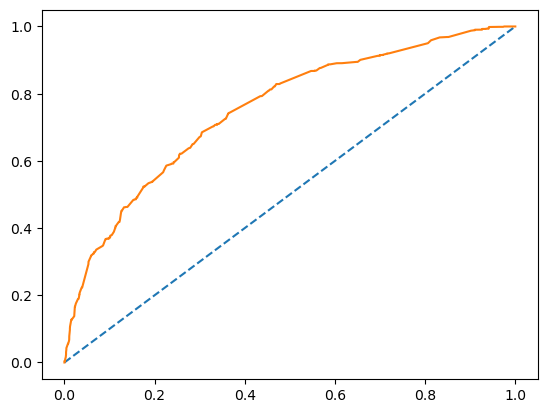

In [316]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lda.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.748


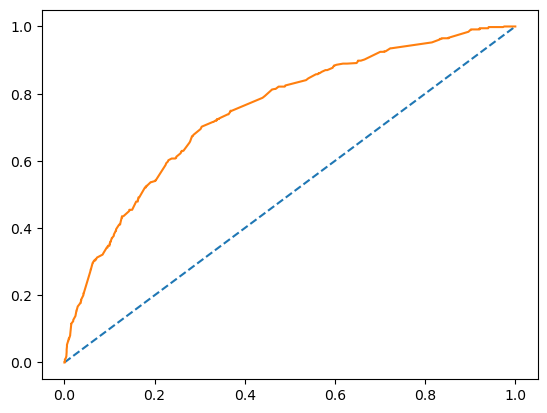

In [317]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [318]:
print("cross validation scores for training dataset")
scores_ldasm_train = cross_val_score(lda, X_train_res, y_train_res, cv=10)
scores_ldasm_train

cross validation scores for training dataset


array([0.67682927, 0.67606707, 0.68421053, 0.68268497, 0.67276888,
       0.70861937, 0.66361556, 0.67963387, 0.68649886, 0.70480549])

In [319]:
print("cross validation scores for testing dataset")
scores_ldasm_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldasm_test

cross validation scores for testing dataset


array([0.82840237, 0.83431953, 0.82840237, 0.84023669, 0.84615385,
       0.83136095, 0.84023669, 0.83431953, 0.83679525, 0.83086053])

# KNN Model

In [320]:
# building KNN model using the default hyper-parameter
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [321]:
## Performance Matrix on train data set
ytrain_predict_knn = knn.predict(X_train)
print("Accracy of training dataset:", knn.score(X_train, y_train))

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accracy of training dataset: 0.8572697284953058


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [322]:
print("confusion matrix of training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_knn))

confusion matrix of training dataset
[[6312  244]
 [ 881  445]]


In [323]:
print("classificatoin report of training dataset")
print (classification_report(y_train, ytrain_predict_knn))

classificatoin report of training dataset
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      6556
         1.0       0.65      0.34      0.44      1326

    accuracy                           0.86      7882
   macro avg       0.76      0.65      0.68      7882
weighted avg       0.84      0.86      0.84      7882



In [324]:
# Performance Matrix on test data set
ytest_predict_knn = knn.predict(X_test)
print("accuracy for testing dataset", knn.score(X_test, y_test))

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy for testing dataset 0.8404381290704559


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [325]:
print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_knn))


confusion matrix for testing dataset
[[2679  129]
 [ 410  160]]


In [326]:
print("classsification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_knn))

classsification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2808
         1.0       0.55      0.28      0.37       570

    accuracy                           0.84      3378
   macro avg       0.71      0.62      0.64      3378
weighted avg       0.81      0.84      0.82      3378



AUC score and ROC curve for training dataset
AUC: 0.749


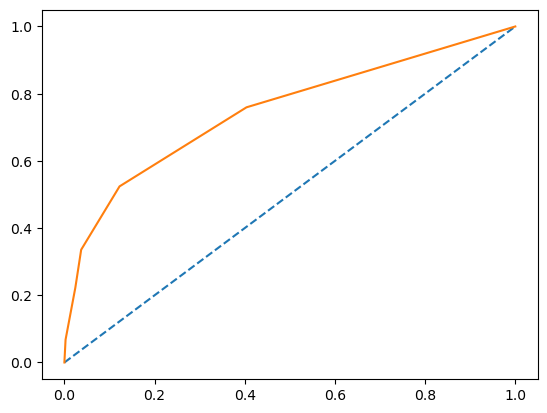

In [327]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.715


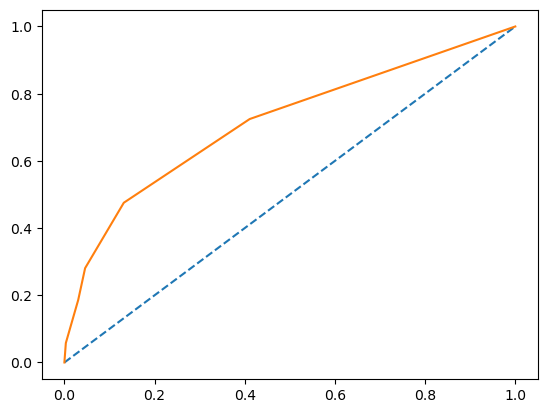

In [328]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [329]:
print("cross validation scores for train dataset")
scores_knn_train = cross_val_score(knn, X_train, y_train, cv=10)
scores_knn_train

cross validation scores for train dataset


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

array([0.83523447, 0.82129278, 0.84898477, 0.84771574, 0.84390863,
       0.8464467 , 0.84010152, 0.79568528, 0.84137056, 0.83883249])

In [330]:
print("cross validation scores for test dataset")
scores_knn_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knn_test

cross validation scores for test dataset


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

array([0.83136095, 0.83136095, 0.83727811, 0.84023669, 0.82248521,
       0.82544379, 0.82544379, 0.82544379, 0.81305638, 0.80118694])

# Finding the right value for n_neighbor

In [331]:
# getting the ideal number of value of "N"
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

[0.24304322084073415,
 0.17021906453522795,
 0.1595618709295441,
 0.16489046773238603,
 0.16015393724097093,
 0.16193013617525165,
 0.16341030195381878,
 0.16252220248667848,
 0.16370633510953225,
 0.16281823564239195]

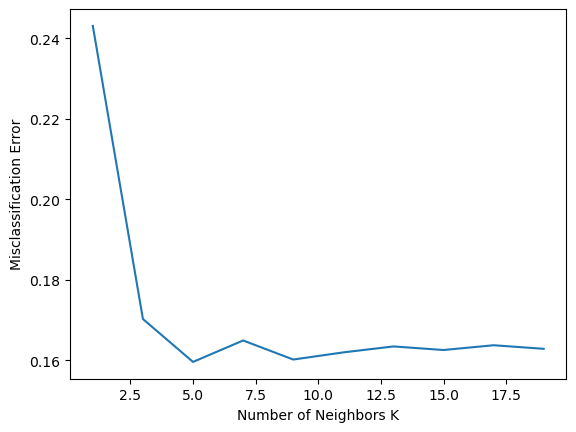

In [332]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [333]:
#from sklearn.neighbors import KNeighborsClassifier

knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)

KNeighborsClassifier()

In [334]:
# Performance Matrix on train data set
ytrain_predict_knn5 = knn5.predict(X_train)
print("accuracy for training dataset:",knn5.score(X_train, y_train))

print("confusion matrix for training dataset")
print(confusion_matrix(y_train, ytrain_predict_knn5))

print("classification report for training dataset")
print(classification_report(y_train, ytrain_predict_knn5))

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

accuracy for training dataset: 0.8572697284953058
confusion matrix for training dataset
[[6312  244]
 [ 881  445]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      6556
         1.0       0.65      0.34      0.44      1326

    accuracy                           0.86      7882
   macro avg       0.76      0.65      0.68      7882
weighted avg       0.84      0.86      0.84      7882



In [335]:
# Performance Matrix on test data set
ytest_predict_knn5 = knn5.predict(X_test)
print("accuracy score for testing dataset:",knn5.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(confusion_matrix(y_test, ytest_predict_knn5))

print("classification report for testing dataset")
print(classification_report(y_test, ytest_predict_knn5))

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy score for testing dataset: 0.8404381290704559
confusion matrix for testing dataset
[[2679  129]
 [ 410  160]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2808
         1.0       0.55      0.28      0.37       570

    accuracy                           0.84      3378
   macro avg       0.71      0.62      0.64      3378
weighted avg       0.81      0.84      0.82      3378



C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [336]:
0.8572697284953058 - 0.8404381290704559

0.016831599424849908

AUC score and ROC curve for training dataset
AUC: 0.749


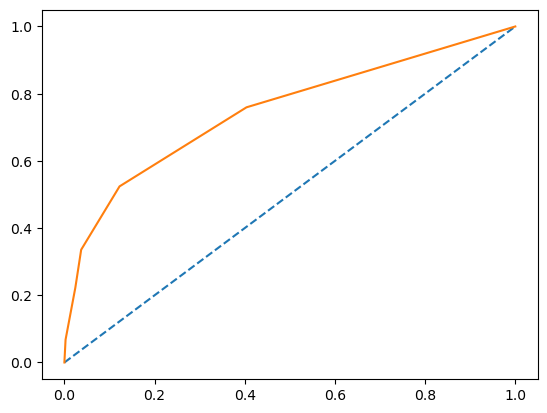

In [338]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn5.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.715


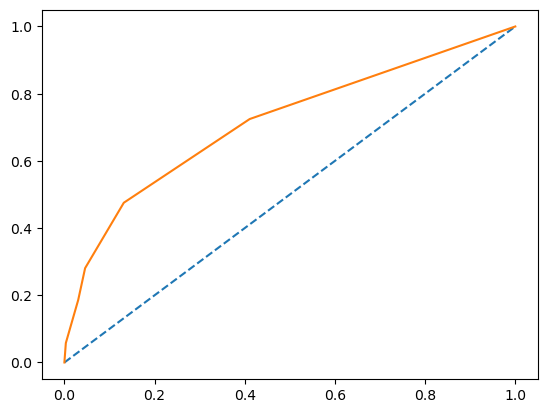

In [339]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn5.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [340]:
print("cross validation scores for training dataset")
scores_knn5_train = cross_val_score(knn5, X_train, y_train, cv=10)
scores_knn5_train

cross validation scores for training dataset


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

array([0.83523447, 0.82129278, 0.84898477, 0.84771574, 0.84390863,
       0.8464467 , 0.84010152, 0.79568528, 0.84137056, 0.83883249])

In [341]:
print("cross validation scores for testing dataset")
scores_knn5_test = cross_val_score(knn5, X_test, y_test, cv=10)
scores_knn5_test

cross validation scores for testing dataset


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

array([0.83136095, 0.83136095, 0.83727811, 0.84023669, 0.82248521,
       0.82544379, 0.82544379, 0.82544379, 0.81305638, 0.80118694])

# Building KNN model using GridSearchCV

In [342]:
param_grid = {
    'n_neighbors': [5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    
}

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [343]:
# fitting gridsearchCV into training dataset
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [344]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'algorithm': 'kd_tree',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [345]:
# getting best estimators
best_grid = grid_search.best_estimator_

In [346]:
ytrain_predict_knncv = best_grid.predict(X_train)
ytest_predict_knncv = best_grid.predict(X_test)

In [347]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8561278863232682


In [348]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8354055654233274


In [349]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_knncv))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      6556
         1.0       0.63      0.35      0.45      1326

    accuracy                           0.86      7882
   macro avg       0.75      0.66      0.68      7882
weighted avg       0.84      0.86      0.84      7882



In [350]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_knncv))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2808
         1.0       0.52      0.28      0.37       570

    accuracy                           0.84      3378
   macro avg       0.69      0.62      0.64      3378
weighted avg       0.81      0.84      0.81      3378



In [351]:
# confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, ytrain_predict_knncv)

confusuon matrix for training dataset


array([[6279,  277],
       [ 857,  469]], dtype=int64)

In [352]:
# confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_knncv)

confusuon matrix for testing dataset


array([[2660,  148],
       [ 408,  162]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.765


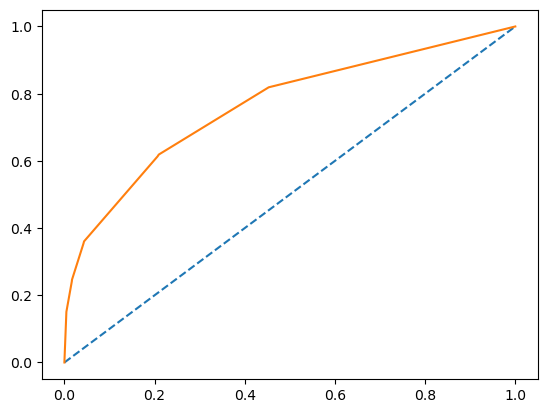

In [353]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.725


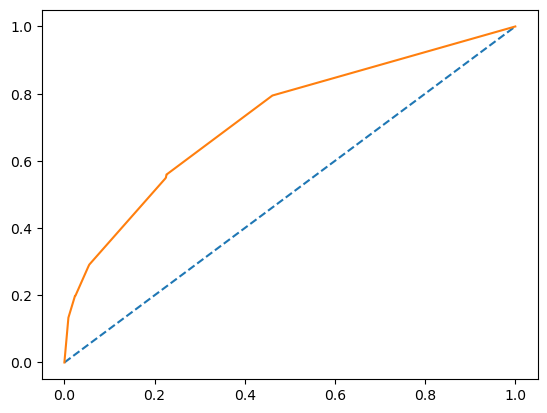

In [354]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [355]:
print("cross validation scores for train dataset")
scores_knncv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_knncv_train

cross validation scores for train dataset


array([0.84157161, 0.85171103, 0.85659898, 0.8464467 , 0.84263959,
       0.86040609, 0.84771574, 0.83121827, 0.84137056, 0.84771574])

In [356]:
print("cross validation scores for test dataset")
scores_knncv_test = cross_val_score(best_grid, X_test, y_test, cv=10)
scores_knncv_test

cross validation scores for test dataset


array([0.83136095, 0.80473373, 0.80473373, 0.82248521, 0.78698225,
       0.79289941, 0.85502959, 0.81656805, 0.82789318, 0.79228487])

# Building KNN model over balanced dataset using SMOTE

In [357]:
#fitting model into training dataset
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=19)

In [358]:
# predict on train and test data set with balanced dataset
ytrain_predict_knnsm = knn.predict(X_train_res) # can compare with y_train
ytest_predict_knnsm = knn.predict(X_test) # can compare with y_test

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [359]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",knn.score(X_train_res, y_train_res))

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of training dataset: 0.713849908480781


In [360]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",knn.score(X_test, y_test))

Accuracy of testing dataset: 0.6669626998223801


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [361]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_knnsm))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      6556
         1.0       0.70      0.76      0.73      6556

    accuracy                           0.71     13112
   macro avg       0.72      0.71      0.71     13112
weighted avg       0.72      0.71      0.71     13112



In [362]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_knnsm))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77      2808
         1.0       0.30      0.71      0.42       570

    accuracy                           0.67      3378
   macro avg       0.61      0.68      0.59      3378
weighted avg       0.81      0.67      0.71      3378



In [363]:
# confusion matrix for train dataset
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, ytrain_predict_knnsm)

confusion matrix for training dataset


array([[4370, 2186],
       [1566, 4990]], dtype=int64)

In [364]:
# confusion matrix for test dataset
print("confusion matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_knnsm)

confusion matrix for testing dataset


array([[1851,  957],
       [ 168,  402]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.781


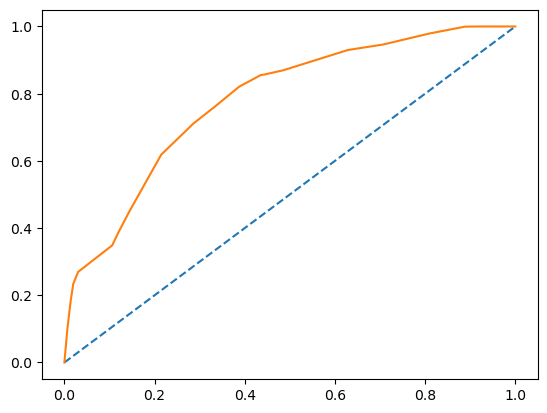

In [365]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.738


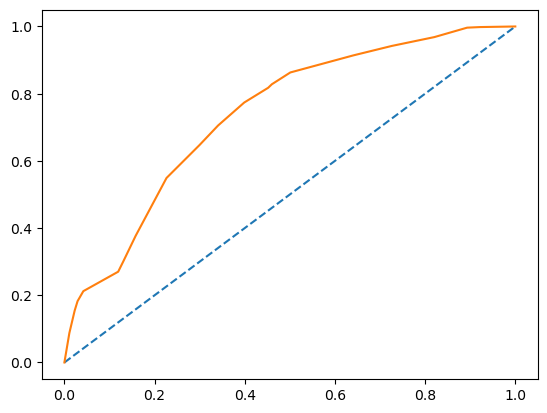

In [366]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [367]:
print("cross validation scores for train dataset")
scores_knnsm_train = cross_val_score(knn, X_train_res, y_train_res, cv=10)
scores_knnsm_train

cross validation scores for train dataset


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

array([0.69588415, 0.71341463, 0.71167048, 0.72768879, 0.70480549,
       0.73150267, 0.70175439, 0.72006102, 0.73073989, 0.73302822])

In [368]:
print("cross validation scores for test dataset")
scores_knnsm_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knnsm_test

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

cross validation scores for test dataset


C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

array([0.84911243, 0.83431953, 0.84023669, 0.83431953, 0.83136095,
       0.82544379, 0.83136095, 0.82248521, 0.82492582, 0.83086053])

# Building Gaussian Naive Bayes¶

In [369]:
#importing libraries to build NB model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [370]:
# fitting NB model into training dataset
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [371]:
# predicting and checking accoracy on training dataset
ytrain_predict_nb = nb.predict(X_train)
print("Accracy of training dataset:", nb.score(X_train, y_train))

Accracy of training dataset: 0.28063943161634103


In [372]:
# getting confusion matirx and classification report for training dataset
print("Confusion matrix of train dataset")
print(confusion_matrix(y_train, ytrain_predict_nb)) ## confusion_matrix

#print("Classification report of train dataset")
print(classification_report(y_train, ytrain_predict_nb))     ## classification_report

Confusion matrix of train dataset
[[ 961 5595]
 [  75 1251]]
              precision    recall  f1-score   support

         0.0       0.93      0.15      0.25      6556
         1.0       0.18      0.94      0.31      1326

    accuracy                           0.28      7882
   macro avg       0.56      0.55      0.28      7882
weighted avg       0.80      0.28      0.26      7882



In [373]:
# predicting and getting accuracy score for testing dataset
ytest_predict_nb = nb.predict(X_test)
print("Accracy of testing dataset:", nb.score(X_test, y_test))

Accracy of testing dataset: 0.2898164594434577


In [374]:
# printing confusuon matix and classification report for testing datatset
print("Confusion matrix of test dataset")
print(confusion_matrix(y_test, ytest_predict_nb))         ## confusion_matrix
print("Classification report of test dataset")
print(classification_report(y_test, ytest_predict_nb))    ## classification_report

Confusion matrix of test dataset
[[ 429 2379]
 [  20  550]]
Classification report of test dataset
              precision    recall  f1-score   support

         0.0       0.96      0.15      0.26      2808
         1.0       0.19      0.96      0.31       570

    accuracy                           0.29      3378
   macro avg       0.57      0.56      0.29      3378
weighted avg       0.83      0.29      0.27      3378



AUC score and ROC curve for training dataset
AUC: 0.715


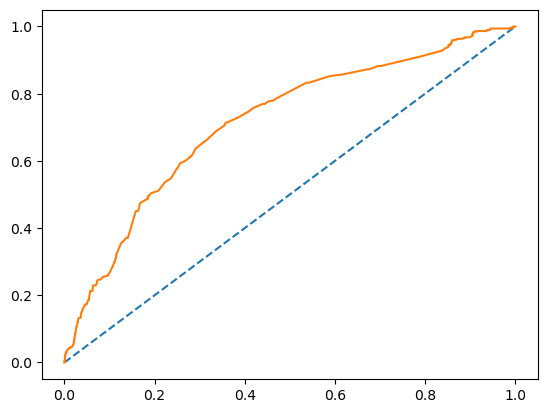

In [375]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.721


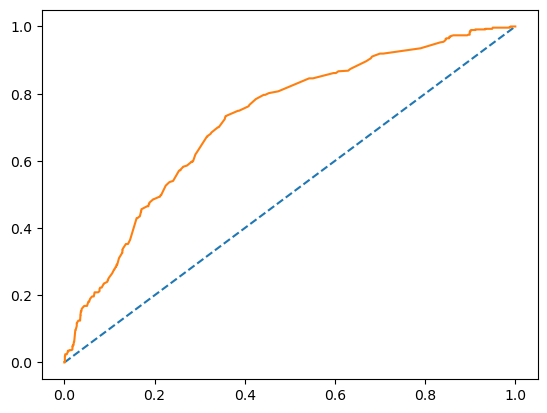

In [376]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [377]:
print("cross validation scores for train dataset")
scores_nb_train = cross_val_score(nb, X_train, y_train, cv=10)
scores_nb_train

cross validation scores for train dataset


array([0.2712294 , 0.25475285, 0.29187817, 0.26522843, 0.26903553,
       0.30076142, 0.27284264, 0.28172589, 0.26522843, 0.30964467])

In [378]:
print("cross validation scores for test dataset")
scores_nb_test = cross_val_score(nb, X_test, y_test, cv=10)
scores_nb_test

cross validation scores for test dataset


array([0.29289941, 0.28994083, 0.28106509, 0.31656805, 0.28994083,
       0.26627219, 0.29881657, 0.27218935, 0.30563798, 0.27002967])

# Building Gaussian Naive Bayes over balanced data using SMOTE

In [379]:
# fitting NB model into balanced training dataset
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

GaussianNB()

In [380]:
# predicting and checking accoracy on training dataset
ytrain_predict_nbsm = nb.predict(X_train_res)
print("Accracy of training dataset:", nb.score(X_train_res, y_train_res))

Accracy of training dataset: 0.5560555216595485


In [381]:
# getting confusion matirx and classification report for training dataset
print("Confusion matrix of train dataset")
print(confusion_matrix(y_train_res, ytrain_predict_nbsm)) ## confusion_matrix

#print("Classification report of train dataset")
print(classification_report(y_train_res, ytrain_predict_nbsm))     ## classification_report

Confusion matrix of train dataset
[[1046 5510]
 [ 311 6245]]
              precision    recall  f1-score   support

         0.0       0.77      0.16      0.26      6556
         1.0       0.53      0.95      0.68      6556

    accuracy                           0.56     13112
   macro avg       0.65      0.56      0.47     13112
weighted avg       0.65      0.56      0.47     13112



In [382]:
# predicting and getting accuracy score for testing dataset
ytest_predict_nbsm = nb.predict(X_test)
print("Accracy of testing dataset:", nb.score(X_test, y_test))

Accracy of testing dataset: 0.2975133214920071


In [383]:
# printing confusuon matix and classification report for testing datatset
print("Confusion matrix of test dataset")
print(confusion_matrix(y_test, ytest_predict_nbsm))         ## confusion_matrix
print("Classification report of test dataset")
print(classification_report(y_test, ytest_predict_nbsm))    ## classification_report

Confusion matrix of test dataset
[[ 465 2343]
 [  30  540]]
Classification report of test dataset
              precision    recall  f1-score   support

         0.0       0.94      0.17      0.28      2808
         1.0       0.19      0.95      0.31       570

    accuracy                           0.30      3378
   macro avg       0.56      0.56      0.30      3378
weighted avg       0.81      0.30      0.29      3378



AUC score and ROC curve for training dataset
AUC: 0.723


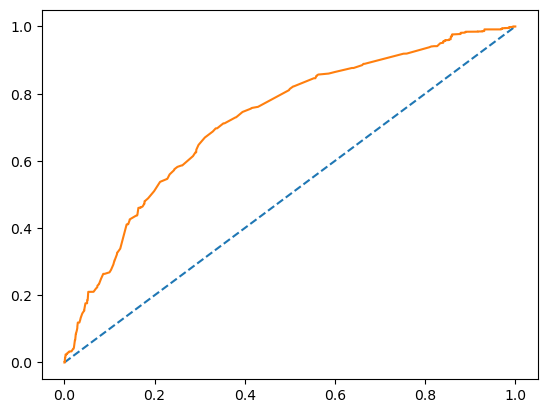

In [384]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.708


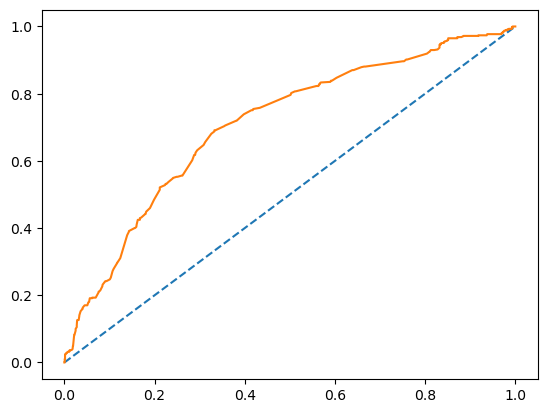

In [385]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [386]:
print("cross validation scores for train dataset")
scores_nbsm_train = cross_val_score(nb, X_train_res, y_train_res, cv=10)
scores_nbsm_train

cross validation scores for train dataset


array([0.53887195, 0.52362805, 0.5682685 , 0.55682685, 0.5553013 ,
       0.57284516, 0.55301297, 0.55453852, 0.55758963, 0.58047292])

In [387]:
print("cross validation scores for test dataset")
scores_nbsm_test = cross_val_score(nb, X_test, y_test, cv=10)
scores_nbsm_test

cross validation scores for test dataset


array([0.29289941, 0.28994083, 0.28106509, 0.31656805, 0.28994083,
       0.26627219, 0.29881657, 0.27218935, 0.30563798, 0.27002967])

# Random Forest

In [388]:
# building rando forect model
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [389]:
# Performance Matrix on train data set
ytrain_predict_rf = rf.predict(X_train)
print("accuracy score for training dataset:",rf.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_rf))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_rf))

accuracy score for training dataset: 0.8633595534128394
confusion matrix for training dataset
[[6428  128]
 [ 949  377]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      6556
         1.0       0.75      0.28      0.41      1326

    accuracy                           0.86      7882
   macro avg       0.81      0.63      0.67      7882
weighted avg       0.85      0.86      0.84      7882



In [390]:
# Performance Matrix on test data set
ytest_predict_rf = rf.predict(X_test)
print("accuracy score for testing dataset:",rf.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_rf))

print("classification report for testing dataste")
print(metrics.classification_report(y_test, ytest_predict_rf))

accuracy score for testing dataset: 0.8431024274718768
confusion matrix for testing dataset
[[2724   84]
 [ 446  124]]
classification report for testing dataste
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2808
         1.0       0.60      0.22      0.32       570

    accuracy                           0.84      3378
   macro avg       0.73      0.59      0.62      3378
weighted avg       0.81      0.84      0.81      3378



AUC score and ROC curve for training dataset
AUC: 0.707


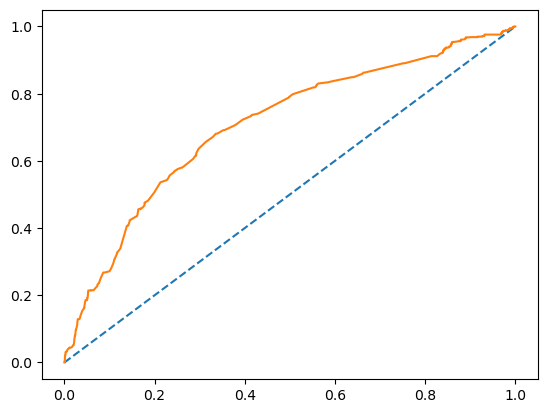

In [391]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.708


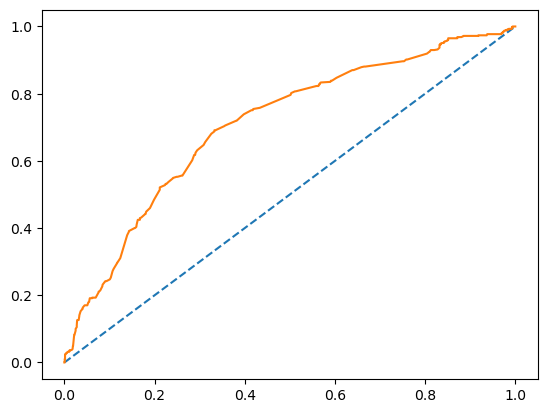

In [392]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Building random forest model over balanced dataset

In [393]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=1)

In [394]:
# Performance Matrix on train data set
ytrain_predict_rfsm = rf.predict(X_train_res)
print("accuracy score for training dataset:",rf.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_rfsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_rfsm))

accuracy score for training dataset: 0.7457291031116534
confusion matrix for training dataset
[[4763 1793]
 [1541 5015]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      6556
         1.0       0.74      0.76      0.75      6556

    accuracy                           0.75     13112
   macro avg       0.75      0.75      0.75     13112
weighted avg       0.75      0.75      0.75     13112



In [395]:
# Performance Matrix on test data set
ytest_predict_rfsm = rf.predict(X_test)
print("accuracy score for testing dataset:",rf.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_rfsm))

print("classification report for testing dataste")
print(metrics.classification_report(y_test, ytest_predict_rfsm))

accuracy score for testing dataset: 0.7104795737122558
confusion matrix for testing dataset
[[1991  817]
 [ 161  409]]
classification report for testing dataste
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.80      2808
         1.0       0.33      0.72      0.46       570

    accuracy                           0.71      3378
   macro avg       0.63      0.71      0.63      3378
weighted avg       0.83      0.71      0.74      3378



# Bagging

In [396]:
from sklearn.ensemble import BaggingClassifier
Bagging=BaggingClassifier(base_estimator=rf,random_state=1)
Bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [397]:
# Performance Matrix on train data set
ytrain_predict_bagging = Bagging.predict(X_train)
print("accuracy score or training dataset:",Bagging.score(X_train, y_train))

print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_bagging))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_bagging))

accuracy score or training dataset: 0.862471453945699
confusion report for training dataset
[[6417  139]
 [ 945  381]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      6556
         1.0       0.73      0.29      0.41      1326

    accuracy                           0.86      7882
   macro avg       0.80      0.63      0.67      7882
weighted avg       0.85      0.86      0.84      7882



In [398]:
# Performance Matrix on test data set
ytest_predict_bagging = Bagging.predict(X_test)
print("Accuracy score for testing datatset:",Bagging.score(X_test, y_test))

print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_bagging))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_bagging))

Accuracy score for testing datatset: 0.8428063943161634
confusuion matrix for testing dataset
[[2720   88]
 [ 443  127]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2808
         1.0       0.59      0.22      0.32       570

    accuracy                           0.84      3378
   macro avg       0.73      0.60      0.62      3378
weighted avg       0.81      0.84      0.81      3378



AUC score and ROC curve for training dataset
AUC: 0.833


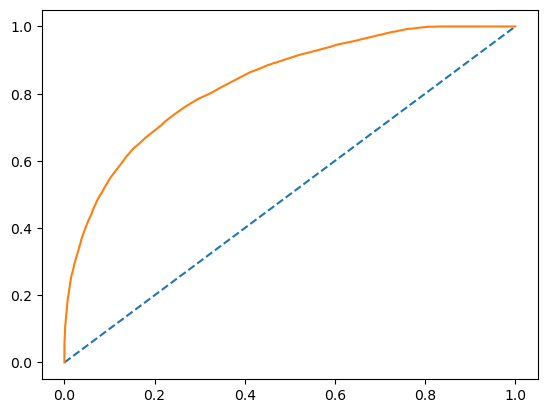

In [399]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.794


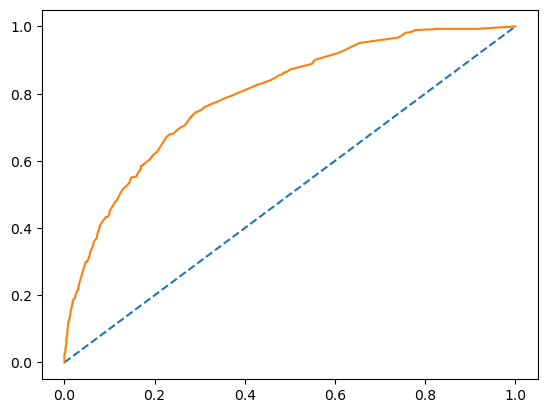

In [400]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [401]:
print("cross validation scores for train dataset")
scores_bagging_train = cross_val_score(Bagging, X_train, y_train, cv=10)
scores_bagging_train

cross validation scores for train dataset


array([0.85297845, 0.85931559, 0.85786802, 0.85025381, 0.85025381,
       0.86167513, 0.85659898, 0.84263959, 0.85152284, 0.84771574])

In [402]:
print("cross validation scores for test dataset")
scores_bagging_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_test

cross validation scores for test dataset


array([0.83727811, 0.85207101, 0.84911243, 0.83727811, 0.82544379,
       0.84023669, 0.83727811, 0.83136095, 0.83086053, 0.83086053])

# bagging on balanced dataset

In [403]:
Bagging.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [404]:
# Performance Matrix on train data set
ytrain_predict_bagging_sm = Bagging.predict(X_train_res)
print("accuracy score or training dataset:",Bagging.score(X_train_res, y_train_res))

print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_bagging_sm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_bagging_sm))

accuracy score or training dataset: 0.7450427089688835
confusion report for training dataset
[[4865 1691]
 [1652 4904]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74      6556
         1.0       0.74      0.75      0.75      6556

    accuracy                           0.75     13112
   macro avg       0.75      0.75      0.75     13112
weighted avg       0.75      0.75      0.75     13112



In [405]:
# Performance Matrix on test data set
ytest_predict_bagging_sm= Bagging.predict(X_test)
print("Accuracy score for testing datatset:",Bagging.score(X_test, y_test))

print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_bagging_sm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_bagging_sm))

Accuracy score for testing datatset: 0.7181764357608053
confusuion matrix for testing dataset
[[2032  776]
 [ 176  394]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81      2808
         1.0       0.34      0.69      0.45       570

    accuracy                           0.72      3378
   macro avg       0.63      0.71      0.63      3378
weighted avg       0.82      0.72      0.75      3378



AUC score and ROC curve for training dataset
AUC: 0.833


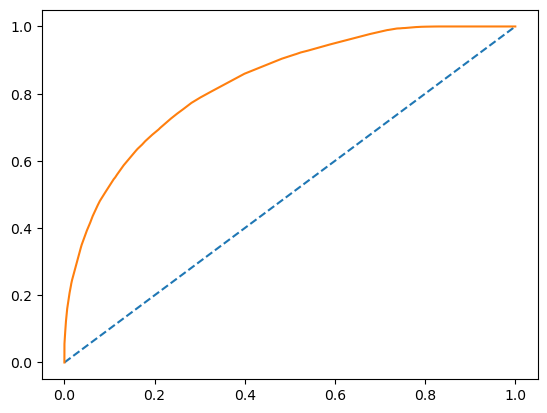

In [406]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.785


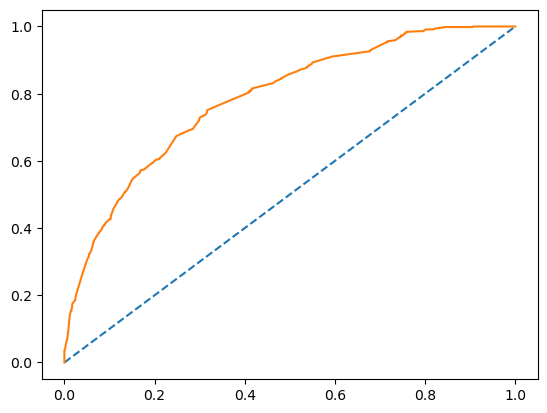

In [407]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [408]:
print("cross validation scores for train dataset")
scores_bagging_sm_train = cross_val_score(Bagging, X_train_res, y_train_res, cv=10)
scores_bagging_sm_train

cross validation scores for train dataset


array([0.73246951, 0.72332317, 0.73302822, 0.75667429, 0.7208238 ,
       0.74752098, 0.71548436, 0.73531655, 0.74828375, 0.75362319])

In [409]:
print("cross validation scores for test dataset")
scores_bagging_sm_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_sm_test

cross validation scores for test dataset


array([0.83727811, 0.85207101, 0.84911243, 0.83727811, 0.82544379,
       0.84023669, 0.83727811, 0.83136095, 0.83086053, 0.83086053])

# Ada-Boost

In [410]:
from sklearn.ensemble import AdaBoostClassifier


adb = AdaBoostClassifier(random_state=1)
adb.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [411]:
# Performance Matrix on train data set
ytrain_predict_adb = adb.predict(X_train)

print("Accuracy for training dataset:",adb.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_adb))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_adb))

Accuracy for training dataset: 0.8388733823902563
confusion matrix for training dataset
[[6453  103]
 [1167  159]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      6556
         1.0       0.61      0.12      0.20      1326

    accuracy                           0.84      7882
   macro avg       0.73      0.55      0.56      7882
weighted avg       0.81      0.84      0.79      7882



In [412]:
# Performance Matrix on test data set
ytest_predict_adb = adb.predict(X_test)
print("accuracy score for testing dataset:",adb.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_adb))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_adb))

accuracy score for testing dataset: 0.8389579632918887
confusion matrix for testing dataset
[[2761   47]
 [ 497   73]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.61      0.13      0.21       570

    accuracy                           0.84      3378
   macro avg       0.73      0.56      0.56      3378
weighted avg       0.81      0.84      0.79      3378



AUC score and ROC curve for training dataset
AUC: 0.750


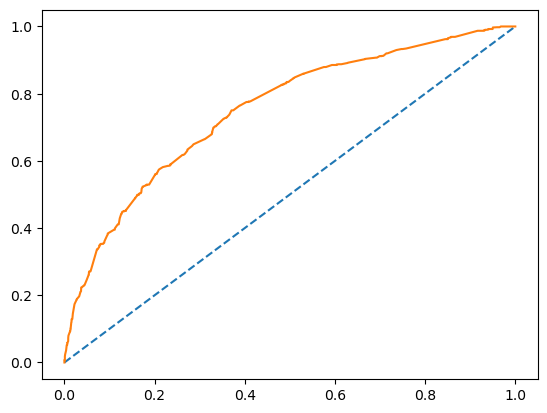

In [413]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.752


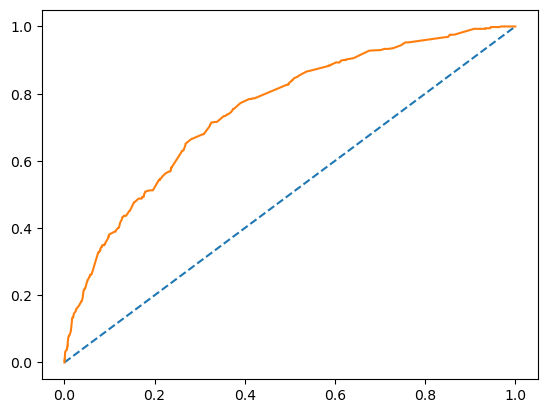

In [414]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [415]:
print("cross validation scores for train dataset")
scores_adb_train = cross_val_score(adb, X_train, y_train, cv=10)
scores_adb_train

cross validation scores for train dataset


array([0.8365019 , 0.84030418, 0.84517766, 0.84010152, 0.83883249,
       0.84517766, 0.83756345, 0.82994924, 0.83502538, 0.84390863])

In [416]:
print("cross validation scores for test dataset")
scores_adb_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_test

cross validation scores for test dataset


array([0.82544379, 0.82544379, 0.83727811, 0.83727811, 0.84023669,
       0.83136095, 0.83431953, 0.83727811, 0.83679525, 0.84569733])

# Ada-Boost on balanced dataset

In [417]:
adb.fit(X_train_res,y_train_res)

AdaBoostClassifier(random_state=1)

In [418]:
# Performance Matrix on train data set
ytrain_predict_adbsm = adb.predict(X_train_res)

print("Accuracy for training dataset:",adb.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_adbsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_adbsm))

Accuracy for training dataset: 0.6785387431360586
confusion matrix for training dataset
[[4456 2100]
 [2115 4441]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68      6556
         1.0       0.68      0.68      0.68      6556

    accuracy                           0.68     13112
   macro avg       0.68      0.68      0.68     13112
weighted avg       0.68      0.68      0.68     13112



In [419]:
# Performance Matrix on test data set
ytest_predict_adbsm = adb.predict(X_test)
print("accuracy score for testing dataset:",adb.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_adbsm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_adbsm))

accuracy score for testing dataset: 0.6856127886323268
confusion matrix for testing dataset
[[1919  889]
 [ 173  397]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78      2808
         1.0       0.31      0.70      0.43       570

    accuracy                           0.69      3378
   macro avg       0.61      0.69      0.61      3378
weighted avg       0.81      0.69      0.72      3378



AUC score and ROC curve for training dataset
AUC: 0.751


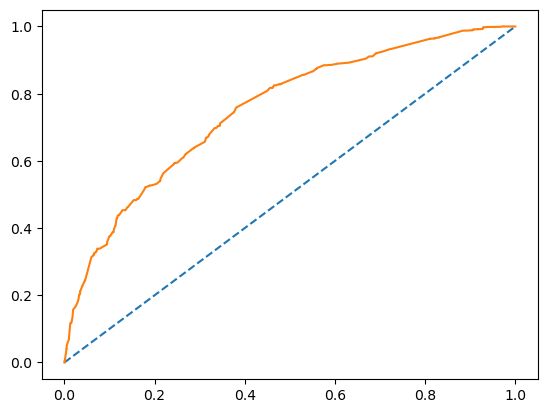

In [420]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.747


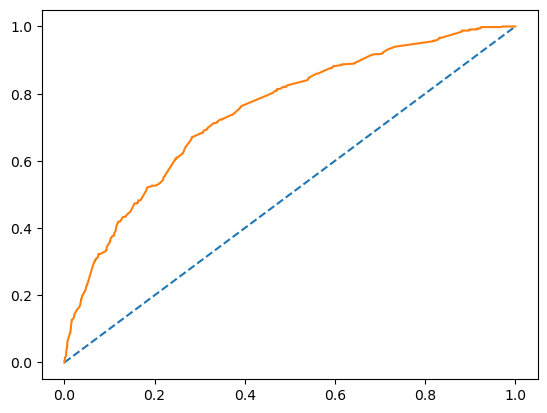

In [421]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [422]:
print("cross validation scores for train dataset")
scores_adb_sm_train = cross_val_score(adb, X_train_res, y_train_res, cv=10)
scores_adb_sm_train

cross validation scores for train dataset


array([0.67454268, 0.66387195, 0.67276888, 0.67963387, 0.66437834,
       0.70633105, 0.65751335, 0.68573608, 0.69031274, 0.6979405 ])

In [423]:
print("cross validation scores for test dataset")
scores_adb_sm_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_sm_test

cross validation scores for test dataset


array([0.82544379, 0.82544379, 0.83727811, 0.83727811, 0.84023669,
       0.83136095, 0.83431953, 0.83727811, 0.83679525, 0.84569733])

# Gradient Boosting

In [424]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [425]:
# Performance Matrix on train data set
ytrain_predict_gb = gb.predict(X_train)
print("accuracy for training dataset:", gb.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_gb))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_gb))

accuracy for training dataset: 0.8477543770616595
confusion matrix for training dataset
[[6456  100]
 [1100  226]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      6556
         1.0       0.69      0.17      0.27      1326

    accuracy                           0.85      7882
   macro avg       0.77      0.58      0.59      7882
weighted avg       0.83      0.85      0.81      7882



In [426]:
# Performance Matrix on test data set
ytest_predict_gb = gb.predict(X_test)
print("accuracy score for testing dataset:", gb.score(X_test, y_test))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_gb))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_gb))

accuracy score for testing dataset: 0.8413262285375962
confusuon matrix for testing dataset
[[2751   57]
 [ 479   91]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.61      0.16      0.25       570

    accuracy                           0.84      3378
   macro avg       0.73      0.57      0.58      3378
weighted avg       0.81      0.84      0.80      3378



AUC score and ROC curve for training dataset
AUC: 0.782


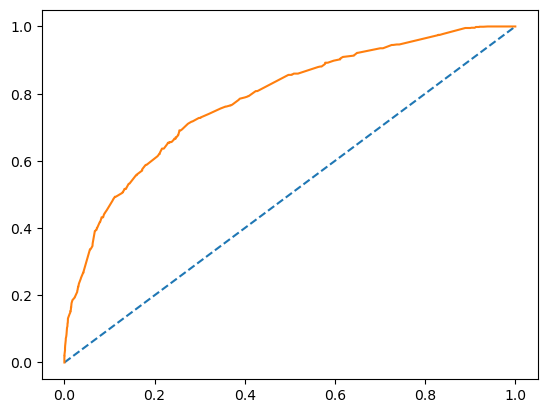

In [427]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.774


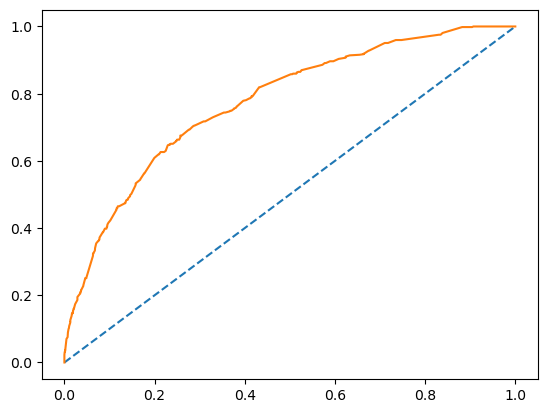

In [428]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [429]:
print("cross validation scores for train dataset")
scores_gb_train = cross_val_score(gb, X_train, y_train, cv=10)
scores_gb_train

cross validation scores for train dataset


array([0.83523447, 0.84410646, 0.84771574, 0.84263959, 0.84263959,
       0.85406091, 0.84390863, 0.83375635, 0.82994924, 0.83629442])

In [430]:
print("cross validation scores for test dataset")
scores_gb_test = cross_val_score(gb, X_test, y_test, cv=10)
scores_gb_test

cross validation scores for test dataset


array([0.83727811, 0.84319527, 0.84023669, 0.84023669, 0.83136095,
       0.84023669, 0.84023669, 0.84023669, 0.83976261, 0.84272997])

# Gradient Boosting on balanced dataset

In [431]:
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=1)

In [432]:
# Performance Matrix on train data set
ytrain_predict_gbsm = gb.predict(X_train_res)
print("accuracy for training dataset:", gb.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_gbsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_gbsm))

accuracy for training dataset: 0.7177394752898109
confusion matrix for training dataset
[[4840 1716]
 [1985 4571]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72      6556
         1.0       0.73      0.70      0.71      6556

    accuracy                           0.72     13112
   macro avg       0.72      0.72      0.72     13112
weighted avg       0.72      0.72      0.72     13112



In [433]:
# Performance Matrix on test data set
ytest_predict_gbsm = gb.predict(X_test)
print("accuracy score for testing dataset:", gb.score(X_test, y_test))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_gbsm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_gbsm))

accuracy score for testing dataset: 0.7178804026050918
confusuon matrix for testing dataset
[[2043  765]
 [ 188  382]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81      2808
         1.0       0.33      0.67      0.44       570

    accuracy                           0.72      3378
   macro avg       0.62      0.70      0.63      3378
weighted avg       0.82      0.72      0.75      3378



AUC score and ROC curve for training dataset
AUC: 0.785


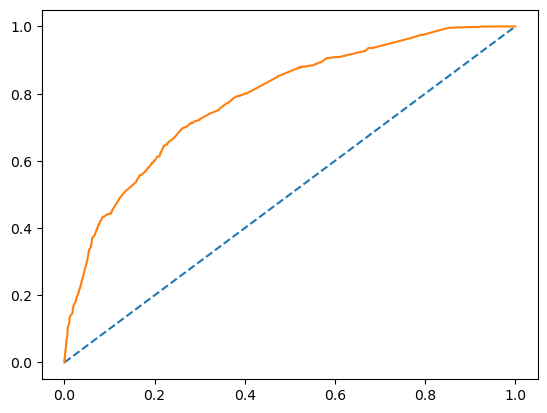

In [434]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.769


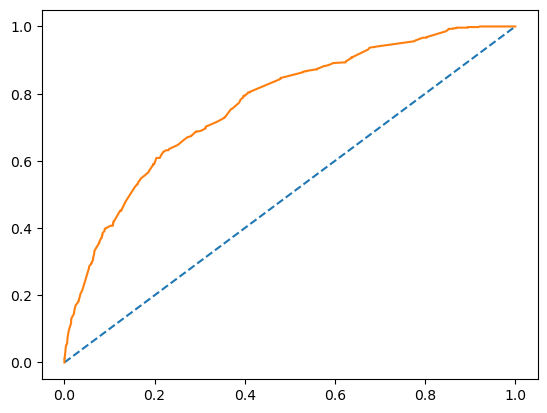

In [435]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [436]:
print("cross validation scores for train dataset")
scores_gb_sm_train = cross_val_score(gb, X_train_res, y_train_res, cv=10)
scores_gb_sm_train

cross validation scores for train dataset


array([0.70121951, 0.69359756, 0.69641495, 0.71700992, 0.70327994,
       0.71929825, 0.69107551, 0.71243326, 0.72997712, 0.72921434])

In [437]:
print("cross validation scores for test dataset")
scores_gb_sm_test = cross_val_score(gb, X_test, y_test, cv=10)
scores_gb_sm_test

cross validation scores for test dataset


array([0.83727811, 0.84319527, 0.84023669, 0.84023669, 0.83136095,
       0.84023669, 0.84023669, 0.84023669, 0.83976261, 0.84272997])

# Support Vector Machine

In [438]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVC()

In [439]:
# Performance Matrix on train data set
ytrain_predict_SVM = SVM.predict(X_train)
print("accuracy for training dataset:", SVM.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_SVM))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_SVM))

accuracy for training dataset: 0.8529561025120528
confusion matrix for training dataset
[[6466   90]
 [1069  257]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      6556
         1.0       0.74      0.19      0.31      1326

    accuracy                           0.85      7882
   macro avg       0.80      0.59      0.61      7882
weighted avg       0.84      0.85      0.82      7882



In [440]:
# Performance Matrix on test data set
ytest_predict_SVM = SVM.predict(X_test)
print("accuracy score for testing dataset:", SVM.score(X_test, y_test))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_SVM))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_SVM))

accuracy score for testing dataset: 0.8431024274718768
confusuon matrix for testing dataset
[[2754   54]
 [ 476   94]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.64      0.16      0.26       570

    accuracy                           0.84      3378
   macro avg       0.74      0.57      0.59      3378
weighted avg       0.82      0.84      0.80      3378



# Hypertuning SVM

In [441]:
param_grid = {
    'kernel': ['linear','rbf','poly'],
    'C':np.logspace (-3, 2, 10),
    'gamma': [0.2,0.3,0.4,0.5,0.6],
    'degree': [2,3],
    
}

grid_search = GridSearchCV(estimator = SVM, param_grid = param_grid, cv = 5, n_jobs=-1,scoring='f1')

In [442]:
# fitting gridsearchCV into training dataset
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'degree': [2, 3], 'gamma': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1')

In [443]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'C': 27.825594022071257, 'degree': 2, 'gamma': 0.4, 'kernel': 'rbf'}

In [444]:
# getting best estimators
best_grid = grid_search.best_estimator_

In [445]:
ytrain_predict_SVMcv = best_grid.predict(X_train)
ytest_predict_SVMcv = best_grid.predict(X_test)

In [446]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8633595534128394


In [447]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8433984606275903


In [448]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_SVMcv))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      6556
         1.0       0.75      0.28      0.41      1326

    accuracy                           0.86      7882
   macro avg       0.81      0.63      0.66      7882
weighted avg       0.85      0.86      0.84      7882



In [449]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_SVMcv))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2808
         1.0       0.60      0.22      0.32       570

    accuracy                           0.84      3378
   macro avg       0.73      0.60      0.62      3378
weighted avg       0.82      0.84      0.81      3378



In [450]:
# confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, ytrain_predict_SVMcv)

confusuon matrix for training dataset


array([[6436,  120],
       [ 957,  369]], dtype=int64)

In [451]:
# confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_SVMcv)

confusuon matrix for testing dataset


array([[2723,   85],
       [ 444,  126]], dtype=int64)

# Support Vector Machine on Balanced Dataset

In [452]:
SVM.fit(X_train_res, y_train_res)

SVC()

In [453]:
# Performance Matrix on train data set
ytrain_predict_SVMsm = SVM.predict(X_train_res)
print("accuracy for training dataset:", SVM.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_SVMsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_SVMsm))

accuracy for training dataset: 0.7409243441122636
confusion matrix for training dataset
[[4887 1669]
 [1728 4828]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.74      6556
         1.0       0.74      0.74      0.74      6556

    accuracy                           0.74     13112
   macro avg       0.74      0.74      0.74     13112
weighted avg       0.74      0.74      0.74     13112



In [454]:
# Performance Matrix on test data set
ytest_predict_SVMsm = SVM.predict(X_test)
print("accuracy score for testing dataset:", SVM.score(X_test, y_test))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_SVMsm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_SVMsm))

accuracy score for testing dataset: 0.7199526346950859
confusuon matrix for testing dataset
[[2046  762]
 [ 184  386]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81      2808
         1.0       0.34      0.68      0.45       570

    accuracy                           0.72      3378
   macro avg       0.63      0.70      0.63      3378
weighted avg       0.82      0.72      0.75      3378



# END OF PROJECT